# Import libraries and setting global variables

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import json
import csv
from bs4 import BeautifulSoup
import requests
import re

from itertools import combinations
from scipy.stats import ttest_ind

from tqdm import tqdm

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
ENV = "jn" #or jn for work on local machine

if ENV == "colab":
  DATA_PATH = "/content/drive/MyDrive/infa/elsefiles/"
elif ENV == "jn":
  DATA_PATH = "C:/Users/danil/Desktop/infa analog/datas"

# Getting saved data

In [3]:
#save_path = "C:/Users/danil/Desktop/infa analog/datas/autos/"
#saved_list = "C:/Users/danil/Desktop/infa analog/datas/autos/saved_models.txt"
save_path = os.path.join(DATA_PATH, "autos")
saved_list = os.path.join(save_path, "saved_models.txt")

In [4]:
#brands for analysis was taken from browsing page of auto.ru
brands = pd.read_csv(os.path.join(DATA_PATH, "brands_number.csv"))
ru_brands = ["Lada (ВАЗ)", "УАЗ", "ГАЗ", "Москвич", "ЗАЗ", "Xcite", "Knewstar", "Tank"]
#We'll take only foregins brands which has more than 1000 placements
final_brands = brands[(brands['number of models'] >= 1000) & (~brands["brand"].isin(ru_brands))].sort_values('number of models', ascending=False)

In [5]:
final_df = pd.read_csv(os.path.join(DATA_PATH, "brands_models_urls.csv")).drop("Unnamed: 0", axis=1)

In [6]:
with open(saved_list, "r") as file:
  saved_models = [model.strip() for model in file]

In [7]:
result = []
for model in final_df.iterrows():
    model_name = model[1]['model'].replace("/", "")
    try:
      with open(os.path.join(save_path, f"{model[1]['brand']}{model_name}"), "r") as outfile:
        tmp = json.load(outfile)
      result += tmp
    except:
      print(f"{model[1]['brand']} {model_name} ERROR")

Nissan Lafesta ERROR
Nissan R'nessa ERROR
Haval M6 ERROR
Audi Coupe ERROR
Chevrolet Cavalier ERROR
Honda e:NP1 ERROR
Honda e:NP2 ERROR
Honda e:NS1 ERROR
Honda e:NS2 ERROR
Honda Grace ERROR
Honda That'S ERROR
Mazda Proceed ERROR
Mitsubishi Delica D:2 ERROR
Mitsubishi Delica D:3 ERROR
Mitsubishi Delica D:5 ERROR
Opel Corsa ERROR
Lexus GS ERROR
Peugeot Expert ERROR
GAC M8 ERROR
Citroen GS ERROR
Citroen XM ERROR
JAC M5 ERROR
Mini Coupe ERROR
Dodge Caravan ERROR


In [8]:
df = pd.DataFrame(result)

# Explore dataset

In [9]:
pd.set_option("display.max_columns", None)

In [10]:
#Lets shuffle dataset
df = df.sample(frac=1)

In [11]:
df.head()

engine_v  engine_power fuel_type transmission_type         salon_type  \
407360       3.0         340.0    Бензин           автомат  внедорожник 5 дв.   
170739       1.5         177.0    Бензин           автомат  внедорожник 5 дв.   
271407       3.0         333.0    Бензин             робот              седан   
311655       1.5         109.0    Дизель          механика  внедорожник 5 дв.   
290092       1.7          80.0    Бензин          механика  внедорожник 5 дв.   

       wheel_drive   color      km  \
407360      полный  чёрный  230000   
170739    передний  жёлтый  122300   
271407      полный   синий  160500   
311655      полный   серый  188000   
290092      полный   белый  170000   

                                                      url     price  year  \
407360  https://auto.ru/cars/used/sale/land_rover/rang...  339000.0  2014   
170739  https://auto.ru/cars/used/sale/geely/atlas_pro...       NaN  2023   
271407  https://auto.ru/cars/used/sale/audi/a6/1126072...  355000.0  2016   
311655  https://auto.ru/cars/used/sale/renault/duster/...       NaN  2016   
290092  https://auto.ru/cars/used/sale/chevrolet/niva/...   45000.0  2011   

                  region                         name  \
407360            Казань    Land Rover Range Rover IV   
170739          Тимохово              Geely Atlas Pro   
271407            Москва   Audi A6 IV (C7) Рестайлинг   
311655  Набережные Челны  Renault Duster I Рестайлинг   
290092           Туймазы  Chevrolet Niva I Рестайлинг   

                 additional_tags  salon  seller  on order  verified dealler  \
407360  [История авто бесплатно]      0       0         0                 0   
170739  [История авто бесплатно]      0       0         0                 0   
271407  [История авто бесплатно]      0       0         0                 0   
311655  [История авто бесплатно]      0       0         0                 1   
290092  [История авто бесплатно]      0       0         0                 0   

              model       brand  page  
407360  Range Rover  Land Rover    16  
170739         test   Atlas Pro     7  
271407           A6        Audi    73  
311655       Duster     Renault    11  
290092         Niva   Chevrolet    22

In [12]:
df.shape

(503373, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503373 entries, 407360 to 133
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   engine_v           503360 non-null  float64
 1   engine_power       503360 non-null  float64
 2   fuel_type          503360 non-null  object 
 3   transmission_type  503360 non-null  object 
 4   salon_type         503360 non-null  object 
 5   wheel_drive        503360 non-null  object 
 6   color              503360 non-null  object 
 7   km                 503373 non-null  int64  
 8   url                503373 non-null  object 
 9   price              424382 non-null  float64
 10  year               503373 non-null  int64  
 11  region             503373 non-null  object 
 12  name               503373 non-null  object 
 13  additional_tags    503373 non-null  object 
 14  salon              503373 non-null  int64  
 15  seller             503373 non-null  int64  
 16  on or

# EDA

## Brand, Model and Product_country

In [14]:
df[df["brand"].isna()]["brand"].count()

np.int64(0)

In [15]:
df["brand"].nunique()

641

Too many brands in the dataset. Some problem on parsing fase has been happened

In [16]:
df["brand"].unique()[:100]

array(['Land Rover', 'Atlas Pro', 'Audi', 'Renault', 'Chevrolet', 'Omoda',
       '6 серии', 'Vitz', 'Belgee', 'Changan', 'Tiggo 4', 'Santa Fe',
       'Nissan', 'Skoda', '190 (W201)', 'Honda', 'G-Класс AMG', 'Noah',
       'Preface', 'GLC', '1 серии', 'Tiggo 4 Pro', 'Monjaro', 'Ford',
       'i40', 'Mini', 'SsangYong', '5 серии', 'Tiguan', 'Passat', 'Ray',
       'X3', 'Golf', 'Infiniti', 'Porsche', 'Jetour', 'Mazda', 'Arrizo 8',
       'Zeekr', 'Voyah', 'Elantra', 'Mitsubishi', 'Emgrand', 'Volvo',
       'Haval', 'Sorento', 'Sonata', 'Coolray', 'X5', 'E-Класс',
       'Peugeot', 'X2', 'Okavango', 'Soul', 'Tiggo 8 Pro Max', 'GAC',
       'M5', 'GLE', 'Exeed', 'Opel', 'Atlas', 'Suzuki', 'Corolla',
       'Livan', 'Sportage', 'Accent', 'Daewoo', 'H-1', 'W124', 'Touareg',
       'Solaris', 'Creta', 'Polo', 'RAV4', 'Transporter', 'Carnival',
       'Subaru', 'Great Wall', 'Kimo (A1)', 'Roomy', 'Lexus', 'HiAce',
       'Cityray', 'Cresta', '3 серии', 'Dodge', 'Citroen', 'Cadillac',
       

In [17]:
pd.set_option("display.max_rows", 20)
df[df["brand"] == "S-Класс"]

engine_v  engine_power fuel_type transmission_type salon_type  \
129725       3.5         272.0    Бензин           автомат      седан   
129254       3.0         313.0    Дизель           автомат      седан   
128568       2.9         286.0    Дизель           автомат      седан   
128187       4.7         455.0    Бензин           автомат      седан   
130654       4.7         455.0    Бензин           автомат      седан   
...          ...           ...       ...               ...        ...   
130274       5.5         388.0    Бензин           автомат      седан   
130106       4.3         279.0    Бензин           автомат      седан   
129647       2.9         249.0    Дизель           автомат      седан   
129561       3.7         245.0    Бензин           автомат      седан   
128913       3.7         245.0    Бензин           автомат      седан   

       wheel_drive                   color      km  \
129725      полный                   синий  231000   
129254      полный  S 350 d 4MATIC Базовая       0   
128568      задний                  чёрный   10100   
128187      полный                  чёрный  223000   
130654      полный                  чёрный  200000   
...            ...                     ...     ...   
130274      задний                  чёрный  245000   
130106      задний                   серый  300000   
129647      полный                  чёрный   41000   
129561      полный                  чёрный  330000   
128913      задний             серебристый  310000   

                                                      url      price  year  \
129725  https://auto.ru/cars/used/sale/mercedes/s_klas...   250000.0  2009   
129254  https://auto.ru/cars/new/group/mercedes/s_klas...  2100000.0  2024   
128568  https://auto.ru/cars/used/sale/mercedes/s_klas...   920000.0  2022   
128187  https://auto.ru/cars/used/sale/mercedes/s_klas...        NaN  2014   
130654  https://auto.ru/cars/used/sale/mercedes/s_klas...   370000.0  2013   
...                                                   ...        ...   ...   
130274  https://auto.ru/cars/used/sale/mercedes/s_klas...   160000.0  2008   
130106  https://auto.ru/cars/used/sale/mercedes/s_klas...        NaN  1999   
129647  https://auto.ru/cars/used/sale/mercedes/s_klas...   910000.0  2019   
129561  https://auto.ru/cars/used/sale/mercedes/s_klas...    65000.0  2004   
128913  https://auto.ru/cars/used/sale/mercedes/s_klas...    89900.0  2003   

              region                                               name  \
129725    Красноярск  Mercedes-Benz S-Класс 350 Long V (W221) Рестай...   
129254        Москва      Mercedes-Benz S-Класс 350 d 4MATIC VII (W223)   
128568   Владивосток             Mercedes-Benz S-Класс 350 d VII (W223)   
128187        Москва     Mercedes-Benz S-Класс 500 Long VI (W222, C217)   
130654     Хабаровск     Mercedes-Benz S-Класс 500 Long VI (W222, C217)   
...              ...                                                ...   
130274       Энгельс                 Mercedes-Benz S-Класс 550 V (W221)   
130106  Екатеринбург                Mercedes-Benz S-Класс 430 IV (W220)   
129647          Сочи  Mercedes-Benz S-Класс 350 d Long VI (W222, C21...   
129561       Воронеж     Mercedes-Benz S-Класс 350 IV (W220) Рестайлинг   
128913        Крымск  Mercedes-Benz S-Класс 350 Long IV (W220) Реста...   

                                  additional_tags  salon  seller  on order  \
129725  [История авто бесплатно, От собственника]      0       0         0   
129254                                         []      1       0         0   
128568         [Без пробега по РФ, Отчёт Авто.ру]      0       0         1   
128187                   [История авто бесплатно]      0       0         0   
130654                   [История авто бесплатно]      0       0         0   
...                                           ...    ...     ...       ...   
130274                   [История авто бесплатно]      0       0         0   
130106              

In [18]:
df["model"].nunique()

1159

On some objects model has been taken as brand and in model feature is "test" value. So we'll change model_feature and brand_feature. Then depends on model reconstruct its brand by dictionary

In [19]:
df.loc[df["model"] == "test", "model"] = df["brand"]

In [20]:
df["model"].nunique()

1754

In [21]:
dict_repaire_brands =  {
    'Omoda': 'Omoda', 'Changan': 'Changan', 'Tiggo 8 Pro Max': 'Changan', 'Mitsubishi': 'Mitsubishi',
    'Jetour': 'Jetour', 'Ford': 'Ford', 'X5 M': 'BMW', 'Raum': 'Toyota', 'Tugella': 'Jetour',
    'Citroen': 'Citroen', 'Great Wall': 'Great Wall', 'X5': 'BMW', 'Corolla Rumion': 'Toyota',
    'SsangYong': 'SsangYong', 'Porsche': 'Porsche', 'Cerato': 'Kia', 'Hongqi': 'Hongqi',
    'Tucson': 'Hyundai', 'Haval': 'Haval', 'Renault': 'Renault', 'S-Класс': 'Mercedes-Benz',
    'Opel': 'Opel', 'Skoda': 'Skoda', '5 серии': 'BMW', 'Sportage': 'Kia', 'Emgrand': 'Geely',
    'RAV4': 'Toyota', 'Jeep': 'Jeep', 'Nissan': 'Nissan', 'Exeed': 'Exeed', 'Stinger': 'Kia',
    'Camry': 'Toyota', 'Tiggo 7 Pro Max': 'Changan', '3 серии': 'BMW', 'Solaris': 'Hyundai',
    'Jetta': 'Volkswagen', 'Harrier': 'Toyota', 'Land Rover': 'Land Rover', 'Mazda': 'Mazda',
    'Soul': 'Kia', 'Preface': 'Geely', 'Creta': 'Hyundai', 'Chevrolet': 'Chevrolet', 'Belgee': 'Belgee',
    'Daewoo': 'Daewoo', 'Honda': 'Honda', 'Accent': 'Hyundai', 'Almera': 'Nissan', 'Highlander': 'Toyota',
    'X4': 'BMW', 'Lexus': 'Lexus', 'Touareg': 'Volkswagen', 'GAC': 'GAC', 'K5': 'Kia',
    'Santa Fe': 'Hyundai', 'ix35': 'Hyundai', 'Vito': 'Mercedes-Benz', 'Juke': 'Nissan', 'Passat': 'Volkswagen',
    'Polo': 'Volkswagen', 'G-Класс': 'Mercedes-Benz', 'Elantra': 'Hyundai', 'Audi': 'Audi', 'Getz': 'Hyundai',
    'X7': 'BMW', 'Peugeot': 'Peugeot', 'LiXiang': 'LiXiang', 'Volvo': 'Volvo', 'AMG GT': 'Mercedes-Benz',
    'Suzuki': 'Suzuki', 'Jaguar': 'Jaguar', 'G-Класс AMG': 'Mercedes-Benz', 'Sprinter': 'Mercedes-Benz',
    'Town Ace': 'Toyota', 'Sonata': 'Hyundai', 'Cityray': 'Honda', 'Subaru': 'Subaru', 'Alphard': 'Toyota',
    'Tiggo (T11)': 'Changan', 'Mini': 'Mini', 'HiAce': 'Toyota', 'Transporter': 'Volkswagen', 'Estima': 'Toyota',
    'Windom': 'Toyota', 'Datsun': 'Datsun', '4 серии': 'BMW', 'Atlas': 'Volkswagen', 'Tiggo 4': 'Changan',
    'Rio': 'Kia', 'Lifan': 'Lifan', 'FAW': 'FAW', 'Grand Starex': 'Hyundai', 'Monjaro': 'Changan',
    'Corolla Verso': 'Toyota', 'Probox': 'Toyota', 'Tiggo 4 Pro': 'Changan', 'Sienta': 'Toyota',
    'Arrizo 8': 'Geely', 'Tiguan': 'Volkswagen', 'Ceed': 'Kia', 'Corolla': 'Toyota', 'Cadillac': 'Cadillac',
    'Vitz': 'Toyota', 'Passat CC': 'Volkswagen', 'GLK-Класс': 'Mercedes-Benz', 'Coolray': 'Geely',
    'FunCargo': 'Toyota', 'Sorento': 'Kia', 'C-Класс': 'Mercedes-Benz', 'Optima': 'Kia', 'X3': 'BMW',
    'Tiggo 9': 'Changan', 'Carnival': 'Kia', '1 серии': 'BMW', 'Jaecoo': 'Chery', 'Very (A13)': 'Chery',
    'Genesis': 'Genesis', 'Infiniti': 'Infiniti', 'Dodge': 'Dodge', 'Spectra': 'Kia', 'i30': 'Hyundai',
    'X1': 'BMW', 'Voyah': 'Voyah', 'GLE Coupe': 'Mercedes-Benz', 'X6': 'BMW', 'i40': 'Hyundai', 'GLC': 'Mercedes-Benz',
    'Amulet (A15)': 'Geely', 'Noah': 'Toyota', 'E-Класс': 'Mercedes-Benz', 'Atlas Pro': 'Volkswagen',
    'M-Класс': 'Mercedes-Benz', 'Caravelle': 'Volkswagen', 'V-Класс': 'Mercedes-Benz', 'Nadia': 'Toyota',
    'Passo': 'Toyota', 'Quoris': 'Kia', 'K3': 'Kia', '2 серии Gran Tourer': 'BMW', 'K9': 'Kia', 'GLA': 'Mercedes-Benz',
    'C-HR': 'Toyota', 'Matrix': 'Toyota', 'CLA': 'Mercedes-Benz', 'GLS AMG': 'Mercedes-Benz', 'SL-Класс AMG': 'Mercedes-Benz',
    'M2': 'BMW', 'Prius': 'Toyota', '7 серии': 'BMW', 'Palisade': 'Hyundai', 'GLS': 'Mercedes-Benz', 'Venga': 'Kia',
    'Multivan': 'Volkswagen', 'JAC': 'JAC', 'Golf': 'Volkswagen', 'Xingyue L': 'Geely', 'M5': 'BMW', 'Aristo': 'Toyota',
    'GLB': 'Mercedes-Benz', 'K7': 'Kia', 'Okavango': 'BYD', 'Hilux': 'Toyota', 'Avensis': 'Toyota', 'Kluger': 'Toyota',
    'Voxy': 'Toyota', 'Premio': 'Toyota', 'Granvia': 'Toyota', 'KX1': 'GAC', 'Fortuner': 'Toyota', 'E-Класс AMG': 'Mercedes-Benz',
    'ISis': 'Toyota', 'Auris': 'Toyota', 'Carina E': 'Toyota', 'Venza': 'Toyota', 'MK': 'Ford', 'Seltos': 'Kia', 'Mohave': 'Kia',
    'Aqua': 'Toyota', 'Mark X': 'Toyota', 'Crown': 'Toyota', 'Livan': 'Livan', 'Ractis': 'Toyota', 'W124': 'Mercedes-Benz',
    'Verso': 'Toyota', 'Tiggo 8 Pro': 'Changan', 'ix55': 'Hyundai', 'X2': 'BMW', 'A-Класс': 'Mercedes-Benz',
    'Prius c': 'Toyota', 'H-1': 'Hyundai', 'GLE AMG': 'Mercedes-Benz', 'GLE': 'Mercedes-Benz', 'M3': 'BMW', 'Ipsum': 'Toyota',
    'Sportage (China)': 'Kia', 'Almera Classic': 'Nissan', 'Taigo': 'Volkswagen', 'GLC Coupe AMG': 'Mercedes-Benz',
    'Lantra': 'Hyundai', 'GLB AMG': 'Mercedes-Benz', 'Raize': 'Toyota', 'Tayron': 'Volkswagen', 'Fora (A21)': 'Chery',
    'B-Класс': 'Mercedes-Benz', 'Starex': 'Hyundai', 'Grandeur': 'Hyundai', 'GL-Класс AMG': 'Mercedes-Benz',
    'Prius Alpha': 'Toyota', 'Tavendor': 'Volkswagen', 'M4': 'BMW', 'Cresta': 'Toyota', 'GLE Coupe AMG': 'Mercedes-Benz',
    'Staria': 'Hyundai', 'Beetle': 'Volkswagen', 'Avante': 'Hyundai', 'Tiggo 3x': 'Changan', 'Kona': 'Hyundai',
    'CL-Класс': 'Mercedes-Benz', 'Teramont': 'Volkswagen', 'GS': 'Toyota', 'Terracan': 'Hyundai', 'Emgrand EC7': 'Geely',
    'Vanguard': 'Toyota', 'Corona': 'Toyota', 'Vista': 'Toyota', 'Morning': 'Kia', 'Genesis Coupe': 'Genesis', 'T-Cross': 'Volkswagen',
    'Aygo': 'Toyota', 'Tank': 'Great Wall', 'Talagon': 'Great Wall', 'Tiggo 7 Pro': 'Changan', '2 серии': 'BMW',
    'Caddy': 'Volkswagen', 'Tiggo 8 Pro Plug-in Hybrid': 'Changan', 'Supra': 'Toyota', 'Magentis': 'Kia', 'Golf Plus': 'Volkswagen',
    'Previa': 'Toyota', 'Corolla Levin': 'Toyota', 'M8': 'BMW', 'Eos': 'Volkswagen', 'Hilux Surf': 'Toyota',
    'GLC Coupe': 'Mercedes-Benz', 'QQ6 (S21)': 'Chery', 'Verossa': 'Toyota', '6 серии': 'BMW', 'Corolla Spacio': 'Toyota',
    'Izoa': 'Toyota', 'Rush': 'Toyota', 'Avalon': 'Toyota', 'Golf GTI': 'Volkswagen', 'Bora': 'Volkswagen', 'Elantra N': 'Hyundai',
    'Maybach S-Класс': 'Maybach', 'Tiggo 8': 'Changan', 'Chaser': 'Toyota', 'X6 M': 'BMW', 'C-Класс AMG': 'Mercedes-Benz',
    'Picanto': 'Kia', 'Caldina': 'Toyota', 'Platz': 'Toyota', 'CLA AMG': 'Mercedes-Benz', 'Roomy': 'Toyota', '8 серии': 'BMW',
    'Crown Kluger': 'Toyota', 'Viano': 'Mercedes-Benz', 'SLK-Класс': 'Mercedes-Benz', 'Sprinter Marino': 'Mercedes-Benz',
    'CLS': 'Mercedes-Benz', 'Esquire': 'Toyota', 'Kimo (A1)': 'Geely', 'CLK-Класс': 'Mercedes-Benz', 'GL-Класс': 'Mercedes-Benz',
    'MR2': 'Toyota', 'Amarok': 'Volkswagen', 'Stonic': 'Kia', 'Mitsubishi Outlander': 'Mitsubishi'
}


In [22]:
df["brand"] = df["brand"].replace(dict_repaire_brands)

In [23]:
df["brand"].nunique()

417

In [24]:
pd.set_option("display.max_rows", None)
tmp = df["brand"].value_counts().reset_index()
tmp[tmp["count"] <= 1000].tail()

brand  count
412  G-Класс AMG 6x6      1
413        Fulwin A8      1
414               M1      1
415            Paseo      1
416             ID.7      1

There still way more unique values of brands than it have been expected. After all these "brands" contains only one object, so we could just replace them. It will be done by checking if brand_feature value is in list of brands taken in the beggining

In [25]:
df = df[df["brand"].isin(final_brands["brand"])]
df["brand"].nunique()

53

Our dataset does not fully represents situation on the website. Maximum count of cars by each model defined by 3663(99 count of maximum pages * 37 count of ads on each page). So even most popular models has this limitation.

In [26]:
#checking most popular models
df.groupby(by="model").count()["engine_v"].sort_values(ascending=False).head(20)

model
RX                 4544
J7                 4370
X50                4234
C5                 3991
Atlas              3705
Logan              3663
Passat             3663
Sportage           3663
Ceed               3663
3 серии            3663
Monjaro            3663
F7                 3663
X-Trail            3663
Tiguan             3663
Tiggo 4 Pro        3663
5 серии            3663
Polo               3663
Solaris            3663
Octavia            3663
Tiggo 8 Pro Max    3663
Name: engine_v, dtype: int64

Few of models have more than limited count of ads

In [27]:
df_clean = df[df["model"] == "RX"].drop(columns=["additional_tags"])
df_clean.duplicated().sum()

np.int64(0)

In [28]:
df[df["model"] == "RX"]["brand"].nunique()

2

In [29]:
df[df["model"] == "RX"].groupby(by="brand")["name"].count()

brand
Exeed    1491
Lexus    3053
Name: name, dtype: int64

In [30]:
df_clean = df[df["model"] == "J7"].drop(columns=["additional_tags"])
df_clean.duplicated().sum()

np.int64(0)

In [31]:
df[df["model"] == "J7"]["brand"].nunique()

2

In [32]:
df[df["model"] == "J7"].groupby(by="brand")["name"].count()

brand
Chery    3663
JAC       707
Name: name, dtype: int64

In [33]:
df_clean = df[df["model"] == "X50"].drop(columns=["additional_tags"])
df_clean.duplicated().sum()

np.int64(0)

In [34]:
df[df["model"] == "X50"]["brand"].nunique()

3

In [35]:
df[df["model"] == "X50"].groupby(by="brand")["name"].count()

brand
Belgee    3663
Jetour     419
Lifan      152
Name: name, dtype: int64

In [36]:
df_clean = df[df["model"] == "C5"].drop(columns=["additional_tags"])
df_clean.duplicated().sum()

np.int64(0)

In [37]:
df[df["model"] == "C5"].groupby(by="brand")["name"].count()

brand
Citroen     328
Omoda      3663
Name: name, dtype: int64

Most 3 of such situations could be explained by same name of models prodused by different brands

In [38]:
df_clean = df[df["model"] == "Atlas"].drop(columns=["additional_tags"])
df_clean.duplicated().sum()

np.int64(0)

In [39]:
df[df["model"] == "Atlas"]["brand"].nunique()

1

In [40]:
df[df["model"] == "Atlas"].groupby(by="brand")["name"].count()

brand
Volkswagen    3705
Name: name, dtype: int64

In [41]:
df[df["model"] == "Atlas"]["name"].unique()

array(['Geely Atlas II', 'Geely Atlas I', 'Volkswagen Atlas I',
       'Volkswagen Atlas I Рестайлинг', 'Volkswagen Atlas I Рестайлинг 2'],
      dtype=object)

The large number of cars of this model is also explained by the fact that a couple of brands have this name, but since the parsing did not work correctly and we manually corrected it, all such cars were recorded in one brand.


In [42]:
df.loc[df["name"].isin(["Geely Atlas II", "Geely Atlas I"]), "brand"] = "Geely"

In [43]:
df[df["model"] == "Atlas"].groupby(by="brand")["name"].count()

brand
Geely         3663
Volkswagen      42
Name: name, dtype: int64

Text(0.5, 1.0, 'Count of ads by each brand')

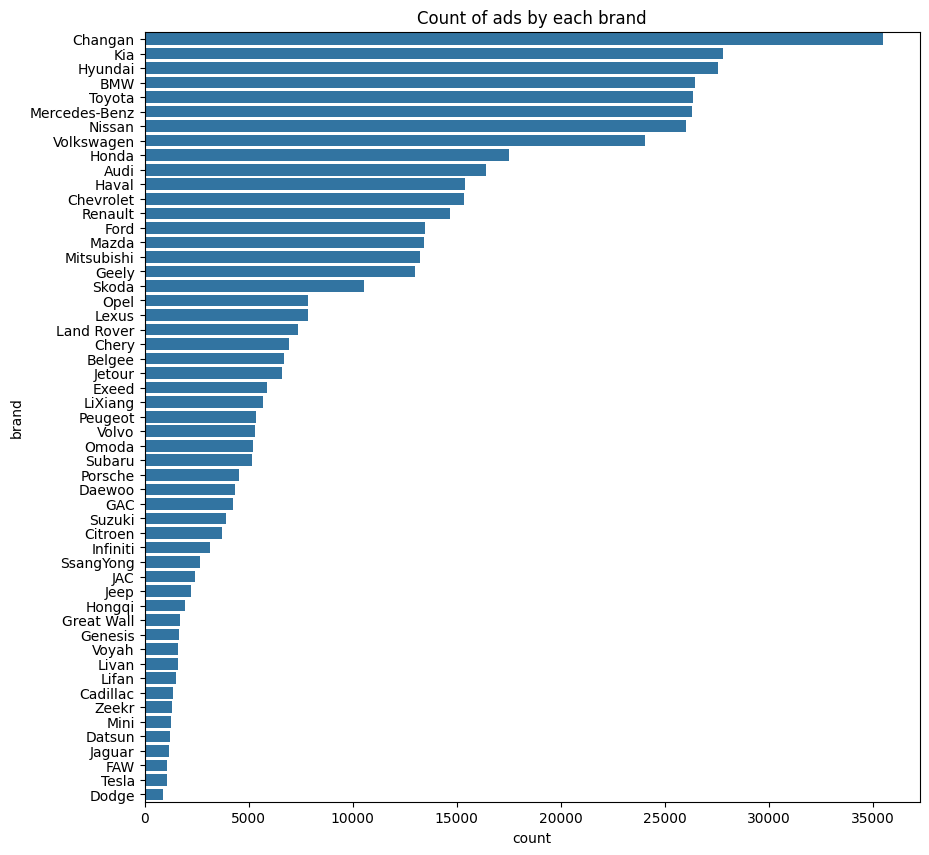

In [44]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df["brand"].value_counts().reset_index(), x="count", y="brand")
plt.title("Count of ads by each brand")

In [45]:
#Count of unique models on each brand
df.groupby(by="brand")["model"].nunique().reset_index().sort_values(by="model", ascending=False)

brand  model
37         Nissan    106
19          Honda     78
13           Ford     77
33          Mazda     75
6       Chevrolet     67
48         Toyota     66
36     Mitsubishi     64
0            Audi     62
4         Changan     47
46         Suzuki     39
34  Mercedes-Benz     39
42        Renault     39
39           Opel     38
50          Volvo     37
40        Peugeot     35
7         Citroen     32
3        Cadillac     30
45         Subaru     29
10          Dodge     27
21        Hyundai     26
49     Volkswagen     24
1             BMW     23
27            Kia     23
18          Haval     22
17     Great Wall     21
23            JAC     21
8          Daewoo     21
29          Lexus     21
22       Infiniti     20
12            FAW     19
43          Skoda     18
41        Porsche     18
44      SsangYong     17
24         Jaguar     17
26         Jetour     14
25           Jeep     12
20         Hongqi     12
31          Lifan     10
28     Land Rover      9
16        Genesis      9
15          Geely      9
11          Exeed      8
35           Mini      7
52          Zeekr      6
14            GAC      6
30        LiXiang      6
47          Tesla      5
5           Chery      5
9          Datsun      4
51          Voyah      4
32          Livan      3
38          Omoda      3
2          Belgee      2

Text(0.5, 1.0, 'Count of unique models by each brand')

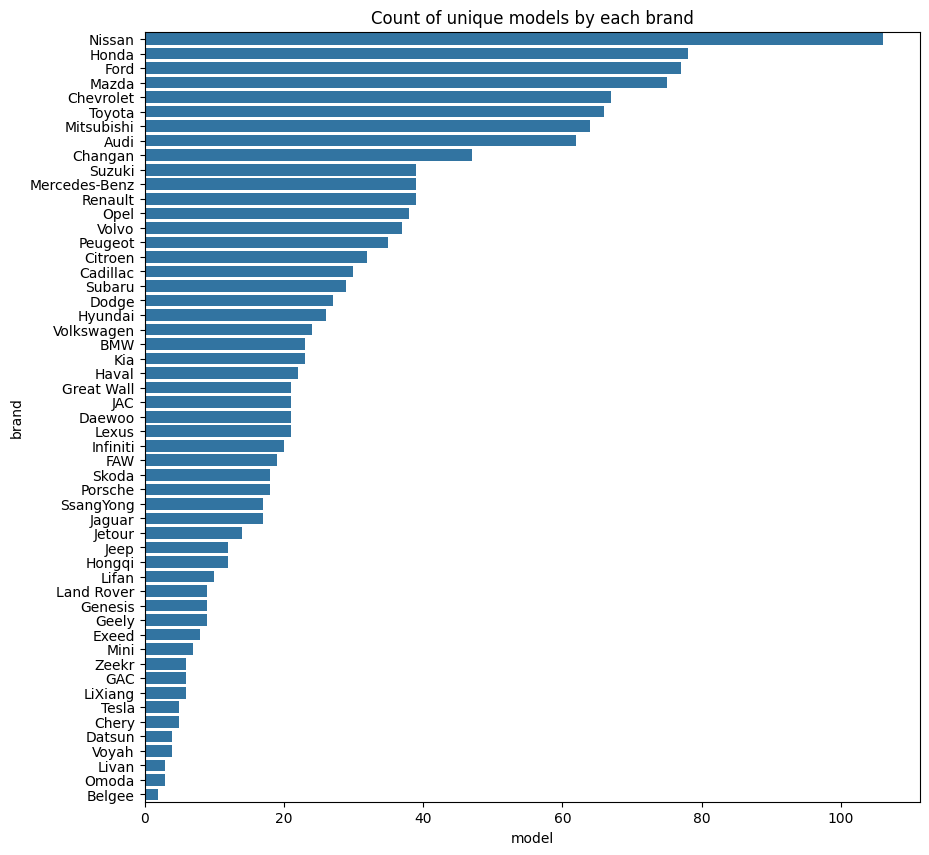

In [46]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df.groupby(by="brand")["model"].nunique().reset_index().sort_values(by="model", ascending=False), x="model", y="brand")
plt.title("Count of unique models by each brand")

In [47]:
#Creating new variable - country associated with brand
car_brands_countries = { "Audi": "Germany", "BMW": "Germany", "Belgee": "Belarus", "Cadillac": "USA", "Changan": "China",
    "Chery": "China", "Chevrolet": "USA", "Citroen": "France", "Daewoo": "South Korea", "Datsun": "Japan", "Dodge": "USA",
    "Exeed": "China", "FAW": "China", "Ford": "USA", "GAC": "China", "Geely": "China", "Genesis": "South Korea", "Great Wall": "China",
    "Haval": "China", "Honda": "Japan", "Hongqi": "China", "Hyundai": "South Korea", "Infiniti": "Japan", "JAC": "China", "Jaguar": "United Kingdom",
    "Jeep": "USA", "Jetour": "China", "Kia": "South Korea", "Land Rover": "United Kingdom",  "Lexus": "Japan", "LiXiang": "China",
    "Lifan": "China", "Livan": "China", "Mazda": "Japan", "Mercedes-Benz": "Germany", "Mini": "United Kingdom", "Mitsubishi": "Japan",
    "Nissan": "Japan", "Omoda": "China", "Opel": "Germany", "Peugeot": "France", "Porsche": "Germany", "Renault": "France",
    "Skoda": "Czech Republic", "SsangYong": "South Korea", "Subaru": "Japan", "Suzuki": "Japan", "Tesla": "USA", "Toyota": "Japan",
    "Volkswagen": "Germany",
}
df['product_country'] = df["brand"].map(car_brands_countries)
df.head()

engine_v  engine_power fuel_type transmission_type         salon_type  \
407360       3.0         340.0    Бензин           автомат  внедорожник 5 дв.   
170739       1.5         177.0    Бензин           автомат  внедорожник 5 дв.   
271407       3.0         333.0    Бензин             робот              седан   
311655       1.5         109.0    Дизель          механика  внедорожник 5 дв.   
290092       1.7          80.0    Бензин          механика  внедорожник 5 дв.   

       wheel_drive   color      km  \
407360      полный  чёрный  230000   
170739    передний  жёлтый  122300   
271407      полный   синий  160500   
311655      полный   серый  188000   
290092      полный   белый  170000   

                                                      url     price  year  \
407360  https://auto.ru/cars/used/sale/land_rover/rang...  339000.0  2014   
170739  https://auto.ru/cars/used/sale/geely/atlas_pro...       NaN  2023   
271407  https://auto.ru/cars/used/sale/audi/a6/1126072...  355000.0  2016   
311655  https://auto.ru/cars/used/sale/renault/duster/...       NaN  2016   
290092  https://auto.ru/cars/used/sale/chevrolet/niva/...   45000.0  2011   

                  region                         name  \
407360            Казань    Land Rover Range Rover IV   
170739          Тимохово              Geely Atlas Pro   
271407            Москва   Audi A6 IV (C7) Рестайлинг   
311655  Набережные Челны  Renault Duster I Рестайлинг   
290092           Туймазы  Chevrolet Niva I Рестайлинг   

                 additional_tags  salon  seller  on order  verified dealler  \
407360  [История авто бесплатно]      0       0         0                 0   
170739  [История авто бесплатно]      0       0         0                 0   
271407  [История авто бесплатно]      0       0         0                 0   
311655  [История авто бесплатно]      0       0         0                 1   
290092  [История авто бесплатно]      0       0         0                 0   

              model       brand  page product_country  
407360  Range Rover  Land Rover    16  United Kingdom  
170739    Atlas Pro  Volkswagen     7         Germany  
271407           A6        Audi    73         Germany  
311655       Duster     Renault    11          France  
290092         Niva   Chevrolet    22             USA

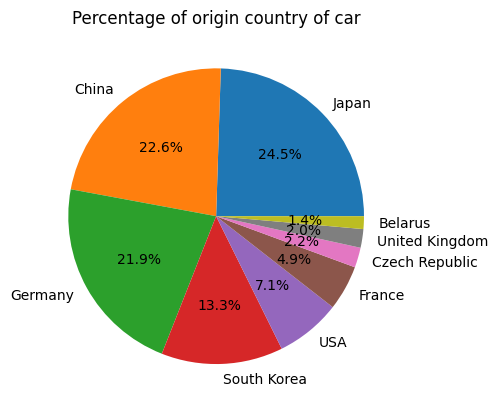

In [48]:
plt.pie(df["product_country"].value_counts(), labels=df["product_country"].value_counts().index, autopct='%1.1f%%')
plt.title("Percentage of origin country of car")
plt.show()

Main importers are(were) Japan, China and Japan

brand, model and product_country are categorical features.

There is no null values, but were acquired some problems during parsing? so some objects were dropped. Product_country is reconstructed from brand.

We'll one-hot encode these features. There are many of model kinds, so we'll clear some meaningless classes

## Fuel_type

In [49]:
df["fuel_type"].unique()

array(['Бензин', 'Дизель', 'Гибрид', 'Электро', 'Газ', None], dtype=object)

In [50]:
df[df["fuel_type"] == "Электро"].head()

engine_v  engine_power fuel_type transmission_type  \
496866  271.92400         272.0   Электро     Заряд на732км   
229470  108.76960         109.0   Электро     Заряд на199км   
497162  788.57960         789.0   Электро     Заряд на675км   
498436  399.72828         400.0   Электро     Заряд на480км   
497566  543.84800         544.0   Электро     Заряд на822км   

               salon_type wheel_drive        color     km  \
496866            лифтбек      задний      голубой   4400   
229470      хэтчбек 5 дв.    передний  серебристый  46000   
497162            лифтбек      полный        серый      1   
498436  внедорожник 5 дв.      полный       чёрный  38000   
497566            минивэн      полный           ME      0   

                                                      url      price  year  \
496866  https://auto.ru/cars/used/sale/zeekr/001/11272...   314002.0  2024   
229470  https://auto.ru/cars/used/sale/nissan/leaf/109...   132813.0  2014   
497162  https://auto.ru/cars/used/sale/zeekr/001/11258...   570018.0  2024   
498436  https://auto.ru/cars/used/sale/jaguar/i_pace/1...   480000.0  2019   
497566  https://auto.ru/cars/new/group/zeekr/009/23411...  1235000.0  2024   

              region                           name  \
496866  Благовещенск            Zeekr 001 100 kWh I   
229470        Гомель       Nissan Leaf I (ZE0/AZE0)   
497162   Владивосток  Zeekr 001 95 kWh I Рестайлинг   
498436   Новосибирск                Jaguar I-Pace I   
497566        Москва            Zeekr 009 140 kWh I   

                                  additional_tags  salon  seller  on order  \
496866                        [Без пробега по РФ]      0       0         1   
229470                            [Отчёт Авто.ру]      0       0         0   
497162                                         []      0       0         1   
498436  [История авто бесплатно, От собственника]      0       0         0   
497566                                         []      1       0         0   

        verified dealler   model   brand  page product_country  
496866                 0     001   Zeekr     6             NaN  
229470                 0    Leaf  Nissan     4           Japan  
497162                 0     001   Zeekr    14             NaN  
498436                 0  I-Pace  Jaguar     1  United Kingdom  
497566                 0     009   Zeekr     1             NaN

In [51]:
df[df["fuel_type"] == "Электро"].shape

(4003, 22)

This class parsed badly and it is relatively small around 4000 of half million objects. So won't be a big problem to drop and will be helpfull for further analysis

In [52]:
#dropping electrocars
df.drop(df[df["fuel_type"] == "Электро"].index, inplace = True)

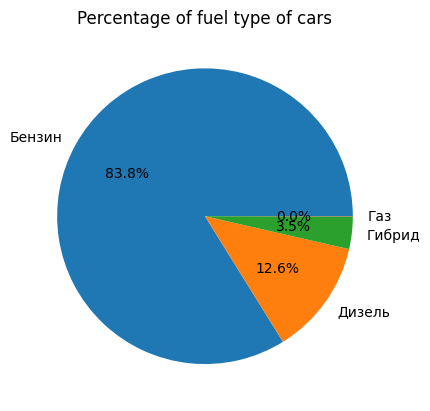

In [53]:
plt.pie(df["fuel_type"].value_counts(), labels=df["fuel_type"].value_counts().index, autopct='%1.1f%%')
plt.title("Percentage of fuel type of cars")
plt.show()

Categorical

This class were 5 values and not objects with null. Electro cars were parsed incorrect and becouse it is small class 4000 ads were dropped.

Around 84% are on petrol, 12% on diesel, 4% are hybrid and very few on gas

## Region

In [54]:
df["region"].isna().sum()

np.int64(0)

In [55]:
df["region"].nunique()

5891

In [56]:
pd.set_option("display.max_rows", None)
df["region"].value_counts().head(25)

region
Москва             99916
Санкт-Петербург    34831
Владивосток        26800
Екатеринбург       13862
Краснодар          13030
Новосибирск         8761
Красноярск          8657
Казань              7593
Воронеж             7549
Ростов-на-Дону      7369
Челябинск           6813
Нижний Новгород     6559
Хабаровск           5978
Тюмень              5552
Уфа                 5348
Химки               4770
Омск                4605
Балашиха            4579
Самара              3821
Минск               3742
Волгоград           3624
Иркутск             3495
Саратов             3242
Пермь               3202
Сочи                3090
Name: count, dtype: int64

In [57]:
df["region"].value_counts().mean(), df["region"].value_counts().std()

(np.float64(82.42318791376677), np.float64(1489.7621334495623))

In [58]:
#Count of regions with only car ad
tmp = df["region"].value_counts().reset_index()
tmp[tmp["count"] == 1].shape

(2300, 2)

In [59]:
#Count of regions with few car ads
tmp[(tmp["count"] >= 2) & (tmp["count"] <= 100)].shape

(3301, 2)

In [60]:
tmp[tmp["count"] >= 50].shape

(489, 2)

In [61]:
#Count of ads from regions with more then 50 ads in it
tmp[tmp["count"] >= 50]["count"].sum()

np.int64(457017)

In [62]:
#Example of regions with 50 ads
tmp[tmp["count"] >= 50].tail()

region  count
484       Тихвин     50
485       Талица     50
486  Североморск     50
487   Костомукша     50
488     Дрожжино     50

Region here is not a really region, but settlement. So We'll replace it with pair of features: region(oblast, republic, etc.) and population of the settlement

### Parsing info about cities

In [63]:
def find_true_region(city_name, regions_dict, population_dict):
    if len(city_name.split()) >= 2:
        city_name = city_name.replace(" ", "_")
    url = "http://ru.wikipedia.org/wiki/" + city_name
    try:
        s = BeautifulSoup(requests.get(url).content, "html.parser")
        region = list(filter(lambda x: True if "Субъект Федерации" in list(map(lambda x1: x1.text, x.find_all("a"))) else False, s.find("table", "infobox").find_all("tr")))[0].find_all("a")[1].text
    except:
        region = regions_dict.get(city_name, None)
    try:
        population_texts = list(filter(lambda x: "Население" in list(map(lambda x1: x1.text, x.find_all("th"))), s.find("table", "infobox").find_all("tr")))[1].find_all("span")

        for span in population_texts:
            if "город:" in span.text:  # Ищем именно блок с "город:"
                population_text = span.text
                break
        else:
            population_text = population_texts[0].text  # Если не нашли "город:", берём первый span

        # Ищем первое число больше 1000
        numbers = re.findall(r"\d{4,}", population_text.replace("\xa0", ""))  # Убираем неразрывные пробелы
        population = int(numbers[0]) if numbers else None
    except:
        population = population_dict.get(city_name, None)
    return (region,  population)

In [64]:
problem_cities_region = {
    "Минск": "Минск", "Симферополь": "Крым", "Севастополь": "Севастополь",
    "Владимир": "Владимирская область", "Курган": "Курганская область",
    "Орёл": "Орловская область", "Берёзовский": "Свердловская область",
    "Зеленоград": "Москва", "Энгельс": "Саратовская облатсь",
    "Донецк": "Донецк", "Армавир": "Краснодарский край",
    "Аксай": "Ростовская область", "Королёв": "Московская область",
    "Домодедово": "Московская область", "Гомель": "Гомель",
    "Артём": "Приморский край", "Евпатория": "Крым", "Брест": "Брест",
    "Ялта": "Крым", "Витебск": "Витебск", "Заречье": "Московская область",
    "Октябрьский": "Московская область", "Чехов": "Московская область",
    "Муринское городское поселение": "Ленинградская область", "Яблоновский": "Республика Адыгея",
    "Жуковка": "Брянская", "Дзержинск": "Нижегородская область", "Феодосия": "Крым",
    "Пригородный": "Московская область", "Гродно": "Гродно", "Железногорск": "Красноярский край",
    "Клин": "Московская область", "Керчь": "Крым", "Новомосковск": "Тульская область",
    "Ереван": "Ереван", "Жуковский": "Московская область", "Могилёв": "Могилёв",
    "Джанкой": "Крым", "Истра": "Московская область", "Солнечный": "Алтайский край",
    "Кропоткин": "Краснодарский край", "Белогорск": "Амурская область",
    "Троицк": "Челябинская область", "Песьянка": "Пермский край",
    "Михайловск": "Ставропольский край", "Москва и Московская область": "Москва",
    "Бахчисарай": "Крым", "Алматы": "Алматы", "Афонино": "Нижегородская область",
    "Александров": "Владимирская область", "Саки": "Крым", "Свободный": "Амурская область",
    "Северо-Западный административный округ": "Москва", "Серов": "Свердловская область",
    "Алушта": "Крым", "Советский": "Ханты-Мансийский автономный округ",
    "Димитровград": "Ульяновская область", "Чайковский": "Приморский край",
    "Московский": "Московская область", "Зеленогорск": "Санкт-Петербург",
    "Озёрск": "Челябинская область", "Михайловка": "Вологодская область",
    "Тимохово": "Московская область", "Заречный": "Свердловская область",
    "Бор": "Нижегородская область",
}

problem_cities_population = {
    "Минск": 2009786, "Симферополь": 341746, "Севастополь": 447619, "Владимир": 349961,
    "Курган": 311729, "Орёл": 308838, "Берёзовский": 55154, "Зеленоград": 241600,
    "Энгельс": 226832, "Донецк": 905364, "Армавир": 188832, "Аксай": 50310,
    "Королёв": 225898, "Домодедово": 118559, "Гомель": 526872, "Артём": 106696,
    "Евпатория": 105719, "Брест": 350616, "Ялта": 76000, "Витебск": 364800,
    "Заречье": 20000, "Октябрьский": 119948, "Чехов": 72600,
    "Муринское городское поселение": 100000, "Яблоновский": 30000, "Жуковка": 16000,
    "Дзержинск": 230747, "Феодосия": 69000, "Пригородный": 15000, "Гродно": 373547,
    "Железногорск": 94000, "Клин": 80000, "Керчь": 147033, "Новомосковск": 124012,
    "Ереван": 1075800, "Жуковский": 104736, "Могилёв": 357100, "Джанкой": 37800,
    "Истра": 35000, "Солнечный": 5000, "Кропоткин": 80500, "Белогорск": 67600,
    "Троицк": 60000, "Песьянка": 2000, "Михайловск": 104000,
    "Москва и Московская область": 12615279, "Бахчисарай": 27000, "Алматы": 2000000,
    "Афонино": 5000, "Александров": 61551, "Саки": 25000, "Свободный": 58000,
    "Северо-Западный административный округ": 942223, "Серов": 95000, "Алушта": 30000,
    "Советский": 10000, "Димитровград": 117900, "Чайковский": 82000, "Московский": 20000,
    "Зеленогорск": 15000, "Озёрск": 82000, "Михайловка": 59000, "Тимохово": 5000,
    "Заречный": 27000, "Бор": 78100,
}

In [65]:
city_list = df["region"].value_counts().sort_values(ascending=False).index

In [66]:
len_city_list = len(city_list)
len_city_list

5891

In [67]:
cities_info = []
# for i, city in enumerate(city_list[:750]):
#     reg = find_true_region(city, problem_cities_region, problem_cities_population)
#     print(i, city, reg)
#     cities_info.append({"name": city, "region": reg[0], "population": reg[1]})
#     print(len(cities_info))

### Getting information about settlements

In [68]:
#df_cities = pd.DataFrame(data=cities_info)
df_cities = pd.read_csv(os.path.join(DATA_PATH, "cities_region.csv"), index_col="Unnamed: 0")

In [69]:
df_cities.head()

name                region  population
0           Москва                Москва  13149803.0
1  Санкт-Петербург       Санкт-Петербург   5597763.0
2      Владивосток       Приморский край    591628.0
3     Екатеринбург  Свердловская область   1536183.0
4        Краснодар    Краснодарский край   1138654.0

In [70]:
df_cities = df_cities.dropna()

In [71]:
#Dropping settlements from territories with unrecognizable status
df_cities = df_cities[(df_cities["region"] != "Севастополь") & (df_cities["region"] != "Крым") & (df_cities["region"] != "Донецк")]

In [72]:
#Chrcking if year of survey about population considered as popoulation as well
df_cities[df_cities["population"] <= 2030]

name                    region  population
164      Ереван                    Ереван      2023.0
170     Могилёв                   Могилёв      2024.0
188    Песьянка             Пермский край      2000.0
207      Алматы                    Алматы      2023.0
301      Моздок  Северная Осетия — Алания      1175.0
302    Коляново        Ивановская область      1175.0
329     Арамиль      Свердловская область      1175.0
362     Дюртюли   Республика Башкортостан      2024.0
544  Оленегорск        Мурманская область      2025.0

In [73]:
#Correcting information about population
df_cities.loc[40, "population"] = 420000
df_cities.loc[87, "population"] = 329200
df_cities.loc[175, "population"] = 1098900
df_cities.loc[179, "population"] = 353110
df_cities.loc[206, "population"] = 2516
df_cities.loc[221, "population"] = 2195000
df_cities.loc[329, "population"] = 1175
df_cities.loc[416, "population"] = 31067
df_cities.loc[674, "population"] = 20364

In [74]:
#rename region to town
df = df.rename(columns={"region": "town"})
df.head()

engine_v  engine_power fuel_type transmission_type         salon_type  \
407360       3.0         340.0    Бензин           автомат  внедорожник 5 дв.   
170739       1.5         177.0    Бензин           автомат  внедорожник 5 дв.   
271407       3.0         333.0    Бензин             робот              седан   
311655       1.5         109.0    Дизель          механика  внедорожник 5 дв.   
290092       1.7          80.0    Бензин          механика  внедорожник 5 дв.   

       wheel_drive   color      km  \
407360      полный  чёрный  230000   
170739    передний  жёлтый  122300   
271407      полный   синий  160500   
311655      полный   серый  188000   
290092      полный   белый  170000   

                                                      url     price  year  \
407360  https://auto.ru/cars/used/sale/land_rover/rang...  339000.0  2014   
170739  https://auto.ru/cars/used/sale/geely/atlas_pro...       NaN  2023   
271407  https://auto.ru/cars/used/sale/audi/a6/1126072...  355000.0  2016   
311655  https://auto.ru/cars/used/sale/renault/duster/...       NaN  2016   
290092  https://auto.ru/cars/used/sale/chevrolet/niva/...   45000.0  2011   

                    town                         name  \
407360            Казань    Land Rover Range Rover IV   
170739          Тимохово              Geely Atlas Pro   
271407            Москва   Audi A6 IV (C7) Рестайлинг   
311655  Набережные Челны  Renault Duster I Рестайлинг   
290092           Туймазы  Chevrolet Niva I Рестайлинг   

                 additional_tags  salon  seller  on order  verified dealler  \
407360  [История авто бесплатно]      0       0         0                 0   
170739  [История авто бесплатно]      0       0         0                 0   
271407  [История авто бесплатно]      0       0         0                 0   
311655  [История авто бесплатно]      0       0         0                 1   
290092  [История авто бесплатно]      0       0         0                 0   

              model       brand  page product_country  
407360  Range Rover  Land Rover    16  United Kingdom  
170739    Atlas Pro  Volkswagen     7         Germany  
271407           A6        Audi    73         Germany  
311655       Duster     Renault    11          France  
290092         Niva   Chevrolet    22             USA

In [75]:
#Couple of regions has different forms of names. So lets standardize it
df_cities["region"] = df_cities["region"].replace({
    "Татарстан": "Республика Татарстан",
    "Башкортостан": "Республика Башкортостан",
    "Кемеровская область — Кузбасс": "Кемеровская область",
    "Саратовская облатсь": "Саратовская область",
    "Северная Осетия": "Северная Осетия — Алания",
    "Чечня": "Чеченская Республика",
    "Ханты-Мансийский автономный округ": "Ханты-Мансийский автономный округ — Югра",
    "Ханты-Мансийский автономный округ\xa0— Югра": "Ханты-Мансийский автономный округ — Югра",
    "Якутия": "Республика Саха (Якутия)",
    "Удмуртия": "Удмуртская Республика",
    "Адыгея": "Республика Адыгея",
    "Чувашия": "Чувашская Республика",
    "Марий Эл": "Республика Марий Эл"
})


In [76]:
#saving information about cities
#df_cities.to_csv(os.peth.join(DATA_PATH, "cities_region.csv"))

### Further analysis

In [77]:
pd.set_option("display.max_rows", 20)

In [78]:
#Getting imformation about cities
df_cities = pd.read_csv(os.path.join(DATA_PATH, "cities_region.csv"), index_col="Unnamed: 0")

In [79]:
#Adding information about settlements to main dataset
df = df.merge(df_cities, left_on="town", right_on="name", how="left")
df = df.drop(columns=["name_y"])
df = df.rename(columns={"name_x": "name"})
#standardizing names of regions
df["region"] = df["region"].replace({
    "Татарстан": "Республика Татарстан",
    "Башкортостан": "Республика Башкортостан",
    "Кемеровская область — Кузбасс": "Кемеровская область",
    "Саратовская облатсь": "Саратовская область",
    "Северная Осетия": "Северная Осетия — Алания",
    "Чечня": "Чеченская Республика",
    "Ханты-Мансийский автономный округ": "Ханты-Мансийский автономный округ — Югра",
    "Ханты-Мансийский автономный округ\xa0— Югра": "Ханты-Мансийский автономный округ — Югра",
    "Якутия": "Республика Саха (Якутия)",
    "Удмуртия": "Удмуртская Республика",
    "Адыгея": "Республика Адыгея",
    "Чувашия": "Чувашская Республика",
    "Марий Эл": "Республика Марий Эл"
})

In [80]:
df.head()

engine_v  engine_power fuel_type transmission_type         salon_type  \
0       3.0         340.0    Бензин           автомат  внедорожник 5 дв.   
1       1.5         177.0    Бензин           автомат  внедорожник 5 дв.   
2       3.0         333.0    Бензин             робот              седан   
3       1.5         109.0    Дизель          механика  внедорожник 5 дв.   
4       1.7          80.0    Бензин          механика  внедорожник 5 дв.   

  wheel_drive   color      km  \
0      полный  чёрный  230000   
1    передний  жёлтый  122300   
2      полный   синий  160500   
3      полный   серый  188000   
4      полный   белый  170000   

                                                 url     price  year  \
0  https://auto.ru/cars/used/sale/land_rover/rang...  339000.0  2014   
1  https://auto.ru/cars/used/sale/geely/atlas_pro...       NaN  2023   
2  https://auto.ru/cars/used/sale/audi/a6/1126072...  355000.0  2016   
3  https://auto.ru/cars/used/sale/renault/duster/...       NaN  2016   
4  https://auto.ru/cars/used/sale/chevrolet/niva/...   45000.0  2011   

               town                         name           additional_tags  \
0            Казань    Land Rover Range Rover IV  [История авто бесплатно]   
1          Тимохово              Geely Atlas Pro  [История авто бесплатно]   
2            Москва   Audi A6 IV (C7) Рестайлинг  [История авто бесплатно]   
3  Набережные Челны  Renault Duster I Рестайлинг  [История авто бесплатно]   
4           Туймазы  Chevrolet Niva I Рестайлинг  [История авто бесплатно]   

   salon  seller  on order  verified dealler        model       brand  page  \
0      0       0         0                 0  Range Rover  Land Rover    16   
1      0       0         0                 0    Atlas Pro  Volkswagen     7   
2      0       0         0                 0           A6        Audi    73   
3      0       0         0                 1       Duster     Renault    11   
4      0       0         0                 0         Niva   Chevrolet    22   

  product_country                   region  population  
0  United Kingdom     Республика Татарстан   1318604.0  
1         Germany       Московская область      5000.0  
2         Germany                   Москва  13149803.0  
3          France     Республика Татарстан    544383.0  
4             USA  Республика Башкортостан     68349.0

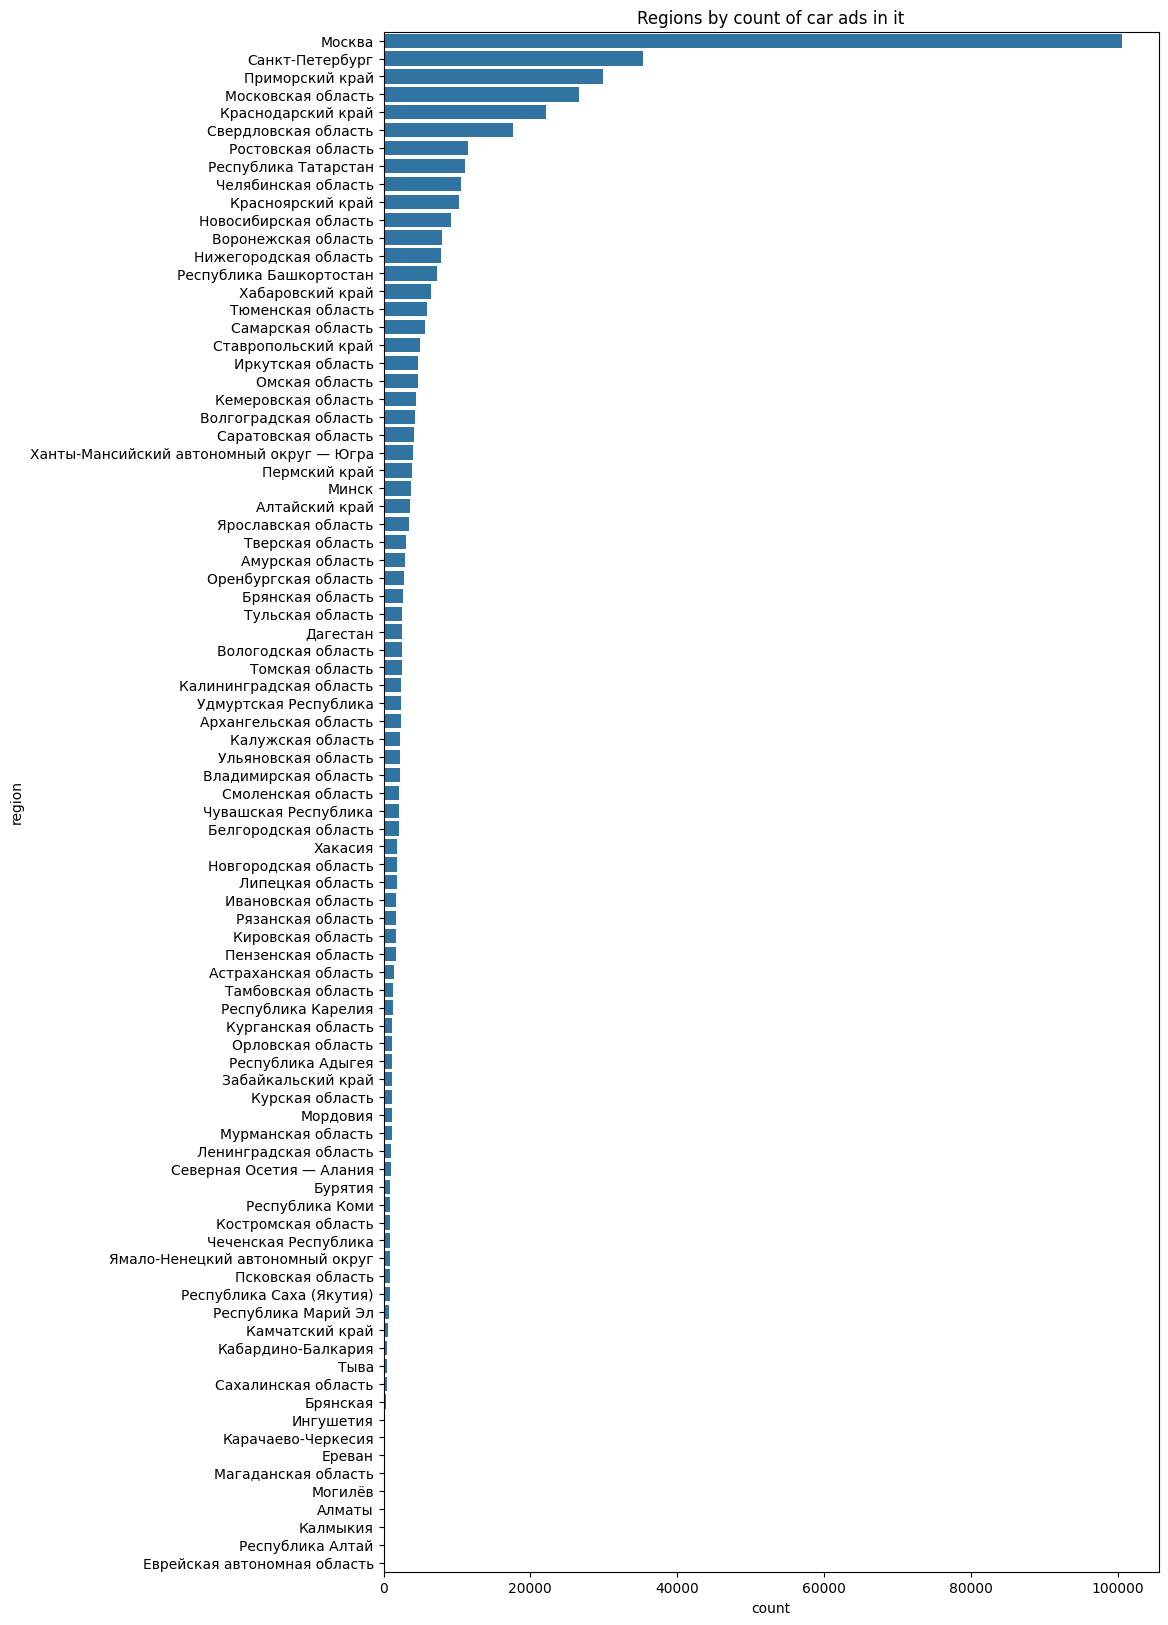

In [81]:
plt.figure(figsize=(10, 20))
sns.barplot(data=df["region"].value_counts().reset_index(), x="count", y="region")
plt.title("Regions by count of car ads in it")
plt.show()

Regions with most count of ads are Moscow and near region, St.-Petersburg - 2 main aglomarations of the country, Primorsky kraj(Vladivostok) - close to Japan and, South Korea and China so always has been as gate of importing autos. Than Krasnodarsky kraj and Sverdlov oblast - centers of their macroregions - South and Ural

In [82]:
#Count of ads where settlement has not parsed well. All main towns were parsed, so we can drop them
df[df["region"].isna()].shape

(35193, 24)

In [83]:
df = df[df["region"].notna()]

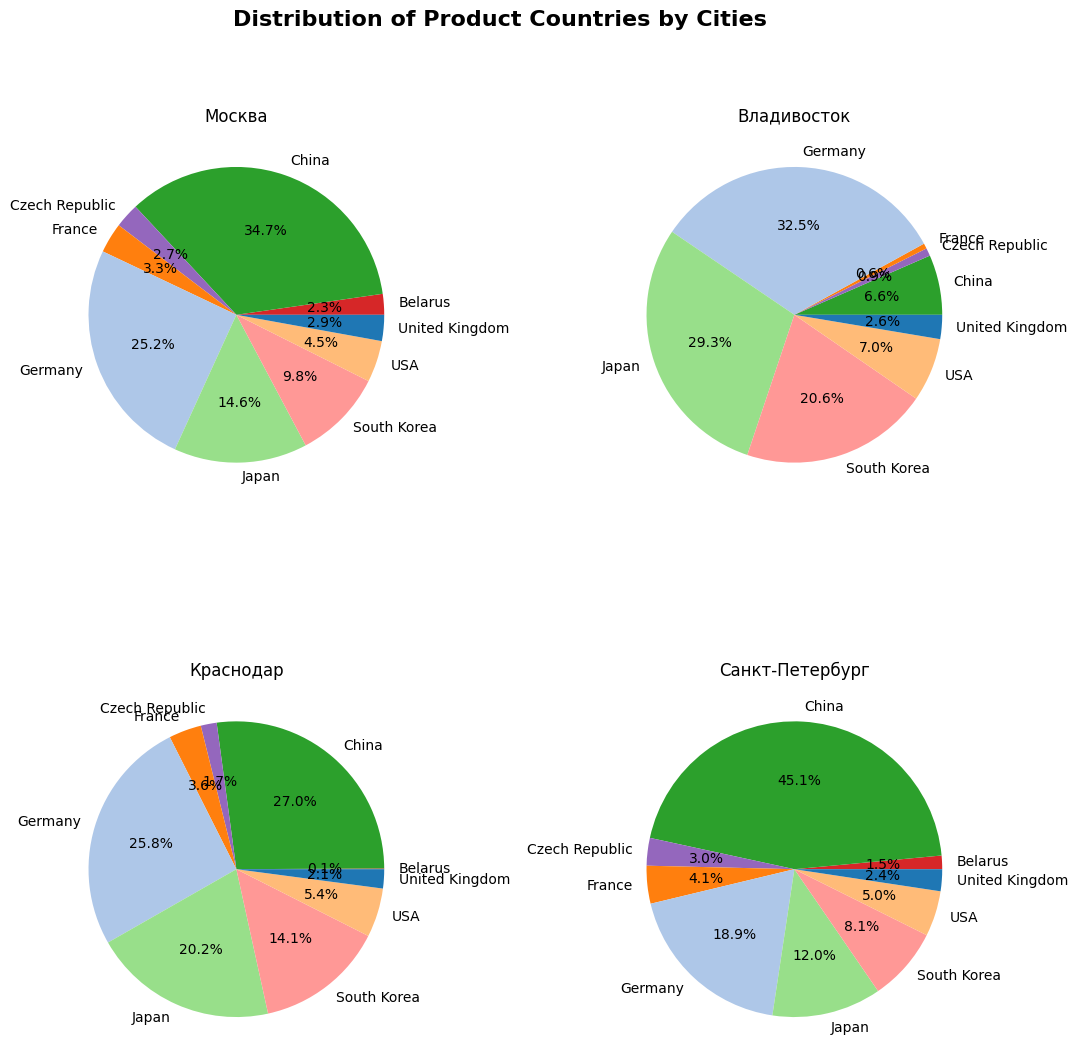

In [84]:
towns = ["Москва", "Владивосток", "Краснодар", "Санкт-Петербург"]

# Создаем словарь цветов для стран-производителей
unique_countries = df["product_country"].unique()
colors_dict = {country: color for country, color in zip(unique_countries, plt.cm.tab20.colors)}

# Создаем фигуру с 2 строками и 2 столбцами
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Проходимся по городам и строим диаграммы
for i, town in enumerate(towns):
    tmp = df[df["town"] == town]
    counts = tmp["product_country"].value_counts().sort_index()

    # Назначаем цвета по заранее созданному словарю
    colors = [colors_dict[country] for country in counts.index]

    ax = axs[i // 2, i % 2]  # Определяем положение в сетке
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    ax.set_title(town)

fig.suptitle("Distribution of Product Countries by Cities", fontsize=16, fontweight="bold")
plt.show()

Main importers are traditionally Germany and Japan. South Korea better represented in Vladivostok, mainly becose of geographical position, and in Krasnodar, maybe becose mean income there is lesser.

Huge part of market is chinese after war and sanstions began in 2022(This will be explored in year section). Interesting, that in Vladivostok despite it is close to China rate is the lowest. Maybe becouse chinese manufacturers replace EU manufactures on the fabrics that are located in european part of Russia?

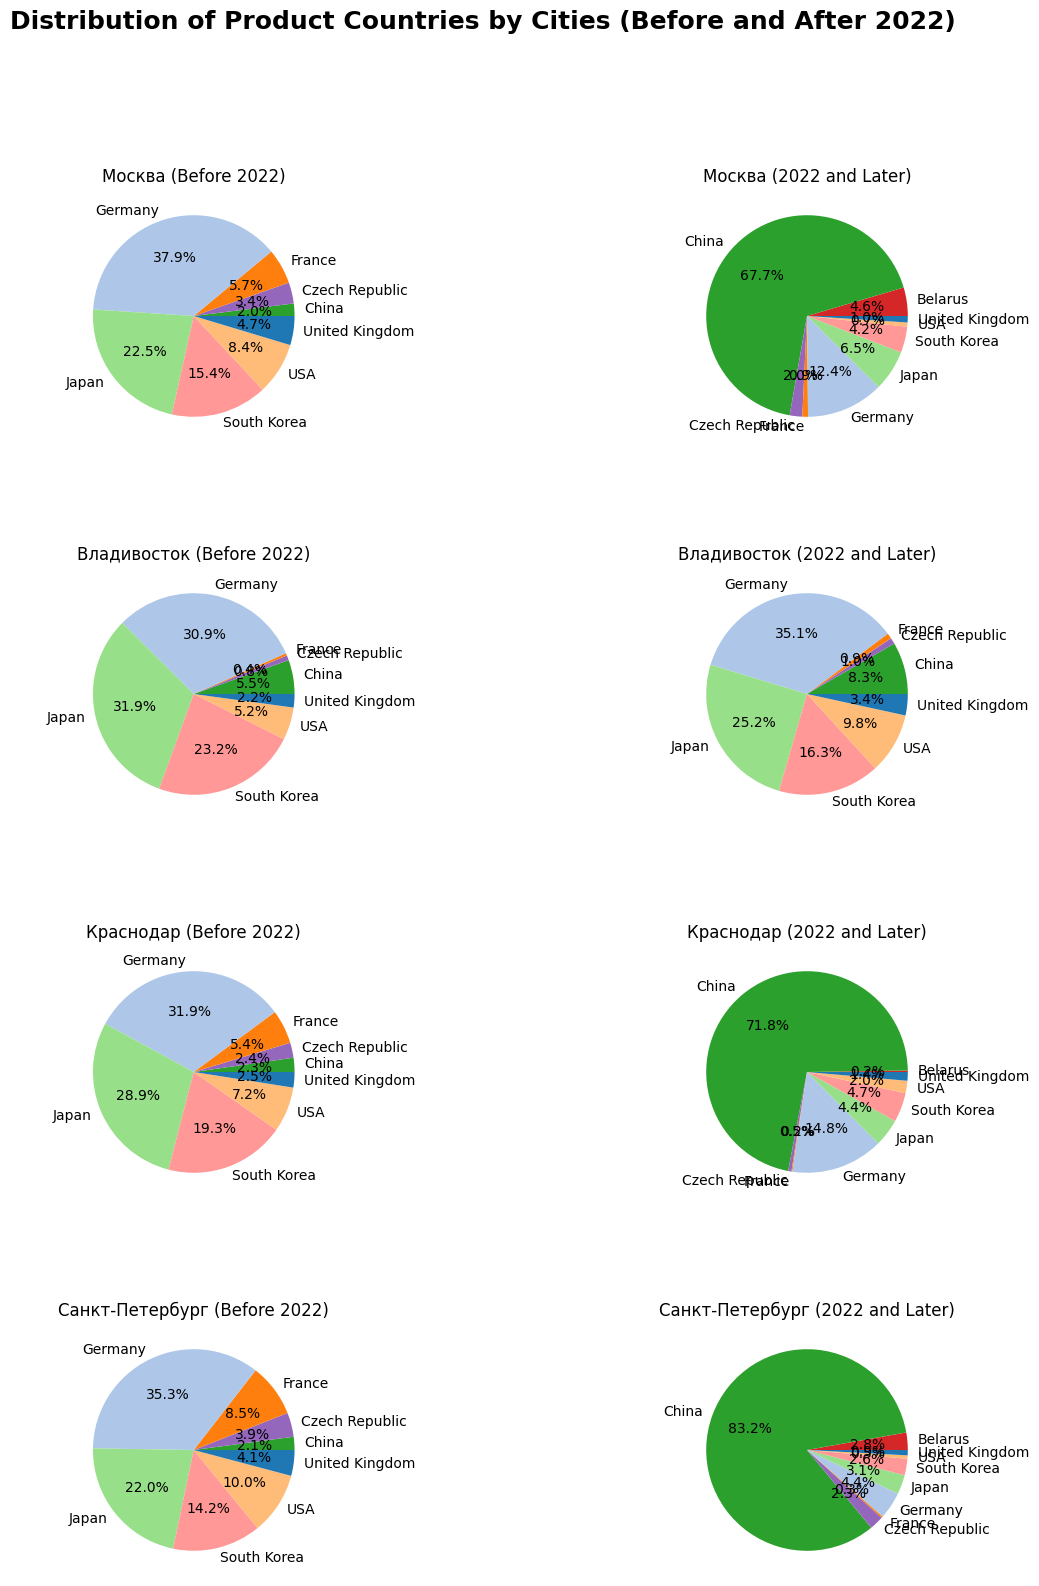

In [85]:
import matplotlib.pyplot as plt

towns = ["Москва", "Владивосток", "Краснодар", "Санкт-Петербург"]
df_before = df[df["year"] < 2022]
df_after = df[df["year"] >= 2022]

# Создаем словарь цветов для стран-производителей
unique_countries = df["product_country"].unique()
colors_dict = {country: color for country, color in zip(unique_countries, plt.cm.tab20.colors)}

# Создаем фигуру с 4 строками и 2 столбцами (по 2 диаграммы на город)
fig, axs = plt.subplots(4, 2, figsize=(14, 18))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Проходимся по городам и строим диаграммы
for i, town in enumerate(towns):
    for j, (df_filtered, label) in enumerate([(df_before, "Before 2022"), (df_after, "2022 and Later")]):
        tmp = df_filtered[df_filtered["town"] == town]
        counts = tmp["product_country"].value_counts().sort_index()

        # Назначаем цвета по заранее созданному словарю
        colors = [colors_dict[country] for country in counts.index]

        ax = axs[i, j]  # Определяем положение в сетке
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
        ax.set_title(f"{town} ({label})")

fig.suptitle("Distribution of Product Countries by Cities (Before and After 2022)", fontsize=18, fontweight="bold")
plt.show()


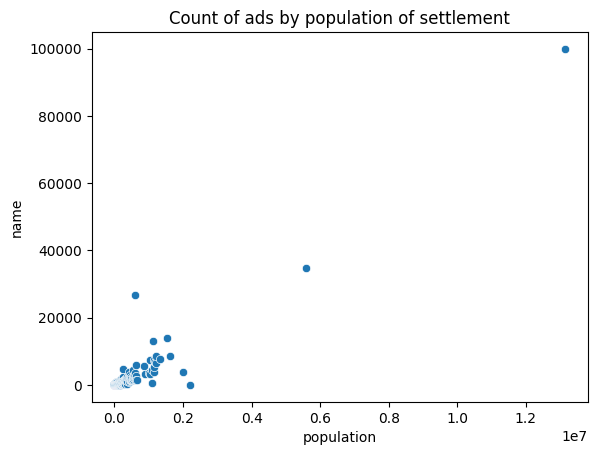

In [86]:
sns.scatterplot(data=df.groupby(by="population")["name"].count().reset_index(), x="population", y="name")
plt.title("Count of ads by population of settlement")
plt.show()

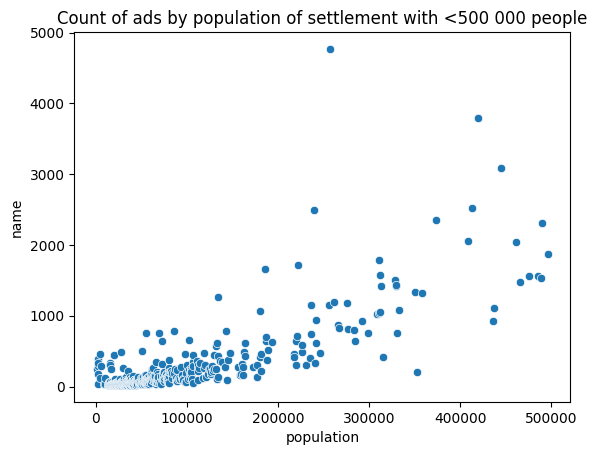

In [87]:
sns.scatterplot(data=df[df["population"]<=500_000].groupby(by="population")["name"].count().reset_index(), x="population", y="name")
plt.title("Count of ads by population of settlement with <500 000 people")
plt.show()

In [88]:
(df.groupby(by="population")["name"].count().reset_index()).corr().iloc[0, 1]

np.float64(0.9510428122837015)

Obviously, more population more count of ads

Originaly there wasn't any null values in region feature. We renamed this feature to town and added new features region and population of settlement. 35000 objects were parsed incorrect so they were dropped.

## Engine Volume

In [89]:
df["engine_v"].isna().sum()

np.int64(6)

In [90]:
df[df["engine_v"].isna()]

engine_v  engine_power fuel_type transmission_type salon_type  \
44601        NaN           NaN      None              None       None   
75227        NaN           NaN      None              None       None   
218842       NaN           NaN      None              None       None   
269418       NaN           NaN      None              None       None   
295135       NaN           NaN      None              None       None   
452396       NaN           NaN      None              None       None   

       wheel_drive color      km  \
44601         None  None   53000   
75227         None  None  237000   
218842        None  None  576099   
269418        None  None   29500   
295135        None  None  105000   
452396        None  None  106000   

                                                      url     price  year  \
44601   https://auto.ru/cars/used/sale/tesla/model_3/1...  319000.0  2022   
75227   https://auto.ru/cars/used/sale/audi/a4/1121536...   99000.0  2008   
218842  https://auto.ru/cars/used/sale/peugeot/207/112...   50000.0  2008   
269418  https://auto.ru/cars/used/sale/kia/sorento/112...  470000.0  2021   
295135  https://auto.ru/cars/used/sale/hyundai/santa_f...  185000.0  2012   
452396  https://auto.ru/cars/used/sale/chevrolet/equin...  195000.0  2017   

               town                            name  \
44601         Минск   Tesla Model 3 Standart Plus I   
75227        Туапсе                 Audi A4 IV (B8)   
218842    Волгоград                   Peugeot 207 I   
269418        Пенза                  Kia Sorento IV   
295135  Новосибирск  Hyundai Santa Fe II Рестайлинг   
452396        Минск           Chevrolet Equinox III   

                                          additional_tags  salon  seller  \
44601   [Растаможен, нет ПТС, Без пробега по РФ, Отчёт...      0       0   
75227                            [История авто бесплатно]      0       0   
218842                                                 []      0       0   
269418                                    [Отчёт Авто.ру]      0       0   
295135                           [История авто бесплатно]      0       0   
452396                                    [Отчёт Авто.ру]      0       0   

        on order  verified dealler     model      brand  page product_country  \
44601          0                 0   Model 3      Tesla     2             USA   
75227          0                 0        A4       Audi    22         Germany   
218842         0                 0       207    Peugeot     1          France   
269418         0                 0   Sorento        Kia    90     South Korea   
295135         0                 0  Santa Fe    Hyundai    60     South Korea   
452396         0                 0   Equinox  Chevrolet     4             USA   

                       region  population  
44601                   Минск   1992862.0  
75227      Краснодарский край     60707.0  
218842  Волгоградская область   1018898.0  
269418     Пензенская область    488299.0  
295135  Новосибирская область   1633851.0  
452396                  Минск   1992862.0

In [91]:
df = df.dropna(subset=["engine_v"])
df["engine_v"].isna().sum()

np.int64(0)

In [92]:
df["engine_v"].describe()

count    450356.000000
mean          2.015509
std           0.739553
min           0.700000
25%           1.500000
50%           2.000000
75%           2.000000
max           8.300000
Name: engine_v, dtype: float64

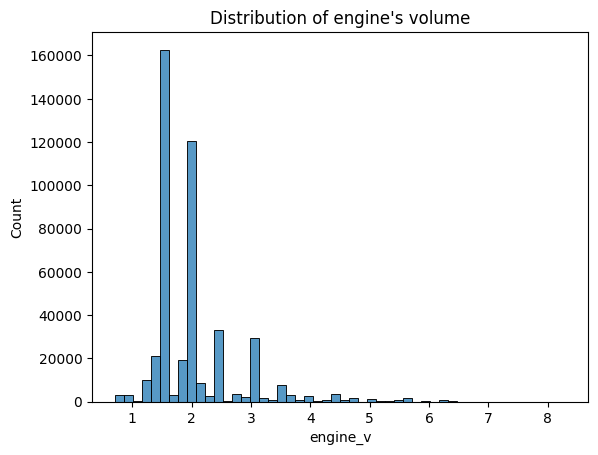

In [93]:
sns.histplot(df["engine_v"], bins=50)
plt.title("Distribution of engine's volume")
plt.show()

There are 4 peaks with most common variation of engine's volume, and many specific variations, that are not popular. It is difficult to determine the type of distribution. The distribution has a long tail to the right.

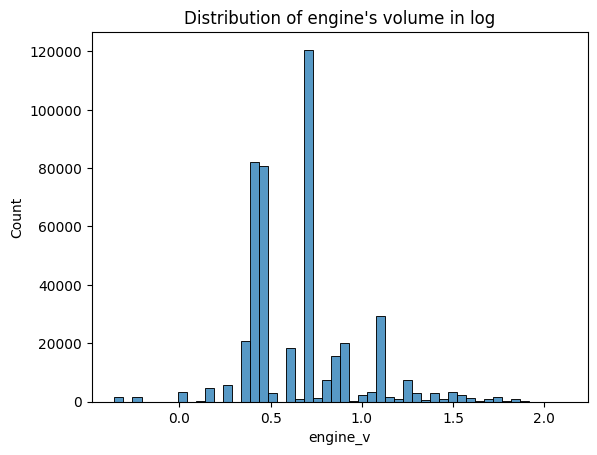

In [94]:
sns.histplot(df["engine_v"].apply(np.log), bins=50)
plt.title("Distribution of engine's volume in log")
plt.show()

By logariphm distribution become more standardized

In [95]:
#Most common engine's volume
df["engine_v"].value_counts().head(10)

engine_v
2.0    120587
1.5     82140
1.6     80560
3.0     29432
1.4     20866
2.5     19999
1.8     18319
2.4     12870
2.2      7486
3.5      7470
Name: count, dtype: int64

Engine volume is numeric feature.

6 null values were dropped

There are few values that are more common, so we could binarize this feature around these values.

There are outliers. Logariphm could help, but range is small and it could be meaningless.

## Engine power

In [96]:
df["engine_power"].isna().sum()

np.int64(0)

In [97]:
df["engine_power"].describe()

count    450356.000000
mean        181.364054
std          88.405125
min          20.000000
25%         123.000000
50%         150.000000
75%         210.000000
max         900.000000
Name: engine_power, dtype: float64

<Axes: xlabel='engine_power', ylabel='Count'>

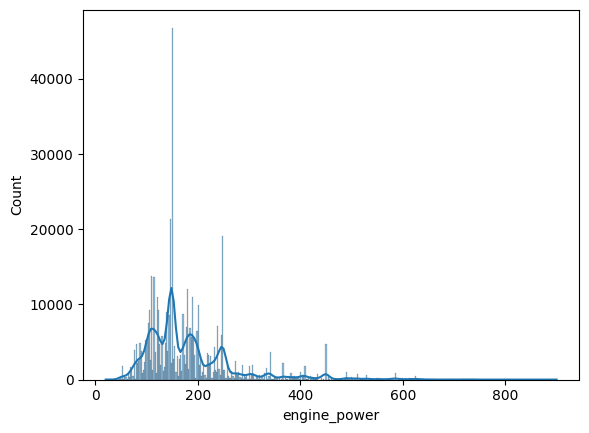

In [98]:
sns.histplot(df["engine_power"], kde=True)

In [99]:
df.sort_values(by="engine_power", ascending=False).head()

engine_v  engine_power fuel_type transmission_type         salon_type  \
184087       3.8         900.0    Бензин             робот               купе   
3302         3.8         900.0    Бензин             робот               купе   
109273       6.3         900.0    Бензин           автомат  внедорожник 5 дв.   
238071       4.0         843.0    Гибрид             робот            лифтбек   
429767       4.0         843.0    Гибрид             робот            лифтбек   

       wheel_drive                color    km  \
184087      полный  Brabus 900 Rocket R     0   
3302        полный  Brabus 900 Rocket R     0   
109273      полный               чёрный    50   
238071      полный               чёрный  3900   
429767      полный                белый    20   

                                                      url      price  year  \
184087  https://auto.ru/cars/new/group/porsche/911/240...  8900000.0  2023   
3302    https://auto.ru/cars/new/group/porsche/911/240...  9900000.0  2023   
109273  https://auto.ru/cars/used/sale/mercedes/g_klas...  7682750.0  2024   
238071  https://auto.ru/cars/used/sale/mercedes/amg_gt...  1942100.0  2025   
429767  https://auto.ru/cars/used/sale/mercedes/amg_gt...  2064500.0  2025   

               town                                               name  \
184087  Новосибирск         Porsche 911 Brabus 900 Rocket R VIII (992)   
3302         Москва         Porsche 911 Brabus 900 Rocket R VIII (992)   
109273  Владивосток     Mercedes-Benz G-Класс AMG Brabus 900 II (W463)   
238071    Краснодар  Mercedes-Benz AMG GT 63 S E Performance I Рест...   
429767  Владивосток  Mercedes-Benz AMG GT 63 S E Performance I Рест...   

       additional_tags  salon  seller  on order  verified dealler  \
184087              []      1       0         0                 0   
3302                []      1       0         0                 0   
109273              []      0       0         1                 0   
238071              []      0       0         1                 0   
429767              []      0       0         1                 0   

              model          brand  page product_country  \
184087          911        Porsche     4         Germany   
3302            911        Porsche     4         Germany   
109273  G-Класс AMG  Mercedes-Benz    20         Germany   
238071       AMG GT  Mercedes-Benz     6         Germany   
429767       AMG GT  Mercedes-Benz     2         Germany   

                       region  population  
184087  Новосибирская область   1633851.0  
3302                   Москва  13149803.0  
109273        Приморский край    591628.0  
238071     Краснодарский край   1138654.0  
429767        Приморский край    591628.0

In [100]:
pd.set_option("display.max_rows", None)
df.groupby(by="brand")["engine_power"].mean().reset_index().sort_values(by="engine_power", ascending=False)

brand  engine_power
50          Voyah    479.511460
30        LiXiang    437.136331
41        Porsche    377.447794
3        Cadillac    338.515246
22       Infiniti    298.273228
28     Land Rover    283.972050
10          Dodge    281.216809
16        Genesis    277.562149
34  Mercedes-Benz    269.743555
1             BMW    267.665952
29          Lexus    258.246521
24         Jaguar    254.636109
25           Jeep    250.617063
0            Audi    228.805115
20         Hongqi    224.683168
49          Volvo    210.873844
5           Chery    206.541091
11          Exeed    203.535357
14            GAC    198.440962
26         Jetour    197.113132
35           Mini    175.432269
4         Changan    175.058411
12            FAW    174.148000
18          Haval    172.749901
45         Subaru    170.168120
15          Geely    162.852308
13           Ford    162.283946
2          Belgee    158.249327
44      SsangYong    155.682030
23            JAC    155.609167
27            Kia    154.760242
48     Volkswagen    151.604999
33          Mazda    149.050289
47         Toyota    146.274810
21        Hyundai    145.271202
37         Nissan    144.360796
36     Mitsubishi    143.751360
19          Honda    143.648097
38          Omoda    140.850339
39           Opel    134.875148
43          Skoda    131.622524
17     Great Wall    131.472168
6       Chevrolet    127.162015
7         Citroen    127.130526
32          Livan    126.876238
40        Peugeot    117.794389
31          Lifan    112.852472
46         Suzuki    110.516828
42        Renault    106.929360
9          Datsun     87.964513
8          Daewoo     76.407716

Engine_power is numeric feature.

There are no nulls.

Maybe would be better to limit or standardize.

## Transmission type

In [101]:
df["transmission_type"].isna().sum()

np.int64(0)

In [102]:
df["transmission_type"].nunique()

4

In [103]:
df["transmission_type"].unique()

array(['автомат', 'робот', 'механика', 'вариатор'], dtype=object)

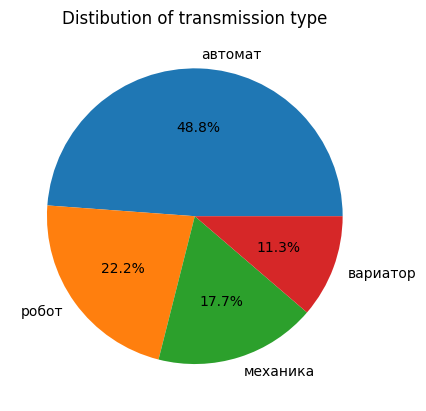

In [104]:
plt.pie(x=df["transmission_type"].value_counts(), labels=df["transmission_type"].value_counts().index, autopct='%1.1f%%')
plt.title("Distibution of transmission type")
plt.show()

Nominal feature with 4 unique values.

There are not null values Almost half of cars has automatic. Than automated manual/mechanical transmission(22,2%), manual(17,6%) and continuously variable transmission(11,3%)

## Salon type

In [105]:
df["salon_type"].isna().sum()

np.int64(0)

In [106]:
df["salon_type"].nunique()

27

In [107]:
df["salon_type"].unique()

array(['внедорожник 5 дв.', 'седан', 'купе', 'хэтчбек 5 дв.', 'минивэн',
       'лифтбек', 'универсал 5 дв.', 'внедорожник 3 дв.', 'кабриолет',
       'микровэн', 'пикап двойная кабина', 'компактвэн', 'хэтчбек 3 дв.',
       'фургон', 'купе-хардтоп', 'родстер', 'тарга', 'фастбек',
       'внедорожник открытый', 'седан-хардтоп', 'универсал',
       'пикап полуторная кабина', 'пикап одинарная кабина', 'седан 2 дв.',
       'универсал 3 дв.', 'хэтчбек 4 дв.', 'лимузин'], dtype=object)

<Axes: xlabel='count', ylabel='salon_type'>

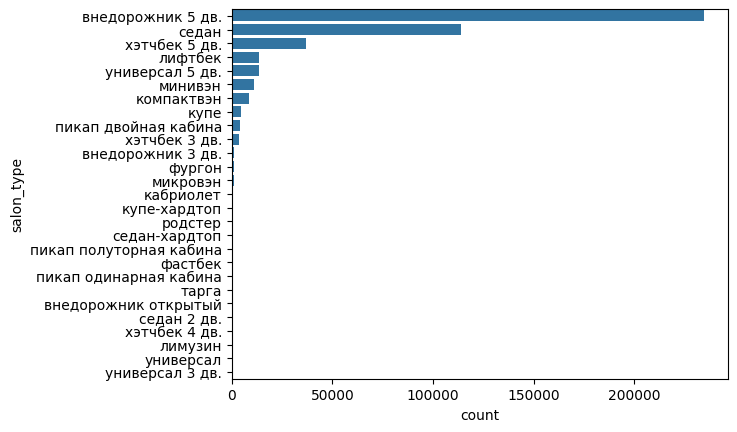

In [108]:
sns.countplot(data=df, y="salon_type", order=df["salon_type"].value_counts().index)

In [109]:
df["salon_type"].value_counts().sort_values(ascending=False)

salon_type
внедорожник 5 дв.          234577
седан                      113779
хэтчбек 5 дв.               36851
лифтбек                     13791
универсал 5 дв.             13571
минивэн                     11327
компактвэн                   8511
купе                         4456
пикап двойная кабина         4091
хэтчбек 3 дв.                3450
внедорожник 3 дв.            1349
фургон                       1259
микровэн                     1148
кабриолет                     808
купе-хардтоп                  588
родстер                       335
седан-хардтоп                 140
пикап полуторная кабина        67
фастбек                        65
пикап одинарная кабина         57
тарга                          55
внедорожник открытый           47
седан 2 дв.                    13
хэтчбек 4 дв.                  10
лимузин                         5
универсал                       4
универсал 3 дв.                 2
Name: count, dtype: int64

Among 27 salon types only 10 could be seen on barplot. So we are dropping classes with lesser then 1000 objects

In [110]:
tmp = df["salon_type"].value_counts().reset_index()
df = df[df["salon_type"].isin(tmp[tmp["count"] >= 1000]["salon_type"])]

In [111]:
tmp[tmp["count"] <= 1000]["count"].sum()

np.int64(2196)

Nominal feature\
There are not nulls\
SUV is most popular type. Than hatchbacks and sedans\
2000 objects with unpopular types of salon(with <= 1000 observations)\
This feature will be one-hot encoded

## Wheel drive

In [112]:
df["wheel_drive"].isna().sum()

np.int64(0)

In [113]:
df["wheel_drive"].unique()

array(['полный', 'передний', 'задний'], dtype=object)

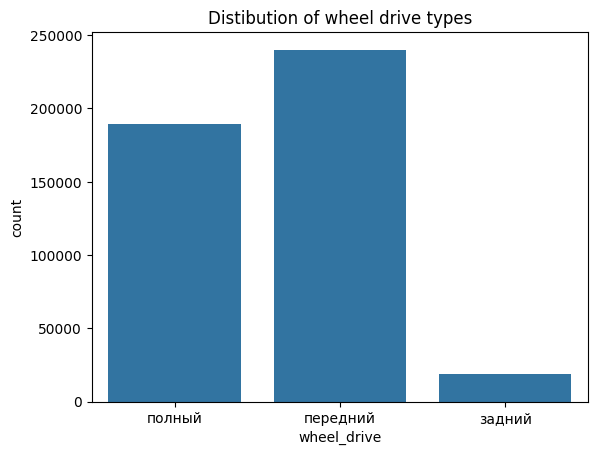

In [114]:
sns.countplot(data=df, x="wheel_drive")
plt.title("Distibution of wheel drive types")
plt.show()

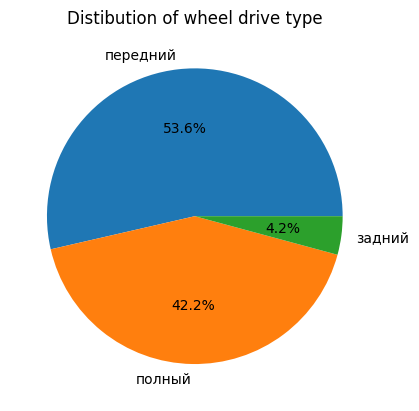

In [115]:
plt.pie(x=df["wheel_drive"].value_counts(), labels=df["wheel_drive"].value_counts().index, autopct='%1.1f%%')
plt.title("Distibution of wheel drive type")
plt.show()

Nominal feature\
There are not nulls\
Only 3 values. Front-wheel drive and all-wheel drive mostly\
This feature will be one-hot encoded

## Color

In [116]:
df["color"].isna().sum()

np.int64(0)

In [117]:
df["color"].nunique()

751

In [118]:
df["color"].unique()[:30]

array(['чёрный', 'жёлтый', 'синий', 'серый', 'белый', 'Lifestyle',
       'серебристый', 'Style', 'LX', 'Ultra', 'красный', 'Luxury Edition',
       'коричневый', 'Premium', 'Luxury', 'GLC 200 4MATIC Premium',
       'Action', 'зелёный', 'бежевый', 'Comfort', 'голубой', 'Active',
       'Prestige', 'Tech', 'фиолетовый', 'Tech Plus', 'Flagship',
       'золотистый', 'M35i xDrive', 'Dreamline'], dtype=object)

As color sometime was parsed complectation. So we'll combine all unique complectation names into one unique

In [119]:
colors = ["чёрный", "белый", "синий", "серый", "коричневый", "серебристый", "красный", "бежевый", "голубой", "зелёный", "оранжевый",
 "золотистый", "пурпурный", "фиолетовый", "жёлтый", "розовый"]

In [120]:
df.loc[~df["color"].isin(colors), "color"] = "комплектация"

In [121]:
df["color"].value_counts()

color
комплектация    113439
чёрный           83678
белый            80711
серый            57085
серебристый      30281
синий            28528
красный          16708
коричневый       11081
зелёный           7268
бежевый           6219
голубой           3726
пурпурный         2161
фиолетовый        1992
золотистый        1845
оранжевый         1674
жёлтый            1617
розовый            147
Name: count, dtype: int64

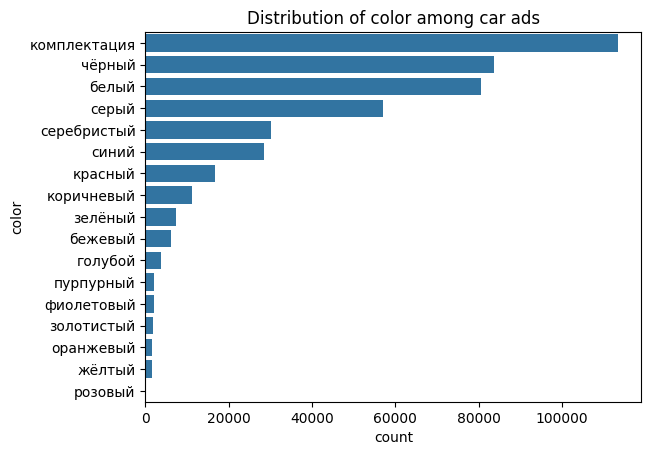

In [122]:
sns.countplot(df["color"], order=df["color"].value_counts().index)
plt.title("Distribution of color among car ads")
plt.show()

Mostly color are black, white, gray

In [123]:
df[df["color"]=="комплектация"].groupby(by="product_country")["name"].count()

product_country
Belarus            6630
China             88298
Czech Republic     1487
France              453
Germany            6300
Japan              5505
South Korea        3030
USA                 190
United Kingdom      442
Name: name, dtype: int64

Complectation color mostly appears in chinese cars. Maybe new cars goes with complectation

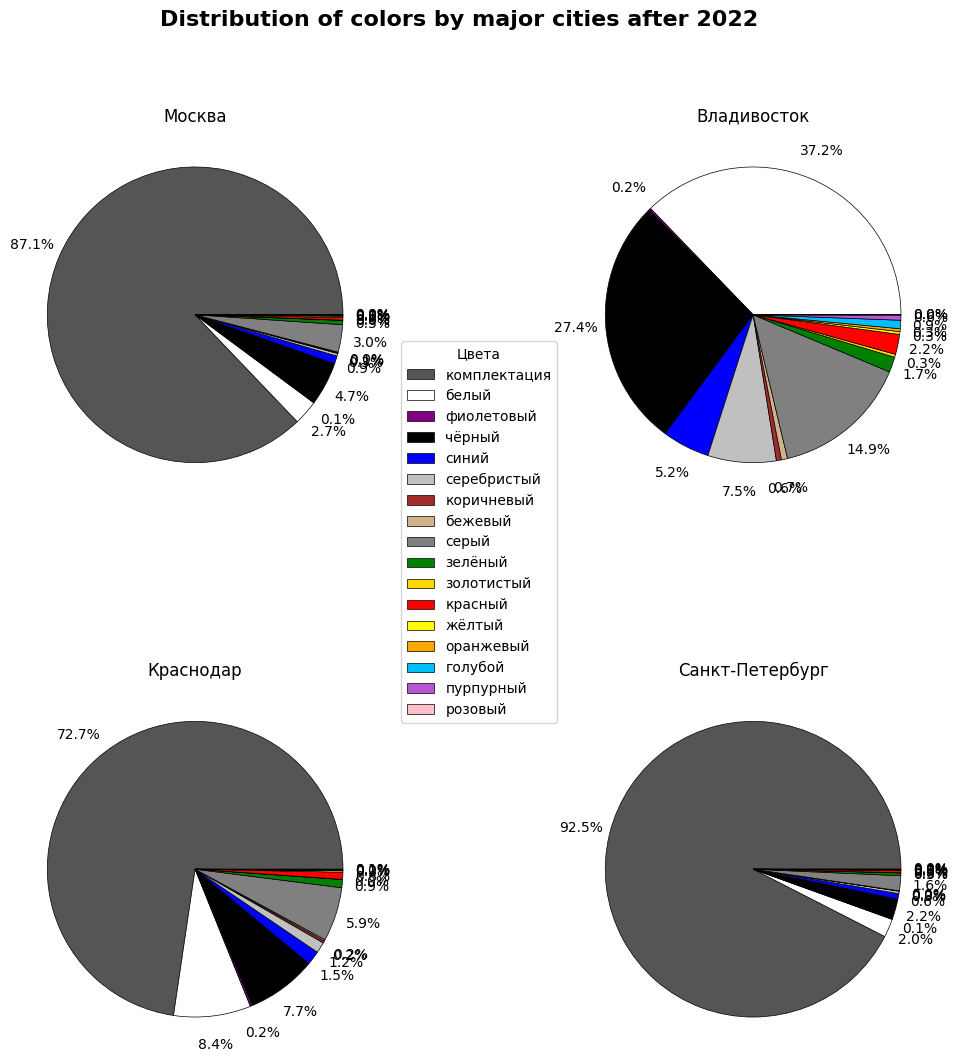

In [124]:
# Определяем цвета для каждого цвета автомобиля
colors_dict = {
    'комплектация': '#555555',  # Темно-серый
    'белый': 'white',
    'фиолетовый': 'purple',
    'чёрный': 'black',
    'синий': 'blue',
    'серебристый': 'silver',
    'коричневый': 'brown',
    'бежевый': 'tan',
    'серый': 'gray',
    'зелёный': 'green',
    'золотистый': 'gold',
    'красный': 'red',
    'жёлтый': 'yellow',
    'оранжевый': 'orange',
    'голубой': 'deepskyblue',
    'пурпурный': 'mediumorchid',
    'розовый': 'pink'
}

cities = ["Москва", "Владивосток", "Краснодар", "Санкт-Петербург"]

# Создаем фигуру с 2 строками и 2 столбцами
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Проходимся по городам и строим диаграммы
wedges_dict = {}  # Для легенды

for i, city in enumerate(cities):
    tmp = df[df["town"] == city]
    counts = tmp[(tmp["year"]>=2022)]["color"].value_counts()

    # Упорядочиваем индексы цветов в том порядке, в котором они есть в colors_dict
    sorted_colors = [color for color in colors_dict.keys() if color in counts.index]
    sorted_counts = counts.loc[sorted_colors]  # Упорядоченные значения

    # Берем цвета из словаря
    colors = [colors_dict[color] for color in sorted_colors]

    ax = axs[i // 2, i % 2]  # Определяем положение в сетке
    wedges, _, _ = ax.pie(sorted_counts, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, pctdistance=1.2)
    ax.set_title(city)

    # Добавляем цвета в словарь для легенды, если их еще нет
    for w, label in zip(wedges, sorted_colors):
        if label not in wedges_dict:
            wedges_dict[label] = w

# Добавляем легенду
fig.suptitle("Distribution of colors by major cities after 2022", fontsize=16, fontweight="bold")
fig.legend(wedges_dict.values(), wedges_dict.keys(), title="Цвета", loc="center", fontsize=10)
plt.show()


Vladivostok is still unique city - there are only few cars with "complectation"

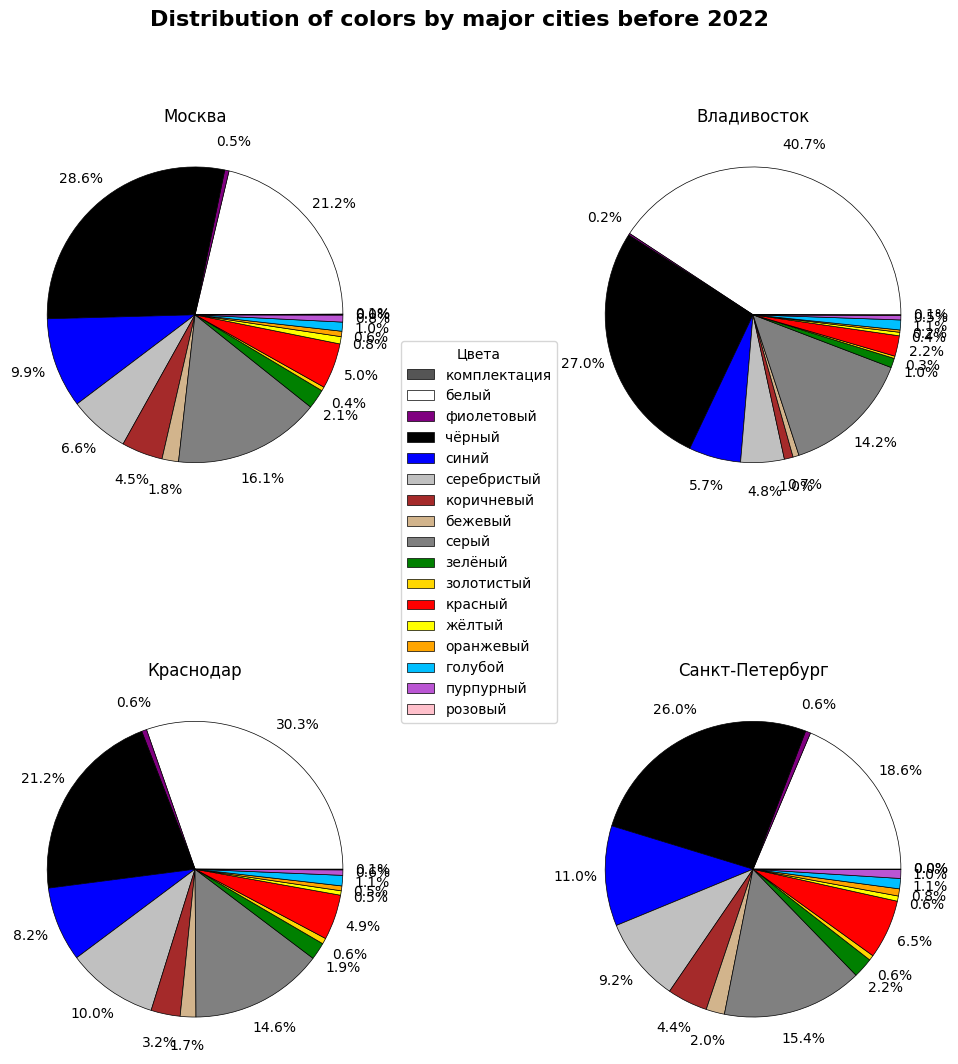

In [125]:
# Определяем цвета для каждого цвета автомобиля
colors_dict = {
    'комплектация': '#555555',  # Темно-серый
    'белый': 'white',
    'фиолетовый': 'purple',
    'чёрный': 'black',
    'синий': 'blue',
    'серебристый': 'silver',
    'коричневый': 'brown',
    'бежевый': 'tan',
    'серый': 'gray',
    'зелёный': 'green',
    'золотистый': 'gold',
    'красный': 'red',
    'жёлтый': 'yellow',
    'оранжевый': 'orange',
    'голубой': 'deepskyblue',
    'пурпурный': 'mediumorchid',
    'розовый': 'pink'
}

cities = ["Москва", "Владивосток", "Краснодар", "Санкт-Петербург"]

# Создаем фигуру с 2 строками и 2 столбцами
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Проходимся по городам и строим диаграммы
wedges_dict = {}  # Для легенды

for i, city in enumerate(cities):
    tmp = df[df["town"] == city]
    counts = tmp[(tmp["year"]<2022)]["color"].value_counts()

    # Упорядочиваем индексы цветов в том порядке, в котором они есть в colors_dict
    sorted_colors = [color for color in colors_dict.keys() if color in counts.index]
    sorted_counts = counts.loc[sorted_colors]  # Упорядоченные значения

    # Берем цвета из словаря
    colors = [colors_dict[color] for color in sorted_colors]

    ax = axs[i // 2, i % 2]  # Определяем положение в сетке
    wedges, _, _ = ax.pie(sorted_counts, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, pctdistance=1.2)
    ax.set_title(city)

    # Добавляем цвета в словарь для легенды, если их еще нет
    for w, label in zip(wedges, sorted_colors):
        if label not in wedges_dict:
            wedges_dict[label] = w

# Добавляем легенду
fig.suptitle("Distribution of colors by major cities before 2022", fontsize=16, fontweight="bold")
fig.legend(wedges_dict.values(), wedges_dict.keys(), title="Цвета", loc="center", fontsize=10)
plt.show()


Nominal feature\
There are not nulls\
A lot of unique values denoting complectation united in one value  "complectation"\
This feature will be one-hot encoded

## Km

In [126]:
df["km"].isna().sum()

np.int64(0)

In [127]:
df["km"].describe()

count     448160.000000
mean      115354.077907
std       112570.690109
min            0.000000
25%            0.000000
50%        96000.000000
75%       193114.250000
max      1000000.000000
Name: km, dtype: float64

In [128]:
#Percents of new cars
round(df[df["km"] == 0]["km"].count() / df.shape[0], 4)*100

np.float64(25.31)

<Axes: xlabel='km', ylabel='Count'>

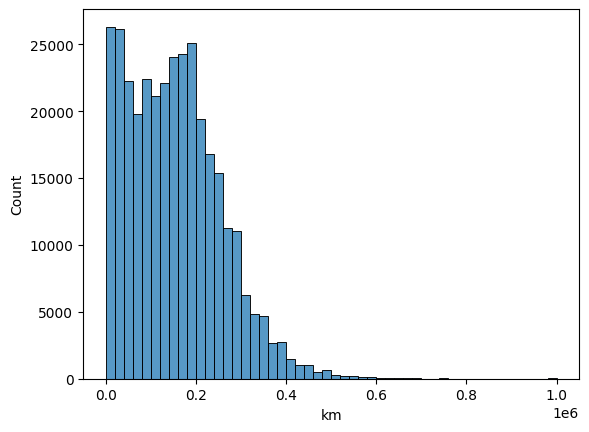

In [129]:
sns.histplot(df[df["km"]>0]["km"], bins=50)

Under 200 000 km distribution looks like uniform, than count of cars by each kilometr rapidly decreases

In [130]:
#Examples of car ads with most huge amount of driven kilometres
df.sort_values(by="km", ascending=False).head()

engine_v  engine_power fuel_type transmission_type salon_type  \
125221       1.8          90.0    Бензин          механика      седан   
298483       2.3         136.0    Бензин           автомат      седан   
313691       2.0         130.0    Бензин           автомат      седан   
245930       1.8         110.0    Бензин           автомат      седан   
58741        2.4         170.0    Бензин           автомат      седан   

       wheel_drive   color       km  \
125221    передний   синий  1000000   
298483      задний   серый  1000000   
313691      задний  чёрный  1000000   
245930    передний  чёрный  1000000   
58741     передний   синий  1000000   

                                                      url     price  year  \
125221  https://auto.ru/cars/used/sale/audi/80/1126911...  500000.0  1990   
298483  https://auto.ru/cars/used/sale/mercedes/w124/1...   70000.0  1985   
313691  https://auto.ru/cars/used/sale/nissan/skyline/...   65500.0  1994   
245930  https://auto.ru/cars/used/sale/nissan/presea/1...       NaN  1990   
58741   https://auto.ru/cars/used/sale/volvo/s80/11205...       NaN  2003   

              town                     name           additional_tags  salon  \
125221      Москва          Audi 80 IV (B3)  [История авто бесплатно]      0   
298483      Тамбов   Mercedes-Benz W124 230  [История авто бесплатно]      0   
313691       Томск  Nissan Skyline IX (R33)  [История авто бесплатно]      0   
245930  Красноярск          Nissan Presea I  [История авто бесплатно]      0   
58741       Липецк              Volvo S80 I  [История авто бесплатно]      0   

        seller  on order  verified dealler    model          brand  page  \
125221       0         0                 0       80           Audi    10   
298483       0         0                 0     W124  Mercedes-Benz     2   
313691       0         0                 0  Skyline         Nissan     4   
245930       0         0                 0   Presea         Nissan     1   
58741        0         0                 0      S80          Volvo     9   

       product_country              region  population  
125221         Germany              Москва  13149803.0  
298483         Germany  Тамбовская область    256268.0  
313691           Japan     Томская область    545391.0  
245930           Japan   Красноярский край   1205473.0  
58741              NaN    Липецкая область    485260.0

Numeric feature\
There are not nulls\
Distribution is hard to define. Mean and median is around 100 000. 25% of cars are new\
Maybe will be better to standardize

## Year

In [131]:
df["year"].isna().sum()

np.int64(0)

In [132]:
df["year"].describe()

count    448160.000000
mean       2016.115124
std           7.696977
min        1936.000000
25%        2011.000000
50%        2018.000000
75%        2024.000000
max        2025.000000
Name: year, dtype: float64

Minimum value is 1936. Too old cars are outlires, so better to drop them

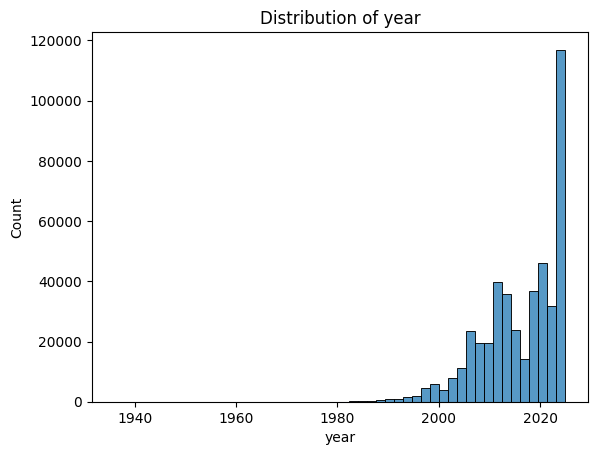

In [133]:
sns.histplot(df['year'], bins=50)
plt.title("Distribution of year")
plt.show()

Let's define border year of 1980

<Axes: xlabel='year', ylabel='Count'>

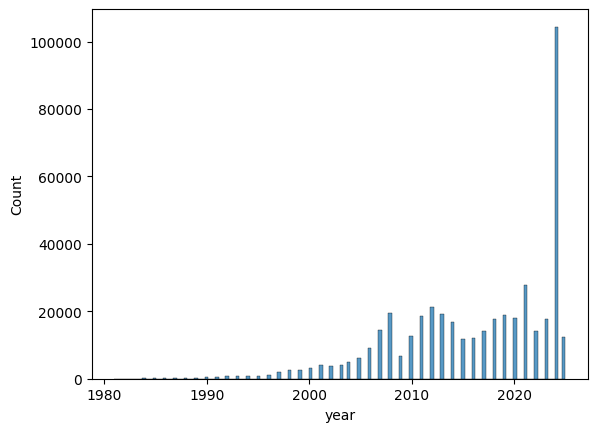

In [134]:
sns.histplot(df[df['year'] > 1980]['year'])

Most of cars were produced since 2007. In 2024, the largest number of cars were produced among those presented on the website.

In [135]:
tmp = df.groupby(by="year")["km"].mean().reset_index().astype(np.int64)
tmp = tmp[tmp["year"] >= 1980]

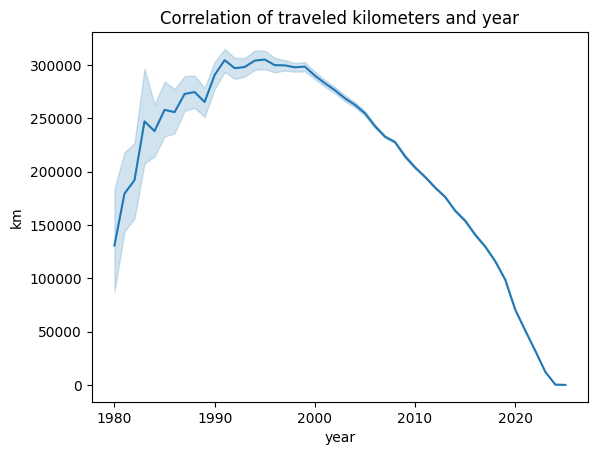

In [136]:
sns.lineplot(data=df[df["year"]>=1980], x="year", y="km")
plt.title("Correlation of traveled kilometers and year")
plt.show()

Most used cars are in nineties. Before this time mileage is lesser and with higher std. After ninties mileage decreases

<Axes: xlabel='year', ylabel='name'>

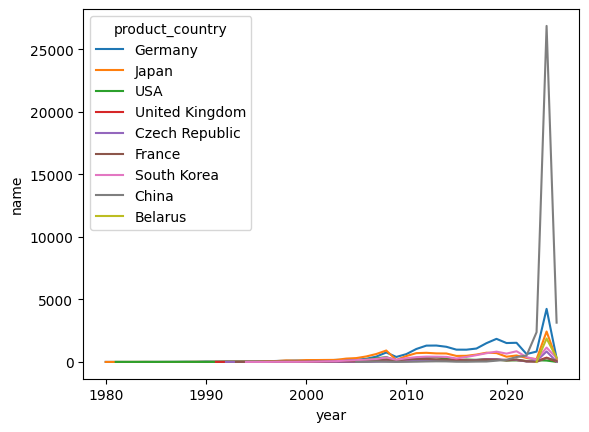

In [137]:
sns.lineplot(data=df[(df["town"]=="Москва") & (df["year"]>=1980)].groupby(by=["year", "product_country"])["name"].count().reset_index(),
             x="year", y="name", hue="product_country")

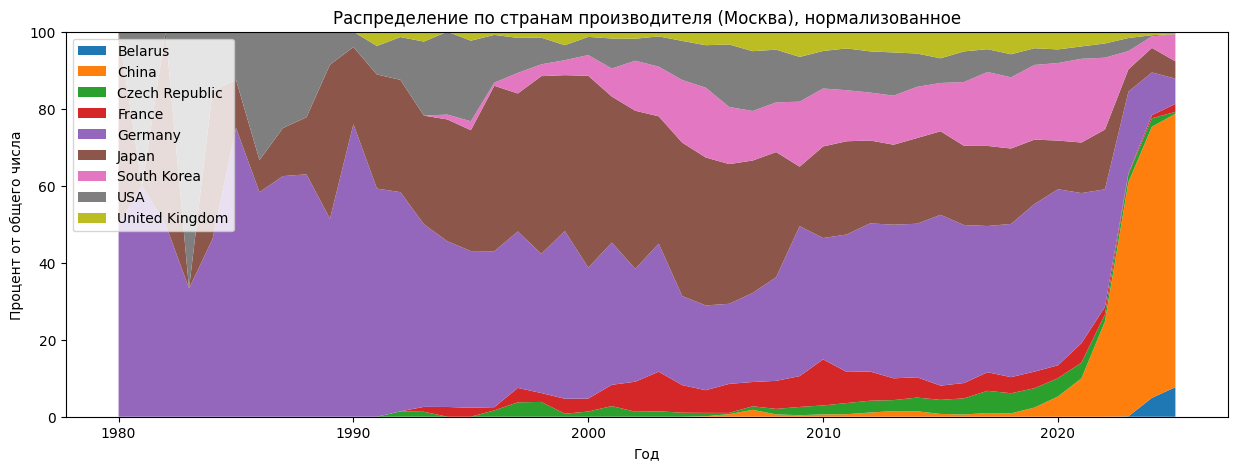

In [138]:
# Фильтрация данных
df_filtered = df[(df["town"] == "Москва") & (df["year"] >= 1980)]

# Агрегация
df_grouped = df_filtered.groupby(["year", "product_country"])["name"].count().unstack(fill_value=0)

# Нормализация: приводим суммы к 100% в каждый год
df_grouped_normalized = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Построение графика
fig, ax = plt.subplots(figsize=(15, 5))
ax.stackplot(df_grouped_normalized.index, df_grouped_normalized.T, labels=df_grouped_normalized.columns)

# Настройки графика
ax.set_xlabel("Год")
ax.set_ylabel("Процент от общего числа")
ax.set_title("Распределение по странам производителя (Москва), нормализованное")
ax.set_ylim(0, 100)  # Фиксируем высоту, чтобы всегда был прямоугольник
ax.legend(loc="upper left")

plt.show()


## Additional tags

In [139]:
df["additional_tags"].isna().sum()

np.int64(0)

In [140]:
#Example of values in this feature. It is set-value
df["additional_tags"].head()

0    [История авто бесплатно]
1    [История авто бесплатно]
2    [История авто бесплатно]
3    [История авто бесплатно]
4    [История авто бесплатно]
Name: additional_tags, dtype: object

In [141]:
unique_tags = set(df["additional_tags"].explode().dropna())
len(unique_tags)

532

In [142]:
#most frequently appearancing tags
tag_counts = df["additional_tags"].explode().dropna().value_counts()
tag_counts.head()

additional_tags
История авто бесплатно    275766
Без пробега по РФ          32483
От собственника            30070
Отчёт Авто.ру              29116
Скидки                     25306
Name: count, dtype: int64

In [143]:
#mean ads where one tag appears
tag_counts.mean()

np.float64(761.843984962406)

<Axes: xlabel='count', ylabel='additional_tags'>

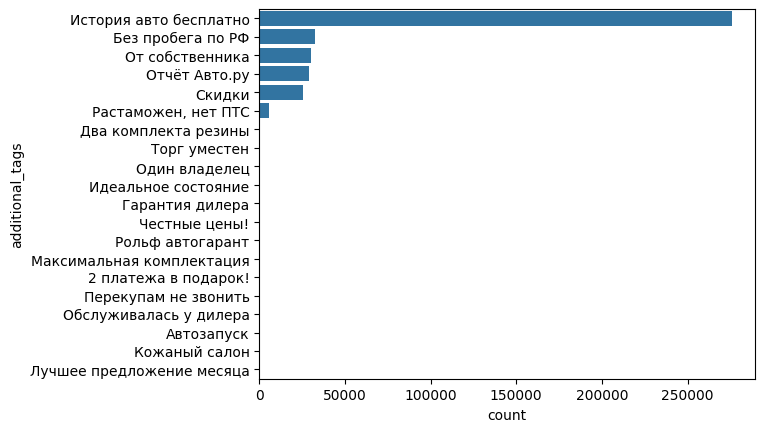

In [144]:
sns.barplot(tag_counts.reset_index().head(20), x="count", y="additional_tags")

Only 6 tags shows up enough frequantly to be seen on the barplot

In [145]:
#Lets save tags with more than 100 appearences
tags_to_save = tag_counts[tag_counts >= 100].index
tags_to_save

Index(['История авто бесплатно', 'Без пробега по РФ', 'От собственника',
       'Отчёт Авто.ру', 'Скидки', 'Растаможен, нет ПТС',
       'Два комплекта резины', 'Торг уместен', 'Один владелец',
       'Идеальное состояние', 'Гарантия дилера', 'Честные цены!',
       'Рольф автогарант', 'Максимальная комплектация', '2 платежа в подарок!',
       'Перекупам не звонить', 'Обслуживалась у дилера', 'Автозапуск',
       'Кожаный салон', 'Лучшее предложение месяца', 'Срочно'],
      dtype='object', name='additional_tags')

In [146]:
#Here lets explode with saving only few tags
mlb = MultiLabelBinarizer(classes=tags_to_save)
ohe_tags = pd.DataFrame(mlb.fit_transform(df["additional_tags"]), columns=tags_to_save, index=df.index)
df = pd.concat([df, ohe_tags], axis=1)

In [147]:
#Checking that all is alright
df.head()

engine_v  engine_power fuel_type transmission_type         salon_type  \
0       3.0         340.0    Бензин           автомат  внедорожник 5 дв.   
1       1.5         177.0    Бензин           автомат  внедорожник 5 дв.   
2       3.0         333.0    Бензин             робот              седан   
3       1.5         109.0    Дизель          механика  внедорожник 5 дв.   
4       1.7          80.0    Бензин          механика  внедорожник 5 дв.   

  wheel_drive   color      km  \
0      полный  чёрный  230000   
1    передний  жёлтый  122300   
2      полный   синий  160500   
3      полный   серый  188000   
4      полный   белый  170000   

                                                 url     price  year  \
0  https://auto.ru/cars/used/sale/land_rover/rang...  339000.0  2014   
1  https://auto.ru/cars/used/sale/geely/atlas_pro...       NaN  2023   
2  https://auto.ru/cars/used/sale/audi/a6/1126072...  355000.0  2016   
3  https://auto.ru/cars/used/sale/renault/duster/...       NaN  2016   
4  https://auto.ru/cars/used/sale/chevrolet/niva/...   45000.0  2011   

               town                         name           additional_tags  \
0            Казань    Land Rover Range Rover IV  [История авто бесплатно]   
1          Тимохово              Geely Atlas Pro  [История авто бесплатно]   
2            Москва   Audi A6 IV (C7) Рестайлинг  [История авто бесплатно]   
3  Набережные Челны  Renault Duster I Рестайлинг  [История авто бесплатно]   
4           Туймазы  Chevrolet Niva I Рестайлинг  [История авто бесплатно]   

   salon  seller  on order  verified dealler        model       brand  page  \
0      0       0         0                 0  Range Rover  Land Rover    16   
1      0       0         0                 0    Atlas Pro  Volkswagen     7   
2      0       0         0                 0           A6        Audi    73   
3      0       0         0                 1       Duster     Renault    11   
4      0       0         0                 0         Niva   Chevrolet    22   

  product_country                   region  population  \
0  United Kingdom     Республика Татарстан   1318604.0   
1         Germany       Московская область      5000.0   
2         Germany                   Москва  13149803.0   
3          France     Республика Татарстан    544383.0   
4             USA  Республика Башкортостан     68349.0   

   История авто бесплатно  Без пробега по РФ  От собственника  Отчёт Авто.ру  \
0                       1                  0                0              0   
1                       1                  0                0              0   
2                       1                  0                0              0   
3                       1                  0                0              0   
4                       1                  0                0              0   

   Скидки  Растаможен, нет ПТС  Два комплекта резины  Торг уместен  \
0       0                    0                     0             0   
1       0                    0                     0             0   
2       0                    0                     0             0   
3       0                    0                     0             0   
4       0                    0                     0             0   

   Один владелец  Идеальное состояние  Гарантия дилера  Честные цены!  \
0              0                    0                0              0   
1              0                    0                0              0   
2              0                    0                0              0   
3              0                    0                0              0   
4              0                    0                0              0   

   Рольф автогарант  Максимальная комплектация  2 платежа в подарок!  \
0                 0                          0                     0   
1                 0                          0                     0   
2                 0                          0                  

In [148]:
#Adding new variable - number of tags in the ad
df["num_tags"] = df["additional_tags"].apply(lambda x: len(x) if isinstance(x, list) else 0)

This feature was set valued. Was created 10 binare features that represents most dences tags. Also was created feature with number of tags in ad. Remains to drop column additional_tags

## Page

In [149]:
df["page"].isna().sum()

np.int64(0)

<Axes: xlabel='page', ylabel='Count'>

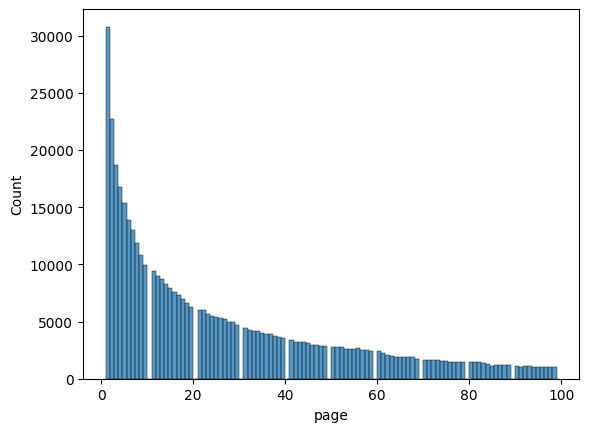

In [150]:
sns.histplot(df["page"])

In [151]:
tmp = df.groupby(["brand", "model"])["page"].max().reset_index()
tmp.head()

brand model  page
0  Audi   100    11
1  Audi   200     1
2  Audi    80    12
3  Audi    90     1
4  Audi    A1     4

In [152]:
tmp = tmp.rename(columns={"page": "max_page"})
df = df.merge(tmp, on=["brand", "model"], how="left")
df["rel_page"] = df["page"] / df["max_page"]

<Axes: xlabel='rel_page', ylabel='Count'>

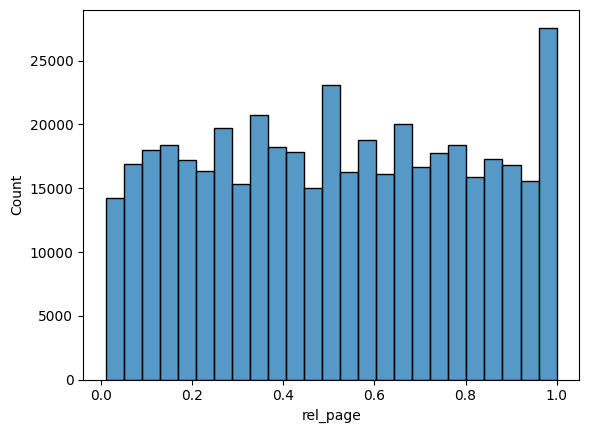

In [153]:
sns.histplot(df["rel_page"], bins=25)

Page is numeric feature
It has geometrical distribution - for appearence of a n value is needed appearence of n-1
This feature has been replaced by feature rel_page representing relative position of ad among pages with filter on model and brand. Rel_page with some noise has uniform distribution and limited by 0 and 1. There are peaks at 1.0 and 0.5 - many models has only 1 and 2 pages 

## Salon

In [154]:
df["salon"].isna().sum()

np.int64(0)

In [155]:
round(df["salon"].mean()*100, 4)

np.float64(15.559)

Feature binary nominal

There are no nulls

Around 15% of ads are placed by specialized salons

## Seller

In [156]:
df["seller"].isna().sum()

np.int64(0)

In [157]:
df["seller"].mean()

np.float64(0.0)

In [158]:
df["seller"].sum()

np.int64(0)

There  are only 0, so better to drop this column

In [159]:
df = df.drop(columns="seller")

## On order

In [160]:
df["on order"].isna().sum()

np.int64(0)

In [161]:
round(df["on order"].mean()*100, 4)

np.float64(11.2034)

Feature binary nominal

There are no nulls

Around 11% of ads are placed by seller who is ready to select and buy a car based on the individual request of the client.

## Verified dealler

In [162]:
df["verified dealler"].isna().sum()

np.int64(0)

In [163]:
round(df["verified dealler"].mean()*100, 4)

np.float64(9.4596)

Feature binary nominal

There are no nulls

Around 9% of ads are placed by deallers who were verified by Auto.ru

## Price

In [164]:
#By mistake prices were taken without last 0, so we need to multiply this on 10
df["price"] = df["price"]*10

In [165]:
df["price"].isna().sum()

np.int64(70311)

There are a lot of nulls. These objects will be dropped

In [166]:
df = df.dropna(subset=["price"])

In [167]:
df.shape

(377849, 47)

In [168]:
round(df["price"].mean())

2783233

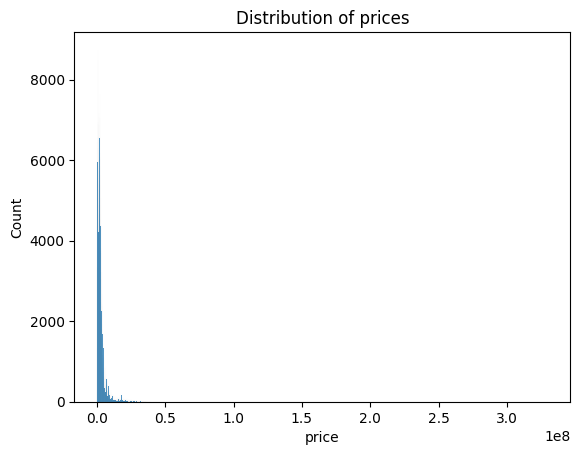

In [169]:
sns.histplot(data=df, x="price")
plt.title("Distribution of prices")
plt.show()

In [170]:
#examples of the most expansive car ads
df.sort_values(by="price", ascending=False).head(5)

engine_v  engine_power fuel_type transmission_type         salon_type  \
169702       2.9         450.0    Бензин          механика               купе   
327333       2.5         200.0    Бензин           автомат               купе   
242812       4.0         503.0    Бензин           автомат              седан   
344227       4.0         585.0    Бензин           автомат  внедорожник 5 дв.   
146600       4.8         560.0    Бензин             робот               купе   

       wheel_drive        color      km  \
169702      задний  серебристый    2300   
327333      задний       чёрный  100000   
242812      полный       чёрный      10   
344227      полный       чёрный      10   
146600      задний      красный    3200   

                                                      url        price  year  \
169702  https://auto.ru/cars/used/sale/porsche/959/112...  330000000.0  1987   
327333  https://auto.ru/cars/used/sale/nissan/skyline/...  246995290.0  1998   
242812  https://auto.ru/cars/used/sale/mercedes/s_klas...  180000000.0  2024   
344227  https://auto.ru/cars/used/sale/mercedes/g_klas...  135000490.0  2025   
146600  https://auto.ru/cars/used/sale/lexus/lfa/11260...  121250000.0  2012   

                town                                               name  \
169702   Владивосток                                        Porsche 959   
327333   Владивосток                             Nissan Skyline X (R34)   
242812        Москва   Mercedes-Benz S-Класс 580 Long 4MATIC VII (W223)   
344227  Благовещенск  Mercedes-Benz G-Класс AMG 63 AMG II (W465) Рес...   
146600   Владивосток                                          Lexus LFA   

                                          additional_tags  salon  on order  \
169702               [Растаможен, нет ПТС, Отчёт Авто.ру]      0         1   
327333                                    [Отчёт Авто.ру]      0         0   
242812               [Растаможен, нет ПТС, Отчёт Авто.ру]      0         0   
344227                                                 []      0         1   
146600  [Растаможен, нет ПТС, Без пробега по РФ, Отчёт...      0         1   

        verified dealler        model          brand  page product_country  \
169702                 0          959        Porsche     1         Germany   
327333                 0      Skyline         Nissan     6           Japan   
242812                 0      S-Класс  Mercedes-Benz    13         Germany   
344227                 0  G-Класс AMG  Mercedes-Benz     6         Germany   
146600                 0          LFA          Lexus     1           Japan   

                  region  population  История авто бесплатно  \
169702   Приморский край    591628.0                       0   
327333   Приморский край    591628.0                       0   
242812            Москва  13149803.0                       0   
344227  Амурская область    239864.0                       0   
146600   Приморский край    591628.0                       0   

        Без пробега по РФ  От собственника  Отчёт Авто.ру  Скидки  \
169702                  0                0              1       0   
327333                  0                0              1       0   
242812                  0                0              1       0   
344227                  0                0              0       0   
146600                  1                0              1       0   

        Растаможен, нет ПТС  Два комплекта резины  Торг уместен  \
169702                    1                     0             0   
327333                    0                     0             0   
242812                    1                     0             0   
344227                    0                     0             0   
146600                    1                     0             0   

        Один владелец  Идеальное состояние  Гарантия дилера  Честные цены!  \
169702              0                    0                0              0   
327333              0            

In [171]:
#df.loc[35945, "url"]

Better to define limitation of price

In [172]:
df["price"].describe()

count    3.778490e+05
mean     2.783233e+06
std      3.511734e+06
min      3.000000e+04
25%      1.050000e+06
50%      2.000000e+06
75%      3.125700e+06
max      3.300000e+08
Name: price, dtype: float64

In [173]:
IQR = df["price"].quantile(0.75) - df["price"].quantile(0.25)
price_limit = df["price"].quantile(0.75) + 1.5*IQR
price_limit

np.float64(6239250.0)

Let's round this limitation to 7 000 000

In [174]:
price_limit = 7_000_000

In [175]:
df[df["price"] >= price_limit].shape[0]

23380

In [176]:
filtredprice_df = df[df["price"] < price_limit]

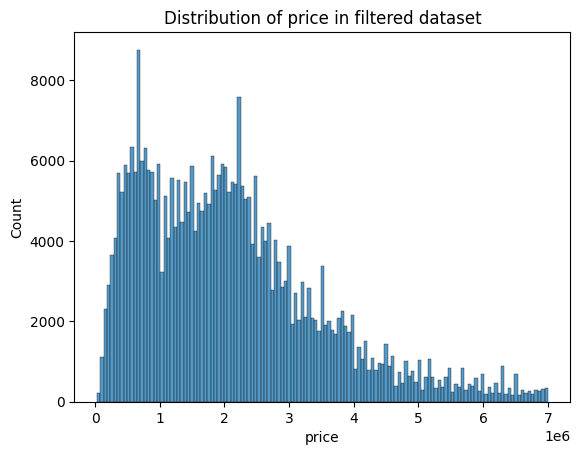

In [177]:
sns.histplot(data=filtredprice_df, x="price")
plt.title("Distribution of price in filtered dataset")
plt.show()

Distribution has long right "tail". Distribution looks like normal but with drop on place of expecting mean. Another version there is two distributions with two peaks in the middle on 500 000 and 2 100 000

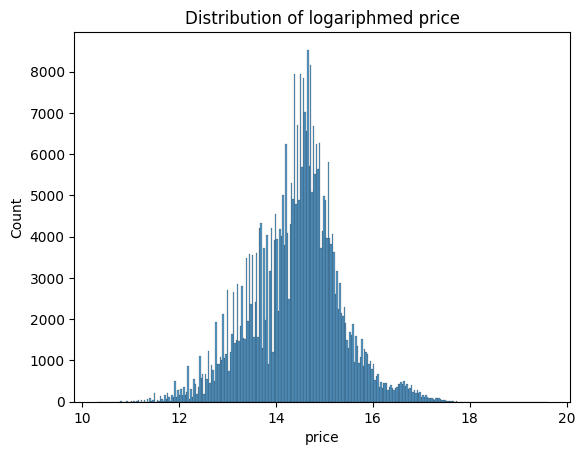

In [178]:
sns.histplot(x=df["price"].apply(np.log1p))
plt.title("Distribution of logariphmed price")
plt.show()

In [179]:
df["log_price"] = df["price"].apply(np.log1p)

Distribution of logariphmed price is more simular to normal. It has one peak now and is more compact

In [180]:
price_m_onbrand = round(filtredprice_df.groupby("brand")["price"].mean()/1000, 3).sort_values(ascending=False).reset_index()
price_m_onbrand

brand     price
0         LiXiang  5910.139
1           Voyah  5031.893
2         Genesis  4002.716
3         Porsche  3658.704
4          Hongqi  3658.333
5           Exeed  3632.895
6           Lexus  3328.442
7             BMW  3186.404
8           Chery  3155.238
9      Land Rover  3086.788
10       Cadillac  2963.558
11  Mercedes-Benz  2890.346
12            GAC  2861.557
13           Jeep  2861.251
14         Jetour  2810.156
15         Jaguar  2700.758
16          Haval  2690.532
17           Mini  2538.332
18        Changan  2532.143
19           Audi  2480.171
20          Geely  2457.085
21       Infiniti  2378.724
22          Volvo  2286.530
23          Dodge  2274.505
24         Belgee  2184.253
25            FAW  2165.350
26            JAC  2084.036
27          Omoda  2015.084
28            Kia  1969.866
29          Skoda  1960.609
30          Livan  1873.858
31     Volkswagen  1853.247
32         Toyota  1831.107
33        Hyundai  1777.782
34     Great Wall  1769.429
35          Mazda  1695.703
36         Subaru  1686.946
37          Honda  1603.395
38     Mitsubishi  1355.012
39        Citroen  1336.053
40      SsangYong  1330.651
41           Ford  1294.768
42         Nissan  1242.530
43         Suzuki  1066.442
44        Renault   958.777
45      Chevrolet   889.721
46        Peugeot   850.357
47           Opel   818.310
48         Datsun   588.341
49          Lifan   559.802
50         Daewoo   257.447

In [181]:
price_std_onbrand = round(df.groupby("brand")["price"].std().map(np.sqrt), 3).sort_values(ascending=False).reset_index()

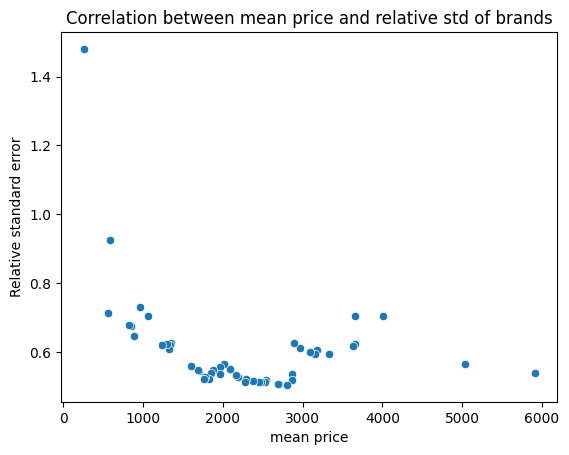

In [182]:
sns.scatterplot(x=price_m_onbrand["price"], y=price_std_onbrand["price"]/price_m_onbrand["price"])
plt.xlabel("mean price")
plt.ylabel("Relative standard error")
plt.title("Correlation between mean price and relative std of brands")
plt.show()

In [183]:
#mean price and std on country of origin
price_oncountry = round(filtredprice_df.groupby(by="product_country")["price"].agg(["mean", "std"])/1000, 3).sort_values(by="mean", ascending=False)
price_oncountry["std"] = round(price_oncountry["std"].map(np.sqrt)/price_oncountry["mean"]*100, 3)
price_oncountry.rename(columns={"std": "rel_s"})

mean  rel_s
product_country                 
United Kingdom   2948.300  1.357
China            2719.477  1.200
Germany          2449.975  1.684
Belarus          2184.253  0.831
Czech Republic   1960.609  1.849
South Korea      1779.135  2.003
Japan            1640.221  2.126
USA              1279.692  2.796
France            996.516  2.840

Initial thought was assumption that more expansive car category has higher variation of price and so on higher std. But as we see cheapest brands have high variation as well

In [184]:
df[df["model"]=="X5"].head()

engine_v  engine_power fuel_type transmission_type         salon_type  \
69        3.0         313.0    Дизель           автомат  внедорожник 5 дв.   
231       3.0         245.0    Дизель           автомат  внедорожник 5 дв.   
552       3.0         235.0    Дизель           автомат  внедорожник 5 дв.   
586       3.0         313.0    Дизель           автомат  внедорожник 5 дв.   
591       2.0         313.0    Гибрид           автомат  внедорожник 5 дв.   

    wheel_drive        color      km  \
69       полный       чёрный  155000   
231      полный  серебристый  258700   
552      полный        серый  214000   
586      полный        белый  133200   
591      полный       чёрный  140000   

                                                   url      price  year  \
69   https://auto.ru/cars/used/sale/bmw/x5/11272800...  4950000.0  2017   
231  https://auto.ru/cars/used/sale/bmw/x5/11264743...  2250000.0  2012   
552  https://auto.ru/cars/used/sale/bmw/x5/11246381...  1950000.0  2009   
586  https://auto.ru/cars/used/sale/bmw/x5/11268990...  4749900.0  2015   
591  https://auto.ru/cars/used/sale/bmw/x5/11272620...  4900000.0  2018   

          town                            name  \
69      Москва            BMW X5 40d III (F15)   
231   Бронницы  BMW X5 30d II (E70) Рестайлинг   
552   Тольятти             BMW X5 30d II (E70)   
586     Москва            BMW X5 40d III (F15)   
591  Челябинск            BMW X5 40e III (F15)   

                               additional_tags  salon  on order  \
69                    [История авто бесплатно]      0         0   
231                   [История авто бесплатно]      0         0   
552                   [История авто бесплатно]      0         0   
586  [История авто бесплатно, От собственника]      0         0   
591                   [История авто бесплатно]      0         0   

     verified dealler model brand  page product_country               region  \
69                  0    X5   BMW    70         Germany               Москва   
231                 0    X5   BMW    40         Germany   Московская область   
552                 0    X5   BMW    81         Germany    Самарская область   
586                 0    X5   BMW    96         Germany               Москва   
591                 0    X5   BMW    86         Germany  Челябинская область   

     population  История авто бесплатно  Без пробега по РФ  От собственника  \
69   13149803.0                       1                  0                0   
231     20981.0                       1                  0                0   
552    667956.0                       1                  0                0   
586  13149803.0                       1                  0                1   
591   1177058.0                       1                  0                0   

     Отчёт Авто.ру  Скидки  Растаможен, нет ПТС  Два комплекта резины  \
69               0       0                    0                     0   
231              0       0                    0                     0   
552              0       0                    0                     0   
586              0       0                    0                     0   
591              0       0                    0                     0   

     Торг уместен  Один владелец  Идеальное состояние  Гарантия дилера  \
69              0              0                    0                0   
231             0              0                    0                0   
552             0              0                    0                0   
586             0              0                    0                0   
591             0              0                    0                0   

     Честные цены!  Рольф автогарант  Максимальная комплектация  \
69               0                 0                          0   
231              0                 0                          0   
552              0                 0                          0   
586              0              

In [185]:
#For next plot we will take few models
tmp = df[df["brand"]=="BMW"].groupby(["page", "model"])["price"].mean().reset_index()
tmp = tmp.merge(tmp.groupby("model")["page"].max(), how="left", left_on="model", right_index=True).rename(columns={"page_x": "page", "page_y":"max_page"})
tmp = tmp.sort_values(by="page", ascending=False)

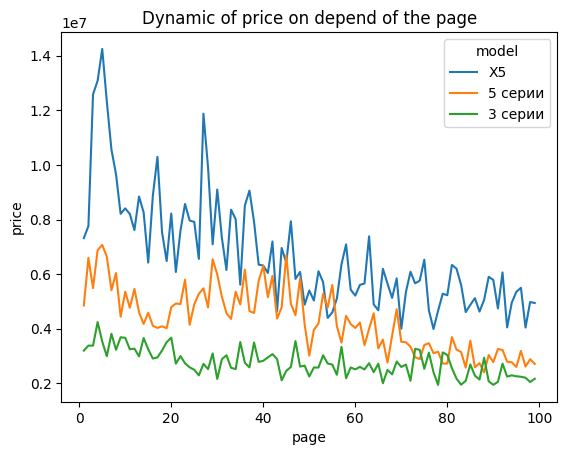

In [186]:
sns.lineplot(data=tmp[tmp["max_page"]==99], x="page", y="price", hue="model")
plt.title("Dynamic of price on depend of the page")
plt.show()

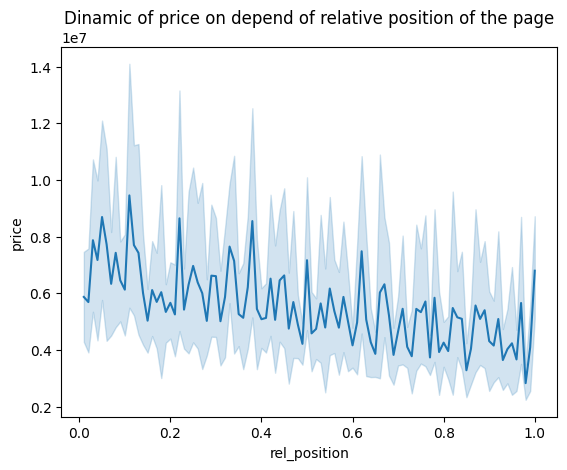

In [187]:
tmp["rel_position"] = round(tmp["page"] / tmp["max_page"], 2)
sns.lineplot(data=tmp, x="rel_position", y="price")
plt.title("Dinamic of price on depend of relative position of the page")
plt.show()

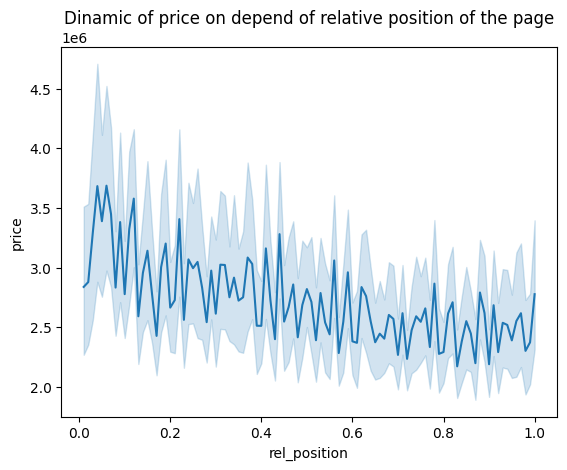

In [188]:
tmp = df.groupby(["page", "model"])["price"].mean().reset_index()
tmp = tmp.merge(tmp.groupby("model")["page"].max(), how="left", left_on="model", right_index=True).rename(columns={"page_x": "page", "page_y":"max_page"})
tmp["rel_position"] = round(tmp["page"] / tmp["max_page"], 2) #lets add this feature to dataset
sns.lineplot(data=tmp, x="rel_position", y="price")
plt.title("Dinamic of price on depend of relative position of the page")
plt.show()

We can note that price decreses with further page, but variation is too high to claim it

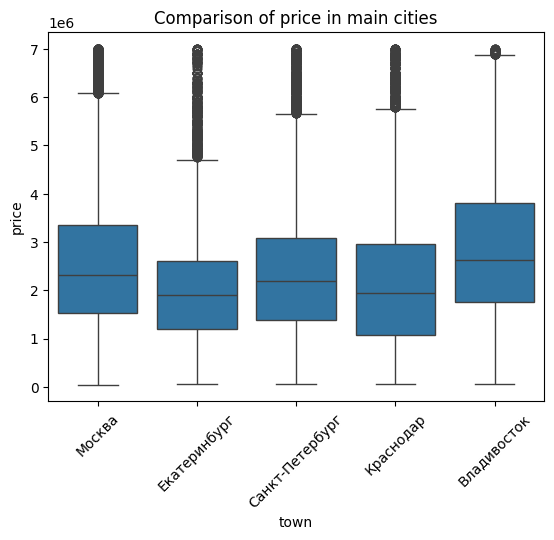

In [189]:
sns.boxplot(data=filtredprice_df[filtredprice_df["town"].isin(["Москва", "Санкт-Петербург", "Краснодар", "Владивосток", "Екатеринбург"])], y="price", x="town")
plt.xticks(rotation=45)
plt.title("Comparison of price in main cities")
plt.show()

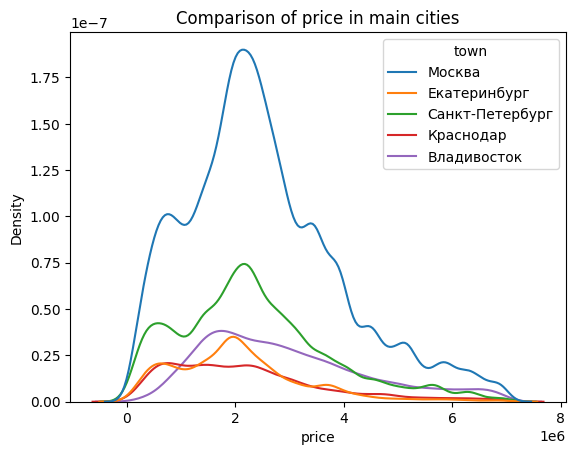

In [190]:
sns.kdeplot(data=filtredprice_df[filtredprice_df["town"].isin(["Москва", "Санкт-Петербург", "Краснодар", "Владивосток", "Екатеринбург"])], x="price", hue="town")
plt.title("Comparison of price in main cities")
plt.show()

In [191]:
#Most expansive cities
tmp = filtredprice_df.groupby(by="town")["price"].agg(["mean", "count"])
tmp = tmp[tmp["count"] >= 1000].sort_values(by="mean", ascending=False).reset_index()
tmp.head(10)

town          mean  count
0       Владивосток  2.919802e+06  18083
1         Хабаровск  2.874994e+06   3577
2          Балашиха  2.636954e+06   4184
3      Благовещенск  2.599911e+06   1867
4            Москва  2.525030e+06  77869
5             Минск  2.520829e+06   3433
6             Химки  2.494390e+06   4208
7   Санкт-Петербург  2.345030e+06  29233
8              Сочи  2.303196e+06   2233
9  Набережные Челны  2.240908e+06   1650

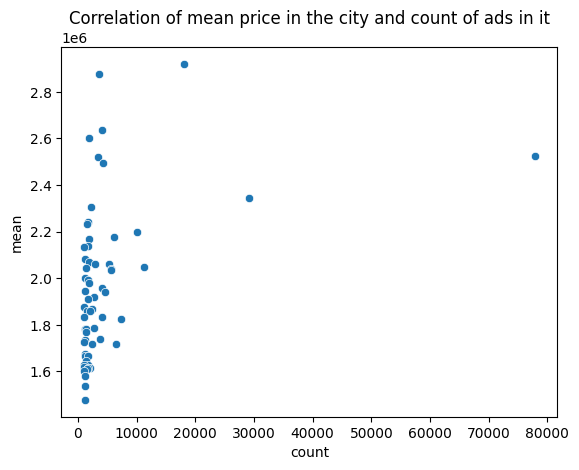

In [192]:
sns.scatterplot(data=tmp, x="count", y="mean")
plt.title("Correlation of mean price in the city and count of ads in it")
plt.show()

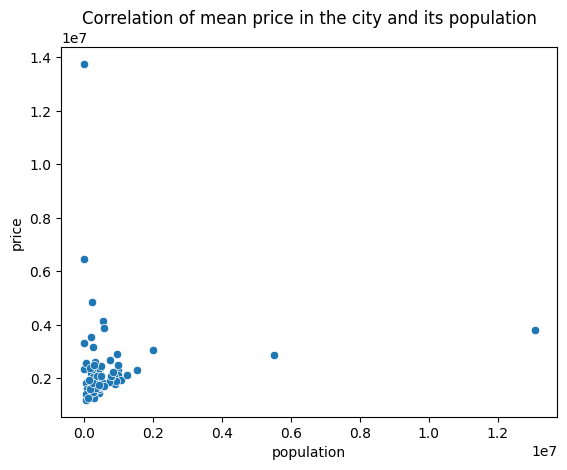

In [193]:
sns.scatterplot(data=df.groupby("region")[["price", "population"]].mean(), x="population", y="price")
plt.title("Correlation of mean price in the city and its population")
plt.show()

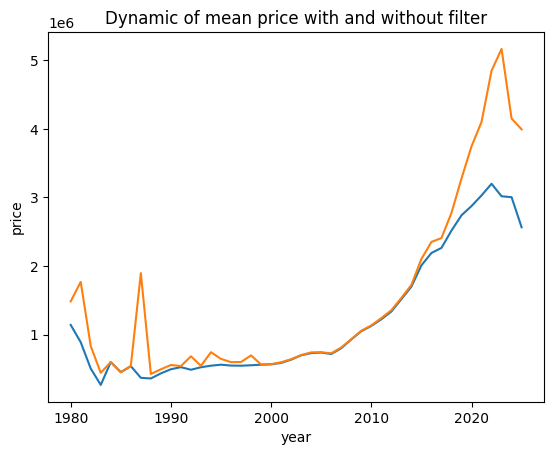

In [194]:
sns.lineplot(data=filtredprice_df[filtredprice_df["year"]>=1980].groupby("year")["price"].mean())
sns.lineplot(data=df[df["year"]>=1980].groupby("year")["price"].mean())
plt.title("Dynamic of mean price with and without filter")
plt.show()

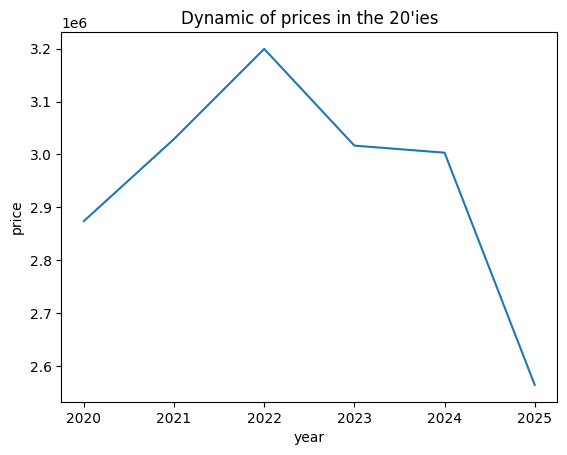

In [195]:
sns.lineplot(data=filtredprice_df[filtredprice_df["year"]>=2020].groupby("year")["price"].mean())
plt.title("Dynamic of prices in the 20'ies")
plt.show()

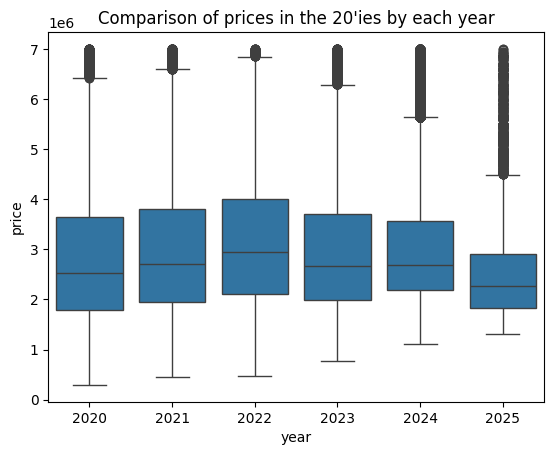

In [196]:
sns.boxplot(data=filtredprice_df[filtredprice_df["year"] >= 2020], x="year", y="price")
plt.title("Comparison of prices in the 20'ies by each year")
plt.show()

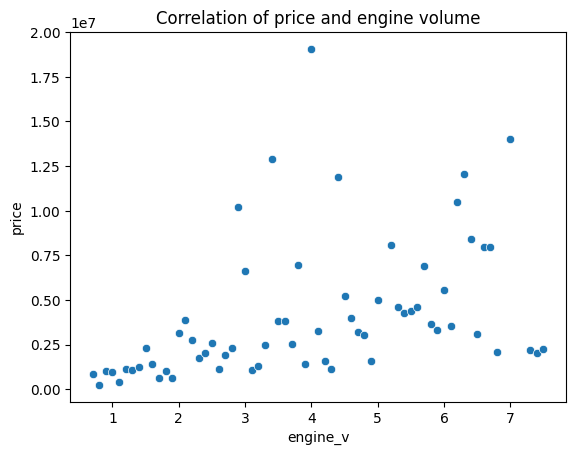

In [197]:
sns.scatterplot(data=df.groupby("engine_v")["price"].mean().reset_index(), x="engine_v", y="price")
plt.title("Correlation of price and engine volume")
plt.show()

In [198]:
#Example on the one model
df.groupby("model")["engine_v"].nunique().sort_values(ascending=False).head()

model
E-Класс           20
S-Класс           18
7 серии           16
Grand Cherokee    15
C-Класс           15
Name: engine_v, dtype: int64

<Axes: xlabel='engine_v', ylabel='price'>

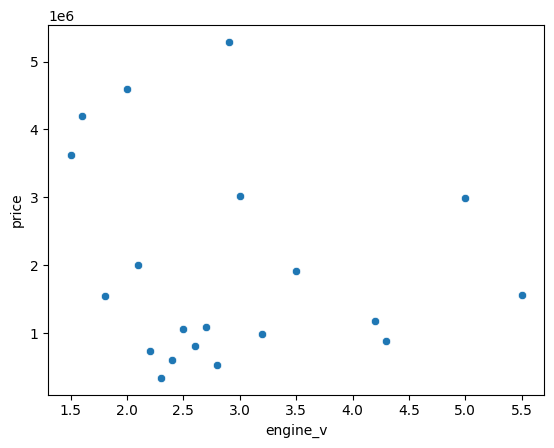

In [199]:
sns.scatterplot(data=df[df["model"] == "E-Класс"].groupby("engine_v")["price"].mean().reset_index(), x="engine_v", y="price")

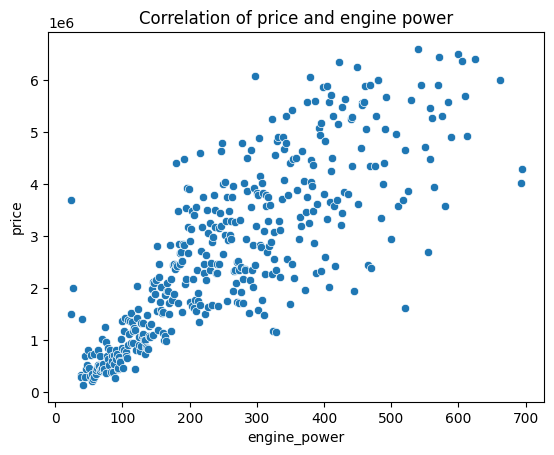

In [200]:
sns.scatterplot(data=filtredprice_df.groupby("engine_power")["price"].mean().reset_index(), x="engine_power", y="price")
plt.title("Correlation of price and engine power")
plt.show()

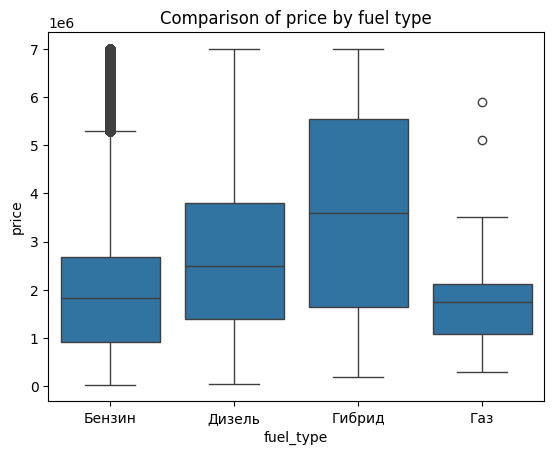

In [201]:
sns.boxplot(data=filtredprice_df, x="fuel_type", y="price")
plt.title("Comparison of price by fuel type")
plt.show()

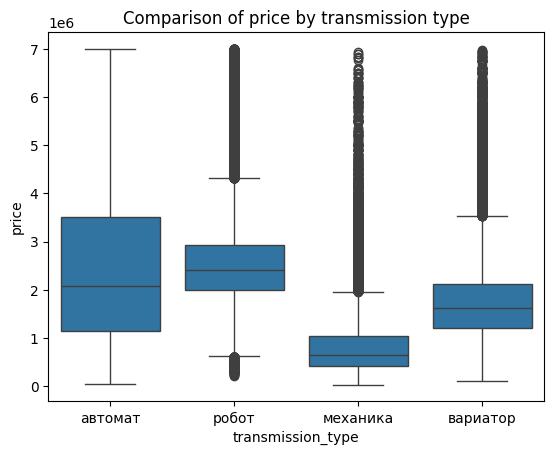

In [202]:
sns.boxplot(data=filtredprice_df, x="transmission_type", y="price")
plt.title("Comparison of price by transmission type")
plt.show()

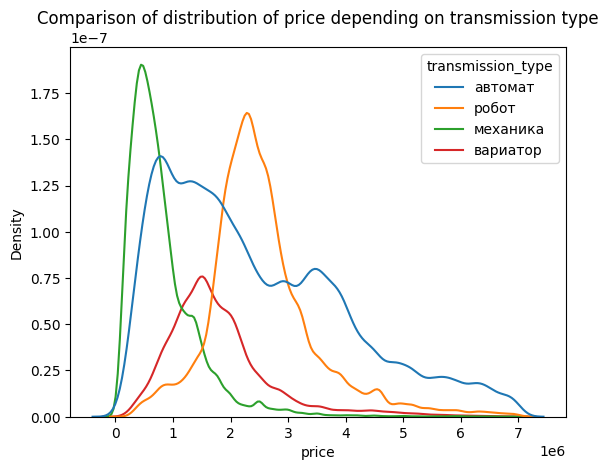

In [203]:
sns.kdeplot(data=filtredprice_df, x="price", hue="transmission_type")
plt.title("Comparison of distribution of price depending on transmission type")
plt.show()

In [204]:
tmp = df["salon_type"].value_counts().reset_index().reset_index()

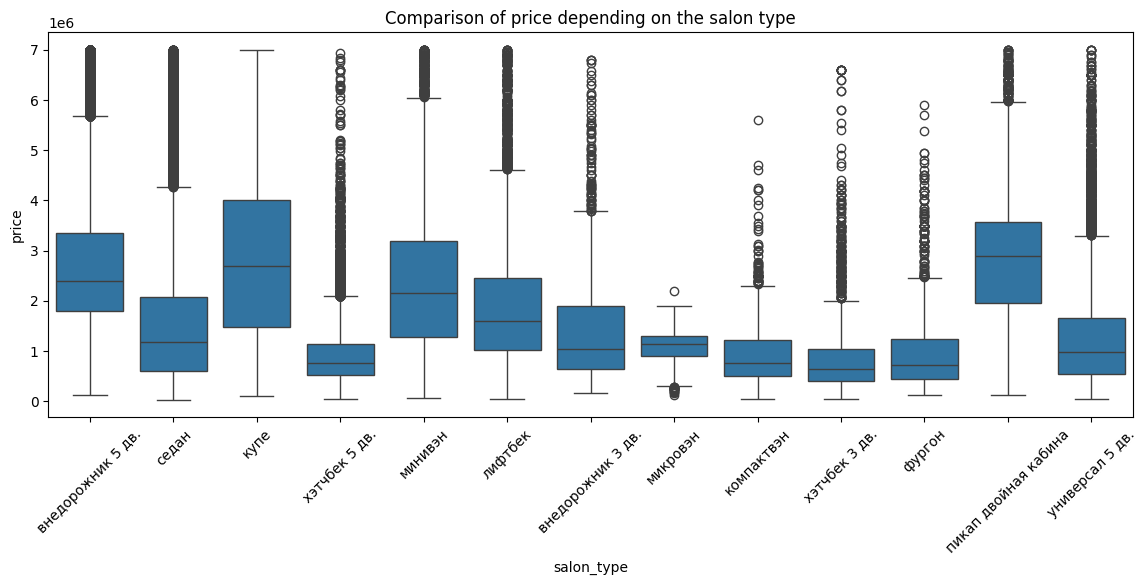

In [205]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=45)
sns.boxplot(data=filtredprice_df[filtredprice_df["salon_type"].isin(tmp[tmp["count"] >= 1000]["salon_type"])], x="salon_type", y="price")
plt.title("Comparison of price depending on the salon type")
plt.show()

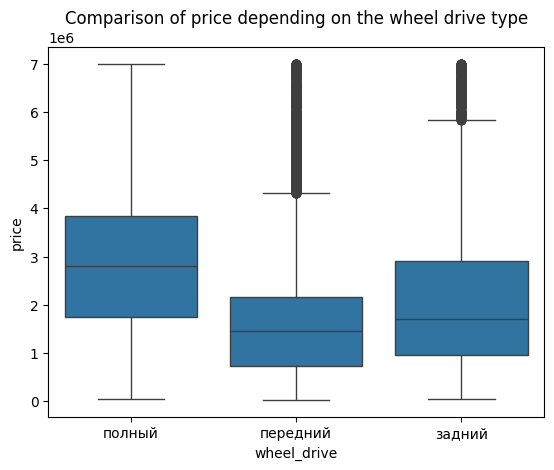

In [206]:
sns.boxplot(data=filtredprice_df, x="wheel_drive", y="price")
plt.title("Comparison of price depending on the wheel drive type")
plt.show()

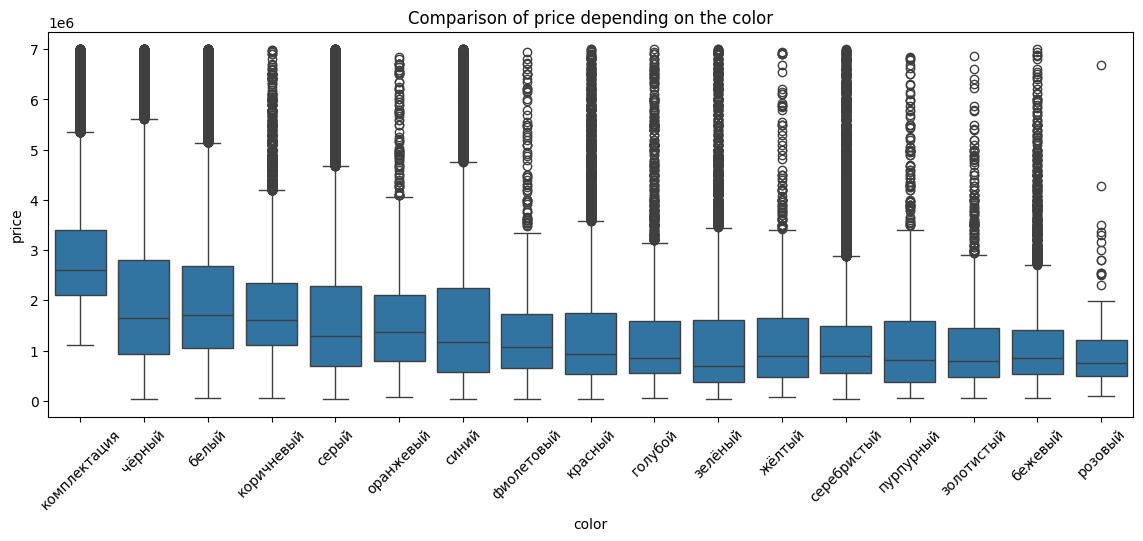

In [207]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=45)
sns.boxplot(data=filtredprice_df, x="color", y="price", order=filtredprice_df.groupby(by="color")["price"].mean().sort_values(ascending=False).index)
plt.title("Comparison of price depending on the color")
plt.show()

The most expensive category is compectation(it could be caused by year feature - most off them are new). Others are between 1 000 000 and 1 500 000. More popular colors such as black, white, gray plus brown are more axpensive and has bigger range

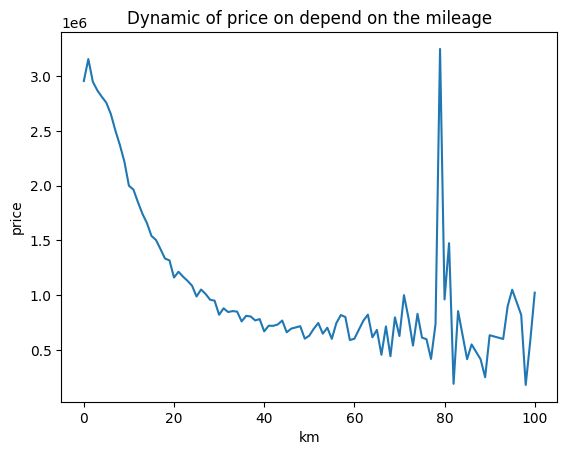

In [208]:
sns.lineplot(data=filtredprice_df.groupby(filtredprice_df["km"] // 10000)["price"].mean())
plt.title("Dynamic of price on depend on the mileage")
plt.show()

Last area has high variation due to small count of cars with more than 60

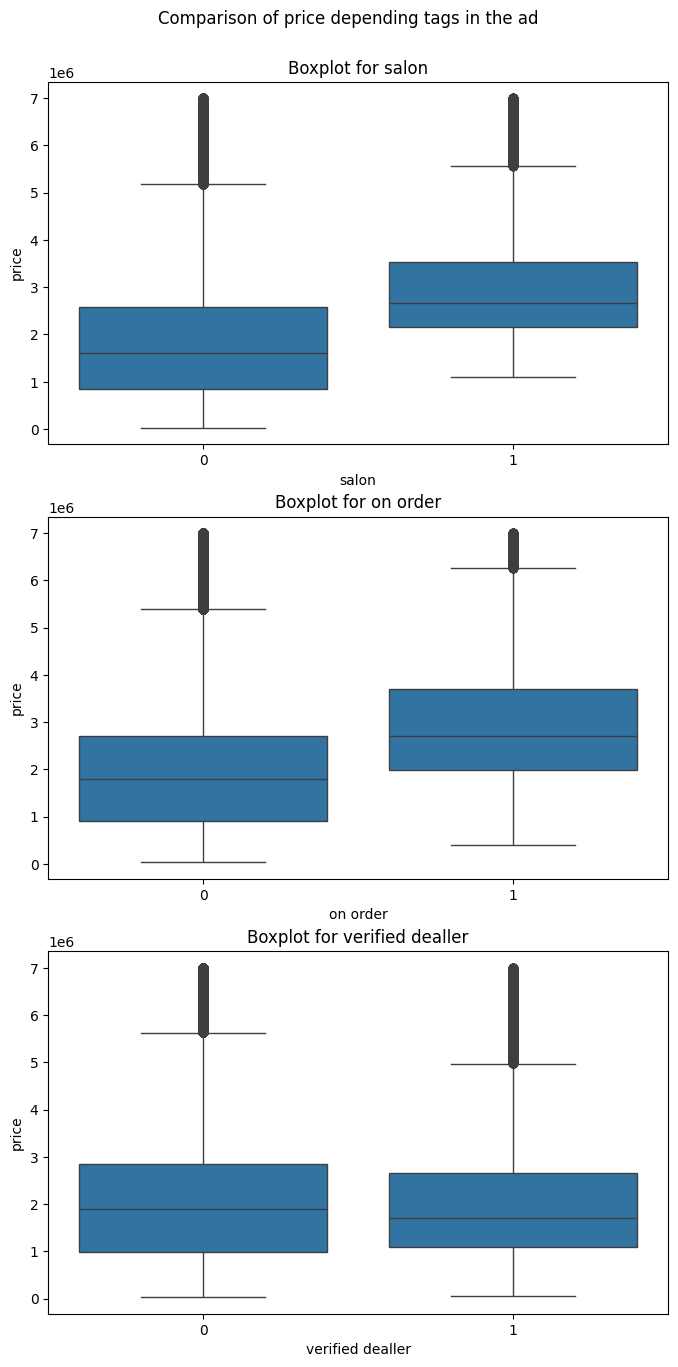

In [209]:
features = ["salon", "on order", "verified dealler"]

fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 16))
fig.suptitle("Comparison of price depending tags in the ad", y=0.925)

for ax, feature in zip(axes, features):
    sns.boxplot(data=filtredprice_df, x=feature, y="price", ax=ax)
    ax.set_title(f"Boxplot for {feature}")

**salon** - looks like car with this tag are more expensive

**on_order** - looks like car with this tag are more expensive

**verified dealler** - looks like there are not significent differrancies

Significancy of these feature will be tested by t-test on data preparation fase.

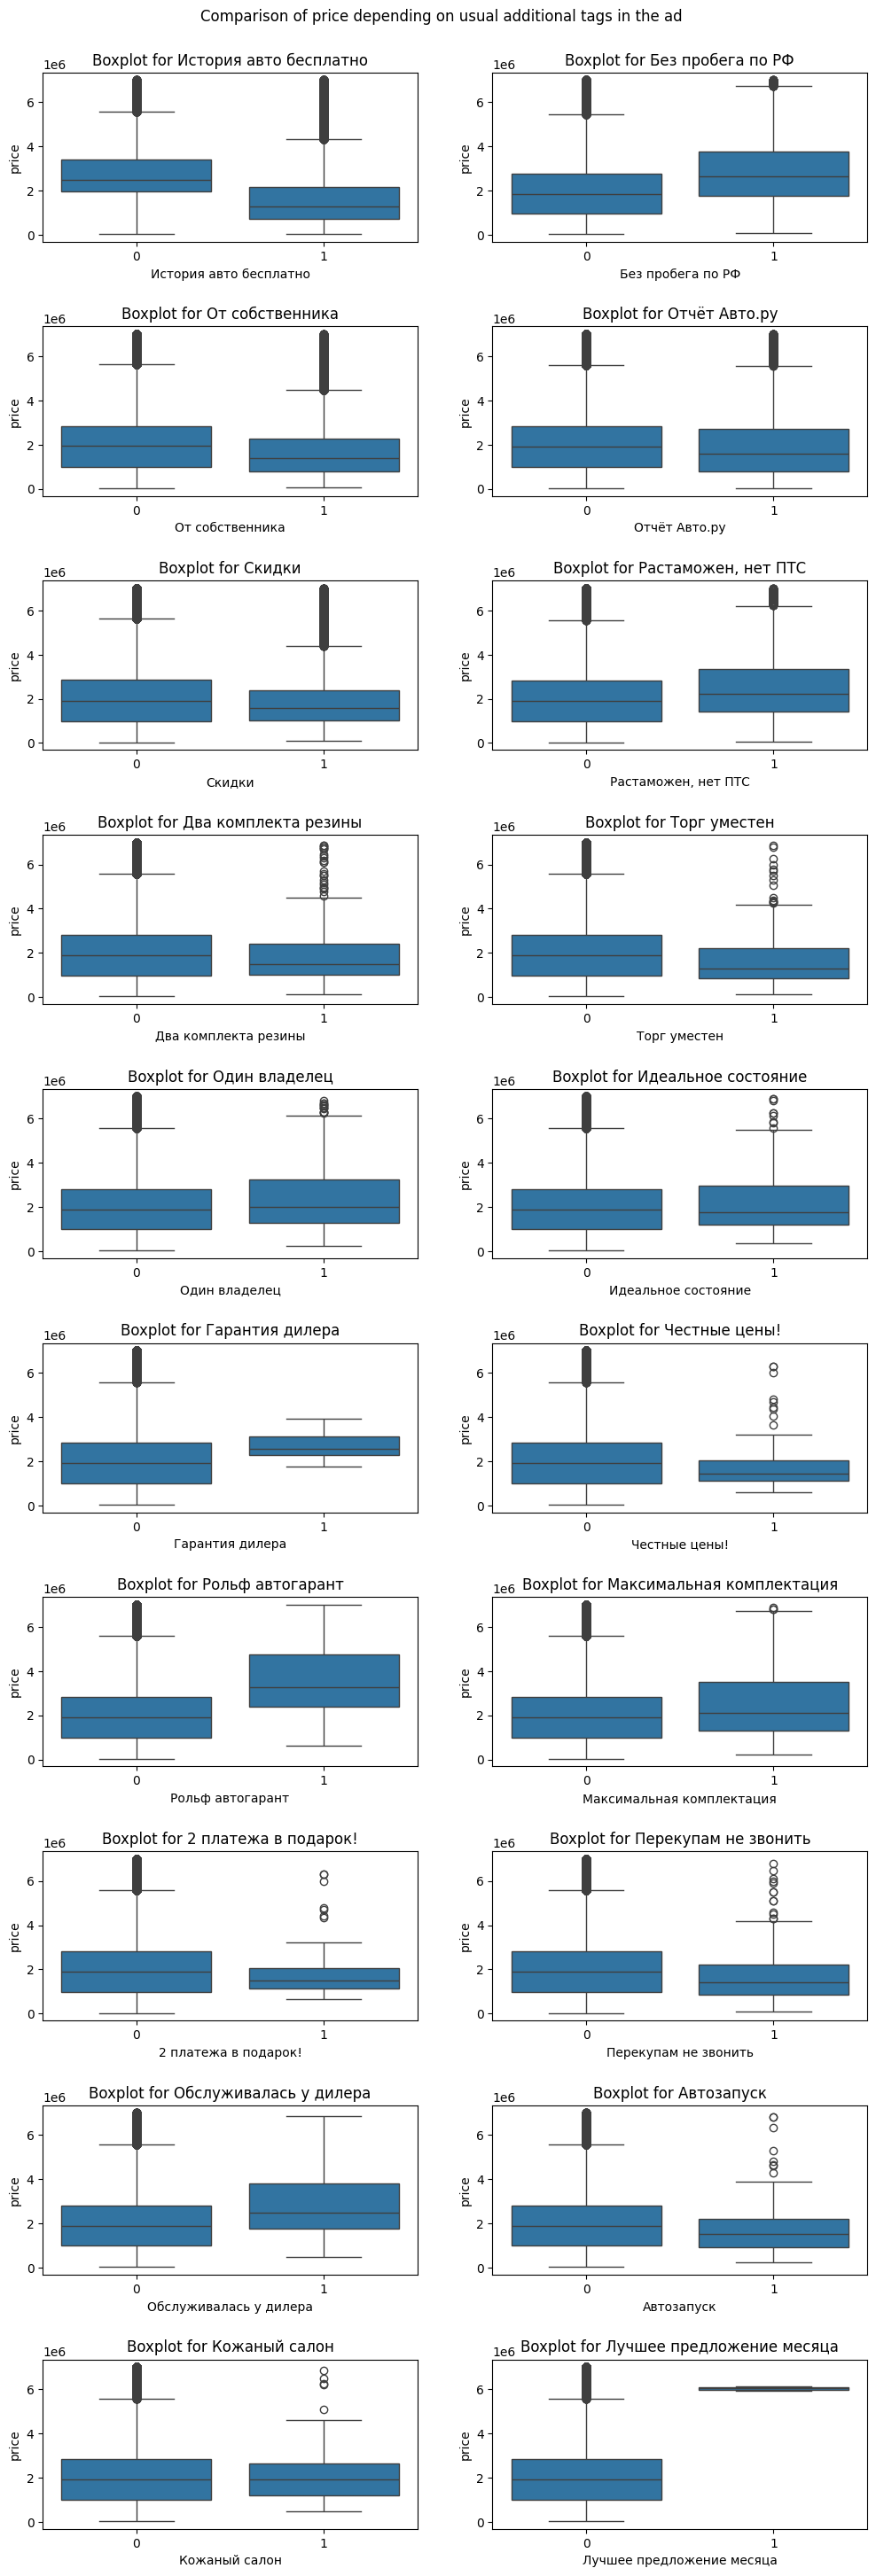

In [210]:
features = list(tags_to_save)

fig, axes = plt.subplots(nrows=len(features)//2, ncols=2, figsize=(12, 36))  # Увеличил ширину для двух колонок
fig.suptitle("Comparison of price depending on usual additional tags in the ad", y=0.9)

# Распаковываем массив осей в одномерный список
axes = axes.flatten()

for ax, feature in zip(axes, features):
    sns.boxplot(data=filtredprice_df, x=feature, y="price", ax=ax)
    ax.set_title(f"Boxplot for {feature}")

plt.subplots_adjust(hspace=0.5)

**История авто бесплатно**(Free story of this car) - looks like cars with this tag are cheaper and it is significant

**Без пробега по РФ**(Without mileage in RF) - looks like cars with this tag are a little bit more expensive

**От собственниика**(Ad from owner) - looks like cars with this tag are a little bit cheaper

**Отчёт Авто.ру**(Report from Auto.ru) - looks like this tag is not significant but cars with this tag are a little bit cheaper

**Скидки**(Sales) -  looks like this tag is not significant but cars with this tag are a little bit cheaper

**Растоможен, нет ПТС**(Disinhibited, without мehicle passport) - looks like cars with this tag are a little bit more expensive

**Два комплекта резины**(Two complects of the tires) - looks like this tag is not significant but cars with this tag are a little bit cheaper


**Торг уместен**(Price on agreement) - looks like cars with this tag are a little bit cheaper

**Один владелец**(One owner) - looks like cars with this tag are a little bit more expensive

**Идеальное состояние**(Ideal condition) - looks like this tag is not significant

**Гарантия диллера**(Guarantee from dealler) - looks like cars with this tag are more expensive. Also cars with this tag are in limitated price category.

**Честные цены!**(Honest prices) - looks like this tag is not significant but cars with this tag are a little bit cheaper. Also cars with this tag are in limitated price category.

**Рольф автогарант**(Rolph garantee) - Rolph is company that also provide service to check condition of auto. Looks like cars with this tag are a little bit more expensive

**Макисмальная комплектация**(Maximum complictation) - looks like cars with this tag are a little bit more expensive.

**2 платежа в подарок**(2 payments as gift) - looks like this tag is not significant but cars with this tag are a little bit cheaper. Also cars with this tag are in limitated price category.

**Перекупам не звонить**(Do not call outbidders) - looks like cars with this tag are a little bit cheaper

**Обслуживалась у диллера**(Serviced by a dealer) - looks like cars with this tag are more expensive

**Автозапуск**(Auto-start) - looks like this tag is not significant but cars with this tag are a little bit cheaper.

**Кожанный салон**(Leather salon) - looks like this tag is not significant

**Лучшее предложение месяца**(Best ad of the month) - Cars with this tag are more expensive. Also cars with this tag are in limitated price category - they have almost same price. Maybe it is due to small count of cars with this tag.

Significancy of these feature will be tested by t-test on data preparation fase.

## One model EDA

Let's explore price one exact model

In [211]:
#Choosing one exact model
model_df = df[(df["brand"]=="BMW")&(df["model"]=="3 серии")]

In [212]:
model_df.head()

engine_v  engine_power fuel_type transmission_type       salon_type  \
143        2.0         150.0    Бензин          механика            седан   
955        2.0         190.0    Дизель           автомат  универсал 5 дв.   
1058       2.0         177.0    Дизель           автомат             купе   
1321       2.0         190.0    Дизель           автомат            седан   
1640       2.0         184.0    Бензин           автомат            седан   

     wheel_drive  color      km  \
143       задний  серый  257000   
955       полный  белый  189000   
1058      задний  белый  250000   
1321      полный  серый  153000   
1640      полный  белый   29000   

                                                    url      price  year  \
143   https://auto.ru/cars/used/sale/bmw/3er/1126922...   690000.0  2005   
955   https://auto.ru/cars/used/sale/bmw/3er/1126104...  3270000.0  2019   
1058  https://auto.ru/cars/used/sale/bmw/3er/4419215...  1620000.0  2008   
1321  https://auto.ru/cars/used/sale/bmw/3er/1122057...  2850000.0  2016   
1640  https://auto.ru/cars/used/sale/bmw/3er/1126947...  2250000.0  2020   

                 town                                         name  \
143   Санкт-Петербург         BMW 3 серии 320i V (E90/E91/E92/E93)   
955            Москва            BMW 3 серии 320d xDrive VII (G2x)   
1058          Воронеж         BMW 3 серии 320d V (E90/E91/E92/E93)   
1321           Москва  BMW 3 серии 320d xDrive VI (F3x) Рестайлинг   
1640             Омск            BMW 3 серии 320i xDrive VII (G2x)   

                                        additional_tags  salon  on order  \
143                            [История авто бесплатно]      0         0   
955                            [История авто бесплатно]      0         0   
1058                           [История авто бесплатно]      0         0   
1321          [История авто бесплатно, От собственника]      0         0   
1640  [Без пробега по РФ, Под заказ из Японии, Без п...      0         1   

      verified dealler    model brand  page product_country  \
143                  0  3 серии   BMW    22         Germany   
955                  0  3 серии   BMW    36         Germany   
1058                 0  3 серии   BMW    76         Germany   
1321                 0  3 серии   BMW    85         Germany   
1640                 0  3 серии   BMW     5         Germany   

                   region  population  История авто бесплатно  \
143       Санкт-Петербург   5597763.0                       1   
955                Москва  13149803.0                       1   
1058  Воронежская область   1046425.0                       1   
1321               Москва  13149803.0                       1   
1640       Омская область   1104485.0                       0   

      Без пробега по РФ  От собственника  Отчёт Авто.ру  Скидки  \
143                   0                0              0       0   
955                   0                0              0       0   
1058                  0                0              0       0   
1321                  0                1              0       0   
1640                  1                0              0       0   

      Растаможен, нет ПТС  Два комплекта резины  Торг уместен  Один владелец  \
143                     0                     0             0              0   
955                     0                     0             0              0   
1058                    0                     0             0              0   
1321                    0                     0             0              0   
1640                    0                     0             0              0   

      Идеальное состояние  Гарантия дилера  Честные цены!  Рольф автогарант  \
143                     0                0              0                 0   
955                     0                0              0                 0   
1058                    0                0              0                 0   
1321                    0  

In [213]:
model_df.shape

(2543, 48)

<Axes: xlabel='page', ylabel='price'>

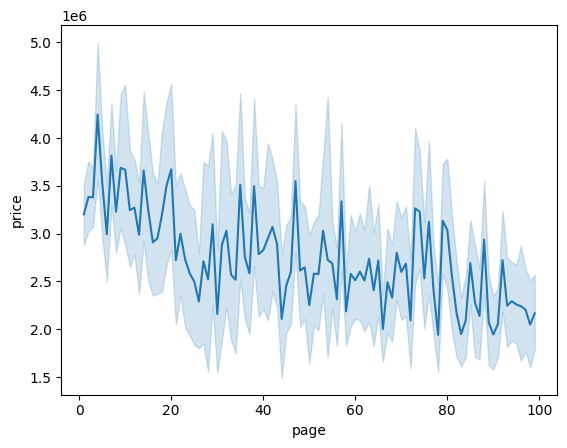

In [214]:
sns.lineplot(model_df, x="page", y="price")

Here still that dependancy - further page cheaper ads. But still high variation

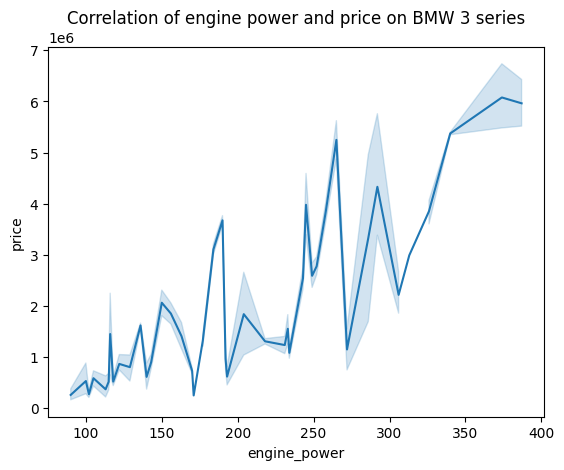

In [215]:
sns.lineplot(model_df, x="engine_power", y="price")
plt.title("Correlation of engine power and price on BMW 3 series")
plt.show()

With increasing engine power increases price, but not constantly

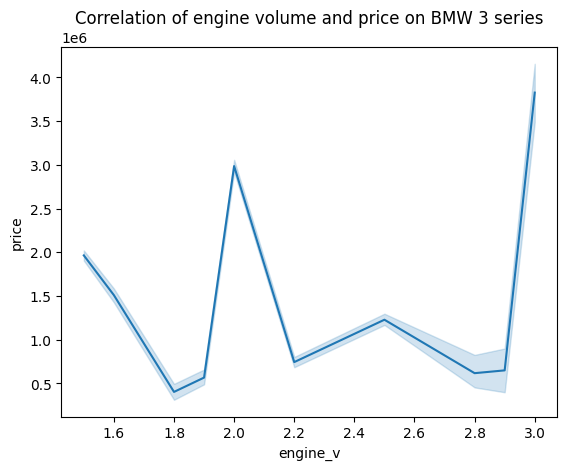

In [216]:
sns.lineplot(model_df, x="engine_v", y="price")
plt.title("Correlation of engine volume and price on BMW 3 series")
plt.show()

There are expansive cars with different engine volume and cheap ones with different engine volume. Nothing to note

In [217]:
model_df["fuel_type"].value_counts()

fuel_type
Бензин    1809
Дизель     723
Гибрид      11
Name: count, dtype: int64

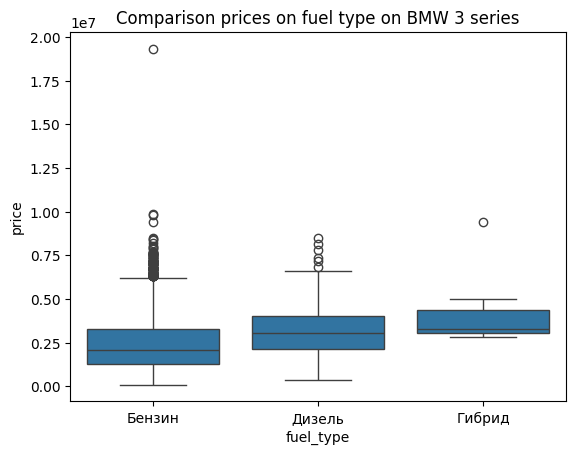

In [218]:
sns.boxplot(data=model_df, x="fuel_type", y="price")
plt.title("Comparison prices on fuel type on BMW 3 series")
plt.show()

Petrol is more popular has more outliers. Diesel and hybrid are more expansive with less objects

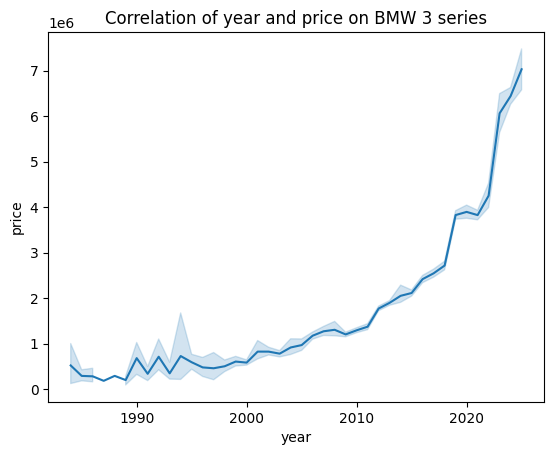

In [219]:
sns.lineplot(data=model_df, x="year", y="price")
plt.title("Correlation of year and price on BMW 3 series")
plt.show()

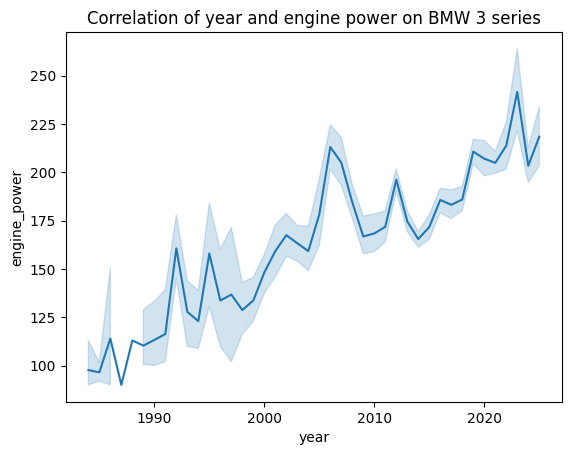

In [220]:
sns.lineplot(data=model_df, x="year", y="engine_power")
plt.title("Correlation of year and engine power on BMW 3 series")
plt.show()

Newest BMW are more expensive. But also over time increases engine power. Which feature affects more will be discovered later

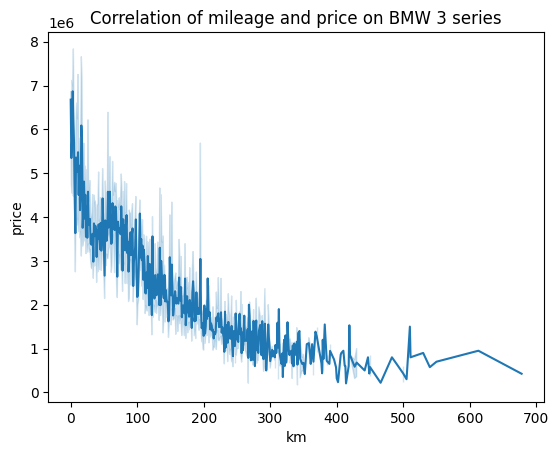

In [221]:
sns.lineplot(data=model_df, x=model_df["km"]//1000, y="price")
plt.title("Correlation of mileage and price on BMW 3 series")
plt.show()

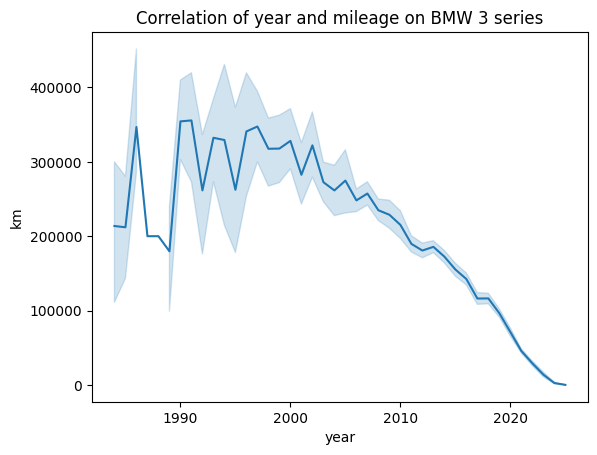

In [222]:
sns.lineplot(data=model_df, x="year", y="km")
plt.title("Correlation of year and mileage on BMW 3 series")
plt.show()

For cars produced before 2000 mean mileage is 3000000, over time mileage decreases.

With increasing mileage decreases price

In [223]:
model_df.groupby("transmission_type")["name"].count()

transmission_type
автомат     2382
механика     160
робот          1
Name: name, dtype: int64

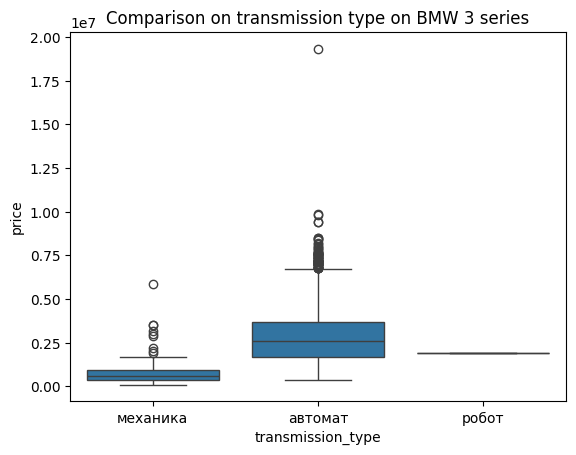

In [224]:
sns.boxplot(data=model_df, x="transmission_type", y="price")
plt.title("Comparison on transmission type on BMW 3 series")
plt.show()

Manual and robotic transmissions are rare. Despite this as in original dataset maual is cheaper

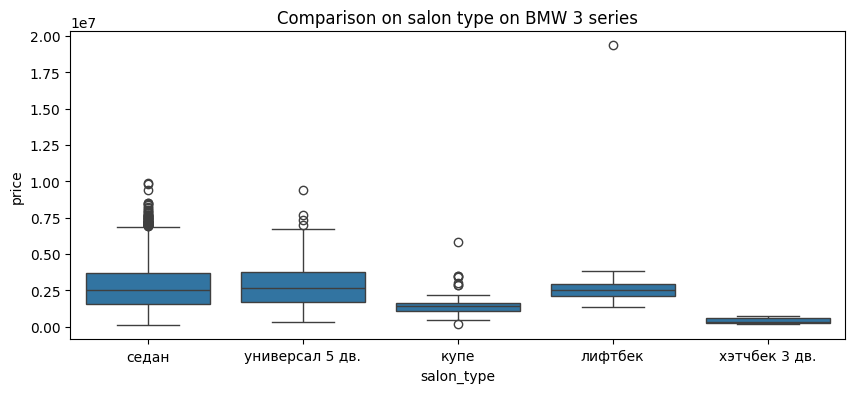

In [225]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=model_df, x="salon_type", y="price")
plt.title("Comparison on salon type on BMW 3 series")
plt.show()

In [226]:
model_df["town"].nunique()

246

In [227]:
model_df["town"].value_counts().head(10)

town
Москва             593
Владивосток        295
Санкт-Петербург    216
Краснодар          107
Минск               83
Сочи                55
Казань              53
Ростов-на-Дону      53
Екатеринбург        45
Красноярск          44
Name: count, dtype: int64

In [228]:
cities = model_df["town"].value_counts().head(10).index

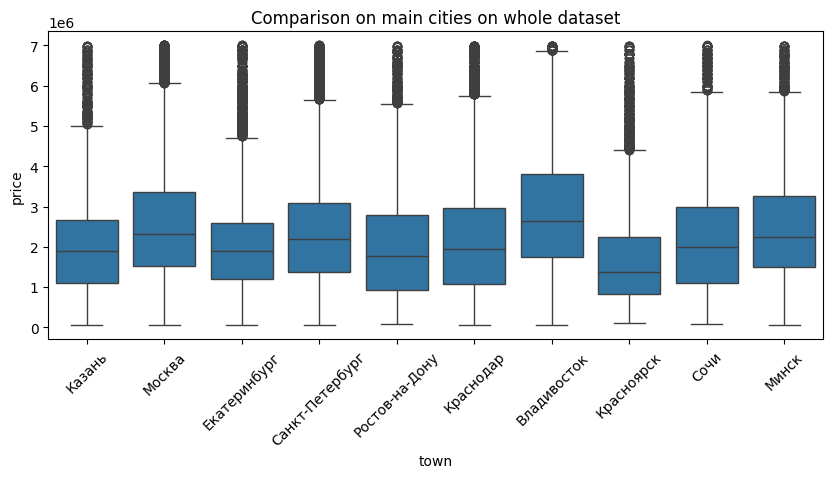

In [229]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=filtredprice_df[filtredprice_df["town"].isin(cities)], x="town", y="price")
plt.xticks(rotation=45)
plt.title("Comparison on main cities on whole dataset")
plt.show()

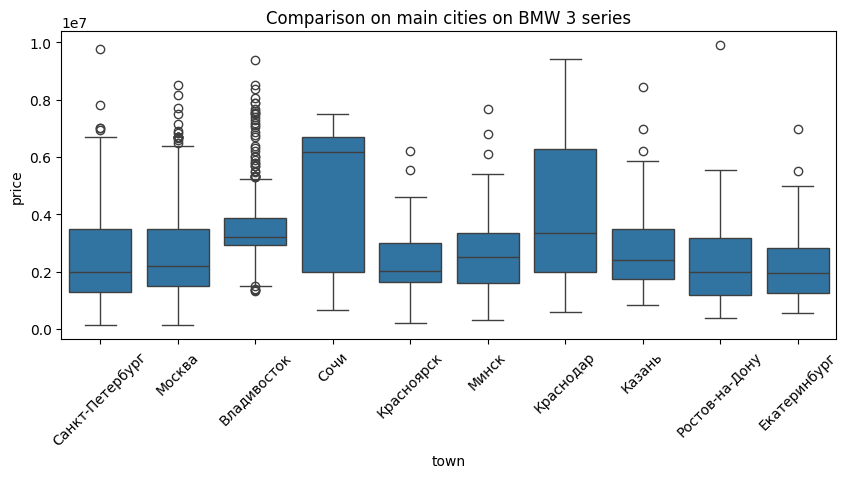

In [230]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=model_df[model_df["town"].isin(cities)], x="town", y="price")
plt.xticks(rotation=45)
plt.title("Comparison on main cities on BMW 3 series")
plt.show()

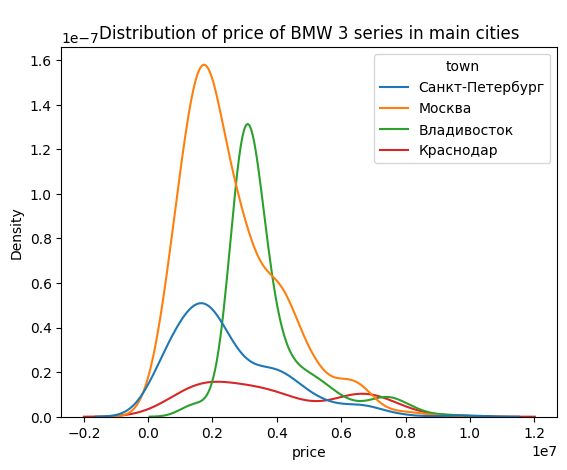

In [231]:
sns.kdeplot(data=model_df[model_df["town"].isin(["Москва", "Владивосток", "Санкт-Петербург", "Краснодар"])], x="price", hue="town")
plt.title("Distribution of price of BMW 3 series in main cities")
plt.show()

In Sochi, Krasnodar and Vladivostok cars are more expensive. In other cities mean and distribution is almost the same. Moscow and St.-Petersburg have outliers. For comparison there is boxplot on whole dataset and diffirencies in the cities are not the same.

Only Vladivostok is more expensive - it could be seen on histogram

In [232]:
model_df["region"].value_counts().head(10)

region
Москва                  595
Приморский край         318
Санкт-Петербург         220
Краснодарский край      200
Московская область      172
Минск                    83
Республика Татарстан     77
Ростовская область       75
Свердловская область     53
Красноярский край        49
Name: count, dtype: int64

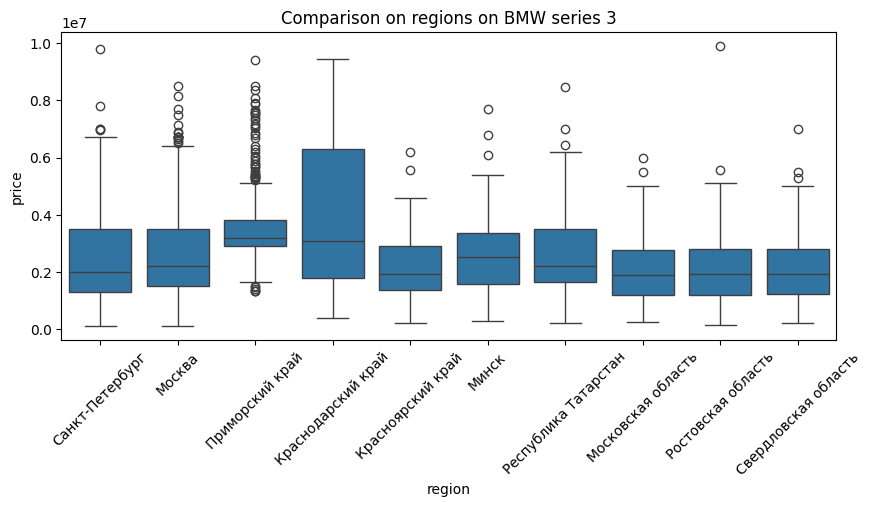

In [233]:
regions = model_df["region"].value_counts().head(10).index
plt.figure(figsize=(10, 4))
sns.boxplot(data=model_df[model_df["region"].isin(regions)], x="region", y="price")
plt.xticks(rotation=45)
plt.title("Comparison on regions on BMW series 3")
plt.show()

Primorsky kraj significally more expensive(here is Vladivostok)

In [234]:
features = ["salon", "on order", "verified dealler"]

In [235]:
model_df[features].mean()

salon               0.011011
on order            0.170271
verified dealler    0.044042
dtype: float64

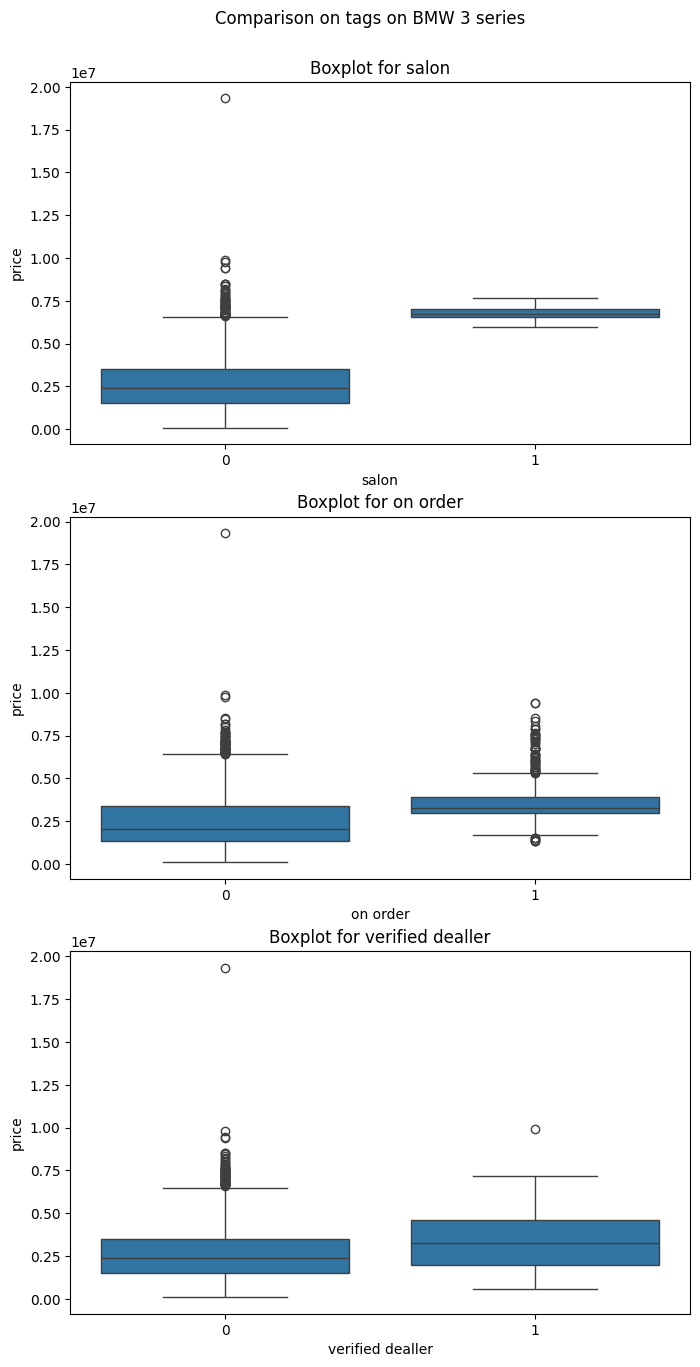

In [236]:
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 16))

for ax, feature in zip(axes, features):
    sns.boxplot(data=model_df, x=feature, y="price", ax=ax)
    ax.set_title(f"Boxplot for {feature}")

fig.suptitle("Comparison on tags on BMW 3 series", y=0.925)
plt.show()

All tags increases mean price. With verified dealler price increeses little bit, despite situation on whole dataset

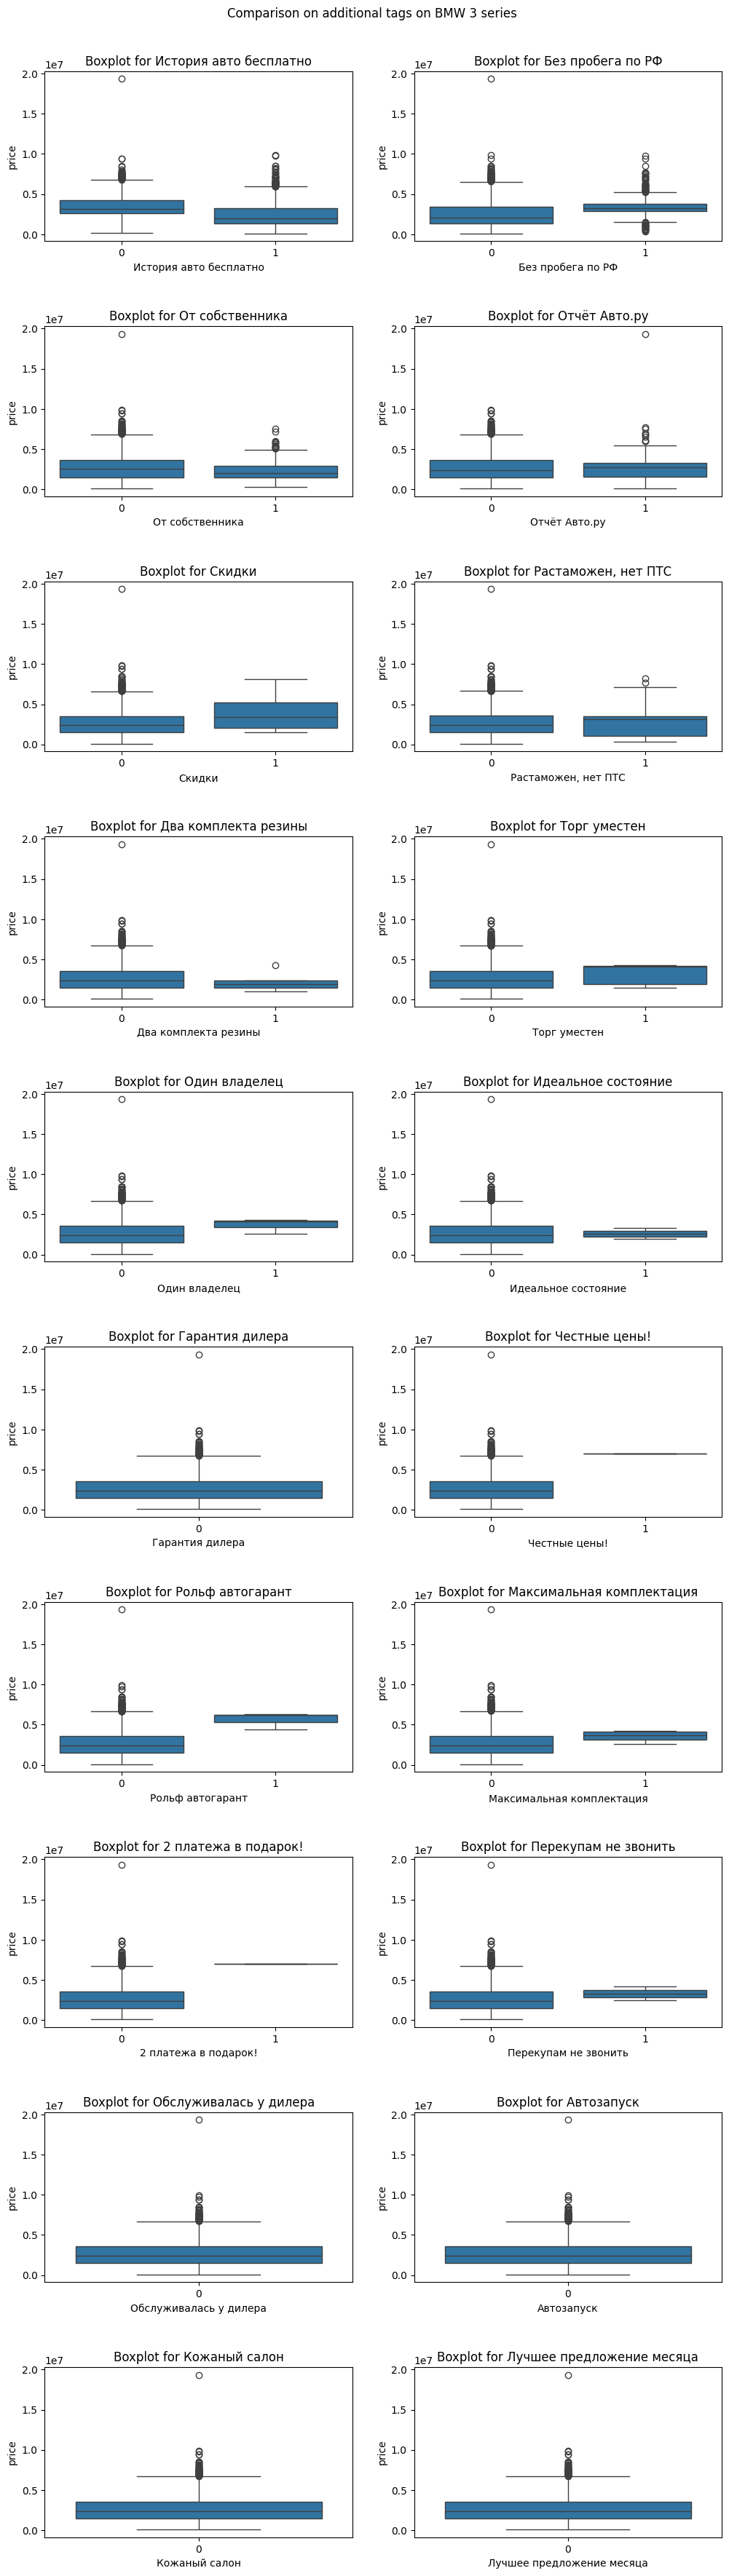

In [237]:
features = list(tags_to_save)

fig, axes = plt.subplots(nrows=len(features)//2, ncols=2, figsize=(12, 44))  # Увеличил ширину для двух колонок

# Распаковываем массив осей в одномерный список
axes = axes.flatten()

for ax, feature in zip(axes, features):
    sns.boxplot(data=model_df, x=feature, y="price", ax=ax)
    ax.set_title(f"Boxplot for {feature}")

plt.subplots_adjust(hspace=0.5)
fig.suptitle("Comparison on additional tags on BMW 3 series", y=0.9)
plt.show()

Due to small count of appearences of some additional tags. On most common tags ('История авто бесплатно', 'Без пробега по РФ', 'От собственника', 'Отчёт Авто.ру', 'Скидки', 'Растаможен, нет ПТС') situation on whole dataset is simular

# Feature importance and data preparation

## Correlation

In [238]:
df.columns

Index(['engine_v', 'engine_power', 'fuel_type', 'transmission_type',
       'salon_type', 'wheel_drive', 'color', 'km', 'url', 'price', 'year',
       'town', 'name', 'additional_tags', 'salon', 'on order',
       'verified dealler', 'model', 'brand', 'page', 'product_country',
       'region', 'population', 'История авто бесплатно', 'Без пробега по РФ',
       'От собственника', 'Отчёт Авто.ру', 'Скидки', 'Растаможен, нет ПТС',
       'Два комплекта резины', 'Торг уместен', 'Один владелец',
       'Идеальное состояние', 'Гарантия дилера', 'Честные цены!',
       'Рольф автогарант', 'Максимальная комплектация', '2 платежа в подарок!',
       'Перекупам не звонить', 'Обслуживалась у дилера', 'Автозапуск',
       'Кожаный салон', 'Лучшее предложение месяца', 'Срочно', 'num_tags',
       'max_page', 'rel_page', 'log_price'],
      dtype='object')

In [239]:
num_features = ['engine_v', 'engine_power',  'km',
        'rel_page', 'population', 'num_tags', 'year',  'price', 'log_price']

num_features1 = ['engine_v', 'engine_power',  'km',
        'rel_page', 'population', 'num_tags', 'year']

cat_features = ['fuel_type', 'transmission_type',
       'salon_type', 'wheel_drive', 'color', 'model', 'brand', 'product_country', 'region']

bincat_features = ['salon', 'on order',
       'verified dealler', 'История авто бесплатно', 'Без пробега по\xa0РФ',
       'От собственника', 'Отчёт Авто.ру', 'Скидки', 'Растаможен, нет ПТС',
       'Два комплекта резины', 'Один владелец', 'Торг уместен',
       'Гарантия дилера', 'Идеальное состояние', 'Честные цены!',
       'Рольф автогарант', 'Максимальная комплектация', '2 платежа в подарок!',
       'Перекупам не звонить', 'Обслуживалась у дилера', 'Автозапуск',
       'Кожаный салон', 'Срочно']

<Axes: >

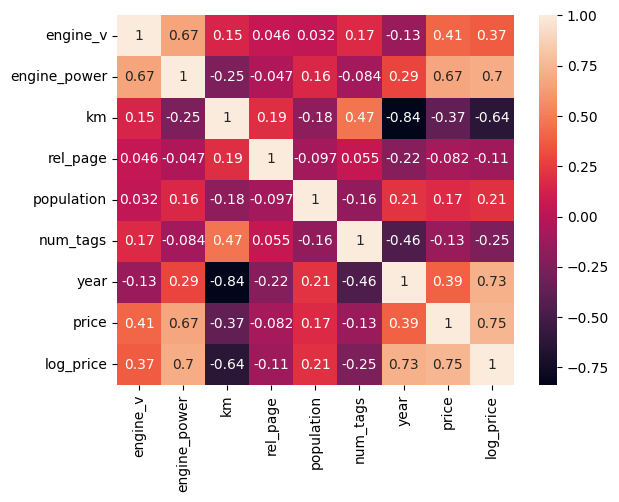

In [240]:
sns.heatmap(df[num_features].corr(), annot=True)

**Most correlated features to price and log_price are:**\
1. year
2. engine_power
3. km (mileage)

then:
4. engine_v (engine volume)
5. num_tags
6. population

and uncorrelated feature page


**Another high correlated features pairs are**\
km and year (-0.83)\
engine volume and engine power (0.69)

So far we'll save these features

## ANOVA test

In [241]:
pd.Series(f_classif(df[num_features1], df["price"])[0], index=num_features1).sort_values(ascending=False)

year            46.992730
engine_power    35.080466
km              26.975297
num_tags        15.599073
engine_v         9.029007
population       6.674411
rel_page         3.920751
dtype: float64

In [242]:
bmw_df = df[df["brand"]=="BMW"]

In [243]:
pd.Series(f_classif(bmw_df[num_features1], bmw_df["price"])[0], index=num_features1).sort_values(ascending=False)

year            17.730724
km               9.285958
engine_power     5.095672
engine_v         2.169264
num_tags         2.157123
rel_page         1.867518
population       1.240609
dtype: float64

Main features are year, engine_power and km in whole dataset and in BMW brand

## t-tests on categorical features

In [244]:
#Prepare data before
df = df.drop(columns=["url", "additional_tags", "town", "name", "max_page", "page"])

In [245]:
list_before_dummies = list(df.columns)

In [271]:
#Let's get dummies of categorical features
df_dum = pd.get_dummies(df, columns=cat_features, dtype=np.int64, prefix_sep=":")

In [247]:
df_dum.shape

(377849, 1488)

In [248]:
#Dropping numeric features from dataset to explore only categorical features
#df_dum = df_dum.drop(columns=num_features1)

In [272]:
df_dum.head()

engine_v  engine_power      km      price  year  salon  on order  \
0       3.0         340.0  230000  3390000.0  2014      0         0   
2       3.0         333.0  160500  3550000.0  2016      0         0   
4       1.7          80.0  170000   450000.0  2011      0         0   
5       1.5         147.0       0  1905330.0  2024      0         0   
6       4.8         367.0   78000  2299990.0  2008      0         0   

   verified dealler  population  История авто бесплатно  Без пробега по РФ  \
0                 0   1318604.0                       1                  0   
2                 0  13149803.0                       1                  0   
4                 0     68349.0                       1                  0   
5                 0  13149803.0                       0                  0   
6                 0   1177058.0                       0                  0   

   От собственника  Отчёт Авто.ру  Скидки  Растаможен, нет ПТС  \
0                0              0       0                    0   
2                0              0       0                    0   
4                0              0       0                    0   
5                0              0       0                    0   
6                0              1       0                    0   

   Два комплекта резины  Торг уместен  Один владелец  Идеальное состояние  \
0                     0             0              0                    0   
2                     0             0              0                    0   
4                     0             0              0                    0   
5                     0             0              0                    0   
6                     0             0              0                    0   

   Гарантия дилера  Честные цены!  Рольф автогарант  \
0                0              0                 0   
2                0              0                 0   
4                0              0                 0   
5                0              0                 0   
6                0              0                 0   

   Максимальная комплектация  2 платежа в подарок!  Перекупам не звонить  \
0                          0                     0                     0   
2                          0                     0                     0   
4                          0                     0                     0   
5                          0                     0                     0   
6                          0                     0                     0   

   Обслуживалась у дилера  Автозапуск  Кожаный салон  \
0                       0           0              0   
2                       0           0              0   
4                       0           0              0   
5                       0           0              0   
6                       0           0              0   

   Лучшее предложение месяца  Срочно  num_tags  rel_page  log_price  \
0                          0       0         1  0.271186  15.036341   
2                          0       0         1  0.869048  15.082458   
4                          0       0         1  0.265060  13.017005   
5                          0       0         0  0.141414  14.460166   
6                          0       0         1  0.714286  14.648416   

   fuel_type:Бензин  fuel_type:Газ  fuel_type:Гибрид  fuel_type:Дизель  \
0                 1              0                 0                 0   
2                 1              0                 0                 0   
4                 1              0                 0                 0   
5                 1              0                 0                 0   
6                 1              0                 0                 0   

   transmission_type:автомат  transmission_type:вариатор  \
0                          1                           0   
2                          0                           0   
4                          0                           0   
5         

In [250]:
f"Added {df_dum.shape[1]-len(num_features)-1}"

'Added 1471'

In [270]:
#Creating lists with features

stat_sign_ind_cols = []
not_stat_sign_ind_cols = []

for col in bincat_features:
    ttest = ttest_ind(df_dum[df_dum[col] == 0]["price"].dropna(),
                     df_dum[df_dum[col] == 1]["price"].dropna()).pvalue #Estimating pvalue on groups of car ads with this fature and without this feature
    if ttest <= 0.05: #If difference is significant, we'll save this feature
        stat_sign_ind_cols.append(col)
        #print("!!!!!!!!!!!!!!", col, ttest)
    else: #Otherways we'll save this feature to another lisr
        not_stat_sign_ind_cols.append(col)
         #print(col, ttest)

In [273]:
#Exploring features created by get_dummies

for col in tqdm(df_dum.columns): #Cycle feature names 
    if col.split(":")[0] in cat_features: #If ":" in name of column then it was created by get_dummies
        ttest = ttest_ind(df_dum[df_dum[col] == 0]["price"].dropna(),
                         df_dum[df_dum[col] == 1]["price"].dropna()).pvalue
        if ttest <= 0.05:
            stat_sign_ind_cols.append(col)
            #print("!!!!!!!!!!!!!!", col, ttest)
        else:
            not_stat_sign_ind_cols.append(col)
            #print(col, ttest)

C:\Users\danil\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████████████████████████████████████████████████████████████████████████| 1488/1488 [26:33<00:00,  1.07s/it]


## Saving features

In [276]:
# Saving
with open("stat_sign_ind_cols.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(stat_sign_ind_cols)

with open("not_stat_sign_ind_cols.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(not_stat_sign_ind_cols)

In [254]:
# Loading
with open("stat_sign_ind_cols.csv", "r") as f:
    stat_sign_ind_cols = next(csv.reader(f))

with open("not_stat_sign_ind_cols.csv", "r") as f:
    not_stat_sign_ind_cols = next(csv.reader(f))

In [274]:
len(not_stat_sign_ind_cols), len(stat_sign_ind_cols) 

(514, 964)

In [275]:
len(stat_sign_ind_cols), len(not_stat_sign_ind_cols)

(964, 514)

In [277]:
not_stat_sign_ind_cols[:20]

['Два комплекта резины',
 'Один владелец',
 'Гарантия дилера',
 '2 платежа в подарок!',
 'Кожаный салон',
 'Срочно',
 'wheel_drive:задний',
 'model:100 Series',
 'model:1007',
 'model:100NX',
 'model:11',
 'model:1200',
 'model:121',
 'model:140 Series',
 'model:180SX',
 'model:2 серии Gran Tourer',
 'model:200',
 'model:200SX',
 'model:207i (Iran Khodro)',
 'model:208 GTi']

In [278]:
not_stat_sign_ind_cols[-11:]

['model:ZX',
 'model:Zafira Life',
 'model:eK Custom',
 'model:eK Space',
 'model:i',
 'brand:GAC',
 'brand:Jetour',
 'brand:Mini',
 'region:Ингушетия',
 'region:Могилёв',
 'region:Чеченская Республика']

# Final dataset

In [279]:
df_main = df_dum.drop(columns=not_stat_sign_ind_cols)
df_main.head()

engine_v  engine_power      km      price  year  salon  on order  \
0       3.0         340.0  230000  3390000.0  2014      0         0   
2       3.0         333.0  160500  3550000.0  2016      0         0   
4       1.7          80.0  170000   450000.0  2011      0         0   
5       1.5         147.0       0  1905330.0  2024      0         0   
6       4.8         367.0   78000  2299990.0  2008      0         0   

   verified dealler  population  История авто бесплатно  Без пробега по РФ  \
0                 0   1318604.0                       1                  0   
2                 0  13149803.0                       1                  0   
4                 0     68349.0                       1                  0   
5                 0  13149803.0                       0                  0   
6                 0   1177058.0                       0                  0   

   От собственника  Отчёт Авто.ру  Скидки  Растаможен, нет ПТС  Торг уместен  \
0                0              0       0                    0             0   
2                0              0       0                    0             0   
4                0              0       0                    0             0   
5                0              0       0                    0             0   
6                0              1       0                    0             0   

   Идеальное состояние  Честные цены!  Рольф автогарант  \
0                    0              0                 0   
2                    0              0                 0   
4                    0              0                 0   
5                    0              0                 0   
6                    0              0                 0   

   Максимальная комплектация  Перекупам не звонить  Обслуживалась у дилера  \
0                          0                     0                       0   
2                          0                     0                       0   
4                          0                     0                       0   
5                          0                     0                       0   
6                          0                     0                       0   

   Автозапуск  Лучшее предложение месяца  num_tags  rel_page  log_price  \
0           0                          0         1  0.271186  15.036341   
2           0                          0         1  0.869048  15.082458   
4           0                          0         1  0.265060  13.017005   
5           0                          0         0  0.141414  14.460166   
6           0                          0         1  0.714286  14.648416   

   fuel_type:Бензин  fuel_type:Газ  fuel_type:Гибрид  fuel_type:Дизель  \
0                 1              0                 0                 0   
2                 1              0                 0                 0   
4                 1              0                 0                 0   
5                 1              0                 0                 0   
6                 1              0                 0                 0   

   transmission_type:автомат  transmission_type:вариатор  \
0                          1                           0   
2                          0                           0   
4                          0                           0   
5                          0                           1   
6                          1                           0   

   transmission_type:механика  transmission_type:робот  \
0                           0                        0   
2                           0                        1   
4                           1                        0   
5                           0                        0   
6                           0                        0   

   salon_type:внедорожник 3 дв.  salon_type:внедорожник 5 дв.  \
0                             0                             1   
2                             0                             0   
4

In [ ]:
df_main.to_csv('autos_df.csv', index=False)